# Loading UKHLS datasets (Profiling Variables and Attitudes to Environmental Policies)

## Import Libraries

In [1]:
# import library to load ".tab" files
import pandas as pd

# import library to visualise synthetic and UKHLS data
import matplotlib.pyplot as plt

# import OPENAI class to generate synthetic data
from openai import OpenAI

# import library to generate random numbers
import random

# import library to format synthetic data in JSON format. 
import json

# import OPENAI library to generate synthetic data
import openai

# import the library for Counter
from collections import Counter

# import backoff library to handle exponential exceptions
import backoff

# import the time library to measure the time taken to run the code
import time

# import wrap from textwrap
from textwrap import wrap

## Loading Data

In [2]:
def data_loading(filename, wave_of_study):
    """
    Description: This function loads the variables from a file from a specific wave of UKHLS study.
    Parameters:
    •	‘filename’ (string): the name of the file to be loaded. 
    •	‘wave_of_study’: determines which wave of UKHLS study to be loaded. 
    Returns:
    •	A list of relevant sample responses for comparing with the synthetic LLM values. 
    Raises:
    •	‘ValueError’ if wave of study or filename are not valid. 
    """
    if wave_of_study not in range(1, 14):
        raise ValueError("Invalid wave of study")

    if wave_of_study == 1:
        filename = 'a_' + filename
    elif wave_of_study == 2:
        filename = 'b_' + filename
    elif wave_of_study == 3:
        filename = 'c_' + filename
    elif wave_of_study == 4:
        filename = 'd_' + filename
    elif wave_of_study == 5:
        filename = 'e_' + filename
    elif wave_of_study == 6:
        filename = 'f_' + filename
    elif wave_of_study == 7:
        filename = 'g_' + filename
    elif wave_of_study == 8:
        filename = 'h_' + filename
    elif wave_of_study == 9:
        filename = 'i_' + filename
    elif wave_of_study == 10:
        filename = 'j_' + filename
    elif wave_of_study == 11:
        filename = 'k_' + filename
    elif wave_of_study == 12:
        filename = 'l_' + filename
    elif wave_of_study == 13:
        filename = 'm_' + filename

    return pd.read_csv('tab/ukhls/' + filename, sep='\t')


In [3]:
def screen_environmental_views(data, letter, variable_names=None):
    """
    Dynamically screens environmental views based on specified variable prefixes in a DataFrame.

    Parameters:
    • data (DataFrame): The DataFrame containing the UKHLS data.
    • letter (str): The prefix for the variable names, indicating the wave of the study.
    • variable_names (list of str, optional): List of base variable names to be screened. If None, uses a default list.

    Returns:
    • dict: A dictionary of the environmental views with variables as keys and their data as values.
    """
    if variable_names is None:
        variable_names = [
            "scenv_bcon", "scenv_brit", "scenv_ccls", "scenv_cfit", 
            "scenv_chwo", "scenv_crlf", "scenv_dstr", "scenv_exag", 
            "scenv_ftst", "scenv_futr", "scenv_grn", "scenv_pmre", "scopecl30"
        ]

    environmental_views = {}

    for base_var in variable_names: # iterate through the base variable names
        full_var = f"{letter}_{base_var}" # initialise the variable names based on the wave of the study
        if full_var in data.columns: # if the variable is conducted in the study
            environmental_views[base_var] = data[full_var] # store the data in the dictionary
        else: # if the variable is not conducted in the study
            environmental_views[base_var] = None # store None in the dictionary

    return environmental_views

In [4]:
# UKHLS profiling data loading examples
first_wave_ukhls_indresp = data_loading('indresp.tab', 1) # Load the first wave data
second_wave_ukhls_indresp = data_loading('indresp.tab', 2) # Load the second wave data
third_wave_ukhls_indresp = data_loading('indresp.tab', 3) # Load the third wave data
fourth_wave_ukhls_indresp = data_loading('indresp.tab', 4) # Load the fourth wave data
fifth_wave_ukhls_indresp = data_loading('indresp.tab', 5) # Load the fifth wave data
sixth_wave_ukhls_indresp = data_loading('indresp.tab', 6) # Load the sixth wave data
seventh_wave_ukhls_indresp = data_loading('indresp.tab', 7) # Load the seventh wave data
eighth_wave_ukhls_indresp = data_loading('indresp.tab', 8) # Load the eighth wave data
ninth_wave_ukhls_indresp = data_loading('indresp.tab', 9) # Load the ninth wave data
tenth_wave_ukhls_indresp = data_loading('indresp.tab', 10) # Load the tenth wave data
eleventh_wave_ukhls_indresp = data_loading('indresp.tab', 11) # Load the eleventh wave data
twelfth_wave_ukhls_indresp = data_loading('indresp.tab', 12) # Load the twelfth wave data
thirteenth_wave_ukhls_indresp = data_loading('indresp.tab', 13) # Load the thirteenth wave data

first_wave_ukhls_indall = data_loading('indall.tab', 1) # Load the first wave data
second_wave_ukhls_indall = data_loading('indall.tab', 2) # Load the second wave data
third_wave_ukhls_indall = data_loading('indall.tab', 3) # Load the third wave data
fourth_wave_ukhls_indall = data_loading('indall.tab', 4) # Load the fourth wave data
fifth_wave_ukhls_indall = data_loading('indall.tab', 5) # Load the fifth wave data
sixth_wave_ukhls_indall = data_loading('indall.tab', 6) # Load the sixth wave data
seventh_wave_ukhls_indall = data_loading('indall.tab', 7) # Load the seventh wave data
eighth_wave_ukhls_indall = data_loading('indall.tab', 8) # Load the eighth wave data
ninth_wave_ukhls_indall = data_loading('indall.tab', 9) # Load the ninth wave data
tenth_wave_ukhls_indall = data_loading('indall.tab', 10) # Load the tenth wave data
eleventh_wave_ukhls_indall = data_loading('indall.tab', 11) # Load the eleventh wave data
twelfth_wave_ukhls_indall = data_loading('indall.tab', 12) # Load the twelfth wave data

first_wave_ukhls_hhresp = data_loading('hhresp.tab', 1) # Load the first wave data
second_wave_ukhls_hhresp = data_loading('hhresp.tab', 2) # Load the second wave data
third_wave_ukhls_hhresp = data_loading('hhresp.tab', 3) # Load the third wave data
fourth_wave_ukhls_hhresp = data_loading('hhresp.tab', 4) # Load the fourth wave data
fifth_wave_ukhls_hhresp = data_loading('hhresp.tab', 5) # Load the fifth wave data
sixth_wave_ukhls_hhresp = data_loading('hhresp.tab', 6) # Load the sixth wave data
seventh_wave_ukhls_hhresp = data_loading('hhresp.tab', 7) # Load the seventh wave data
eighth_wave_ukhls_hhresp = data_loading('hhresp.tab', 8) # Load the eighth wave data
ninth_wave_ukhls_hhresp = data_loading('hhresp.tab', 9) # Load the ninth wave data
tenth_wave_ukhls_hhresp = data_loading('hhresp.tab', 10) # Load the tenth wave data
eleventh_wave_ukhls_hhresp = data_loading('hhresp.tab', 11) # Load the eleventh wave data
twelfth_wave_ukhls_hhresp = data_loading('hhresp.tab', 12) # Load the twelfth wave data
thirteenth_wave_ukhls_hhresp = data_loading('hhresp.tab', 13) # Load the thirteenth wave data

# UKHLS environmental views screening examples
# Screen the environmental views of the individuals in the first wave data
first_wave_ukhls_environmental_views = screen_environmental_views(first_wave_ukhls_indresp, 'a') 
# Screen the environmental views of the individuals in the fourth wave data
fourth_wave_ukhls_environmental_views = screen_environmental_views(fourth_wave_ukhls_indresp, 'd')
# Screen the environmental views of the individuals in the tenth wave data
tenth_wave_ukhls_environmental_views = screen_environmental_views(tenth_wave_ukhls_indresp, 'j') 

C:\Users\haoch\AppData\Local\Temp\ipykernel_16300\2654240476.py:42: DtypeWarning: Columns (1953,1954) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('tab/ukhls/' + filename, sep='\t')
C:\Users\haoch\AppData\Local\Temp\ipykernel_16300\2654240476.py:42: DtypeWarning: Columns (194,195) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('tab/ukhls/' + filename, sep='\t')
C:\Users\haoch\AppData\Local\Temp\ipykernel_16300\2654240476.py:42: DtypeWarning: Columns (427,428) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('tab/ukhls/' + filename, sep='\t')


# OpenAI Synthetic Responses

## Import OpenAI Libraries

In [5]:
client = OpenAI(api_key="sk-proj-9340iNqXxcjhjCsx7bGdT3BlbkFJX70mfLvdVdKmwpXSiOMH")

# how to check which API key is being used
print(client.api_key)

# sk-proj-9340iNqXxcjhjCsx7bGdT3BlbkFJX70mfLvdVdKmwpXSiOMH

sk-proj-9340iNqXxcjhjCsx7bGdT3BlbkFJX70mfLvdVdKmwpXSiOMH


## UKHLS Data Visualisation

### Profile Conditioning Variables

#### Income / Wages

##### Loading Income Variables

In [6]:
# initialise variables to track monthly income over all waves of UKHLS studies
first_wave_monthly_income_variable = "a_fihhmnlabgrs_dv"
second_wave_monthly_income_variable = "b_fihhmnlabgrs_dv"
third_wave_monthly_income_variable = "c_fihhmnlabgrs_dv"
fourth_wave_monthly_income_variable = "d_fihhmnlabgrs_dv"
fifth_wave_monthly_income_variable = "e_fihhmnlabgrs_dv"
sixth_wave_monthly_income_variable = "f_fihhmnlabgrs_dv"
seventh_wave_monthly_income_variable = "g_fihhmnlabgrs_dv"
eighth_wave_monthly_income_variable = "h_fihhmnlabgrs_dv"
ninth_wave_monthly_income_variable = "i_fihhmnlabgrs_dv"
tenth_wave_monthly_income_variable = "j_fihhmnlabgrs_dv"
eleventh_wave_monthly_income_variable = "k_fihhmnlabgrs_dv"
twelfth_wave_monthly_income_variable = "l_fihhmnlabgrs_dv"
thirteenth_wave_monthly_income_variable = "m_fihhmnlabgrs_dv"

##### Load Income Distributions

In [7]:
def load_income_distribution(data, variable_name):

    """
    Description: This function loads the monthly income distribution of the UKHLS data.
    Parameters:
    •	‘data’ (DataFrame): the UKHLS data.
    •	‘variable_name’ (string): the name of the variable to be loaded. 
    Returns:
    •	A list of monthly income values. 
    Raises:
    •	‘ValueError’ if the variable name is not valid. 
    """
    if variable_name not in data.columns:
        raise ValueError("Invalid variable name")
    
    income_data = data[variable_name]

    return income_data 

In [8]:
first_wave_monthly_income = load_income_distribution(first_wave_ukhls_hhresp, first_wave_monthly_income_variable)
second_wave_monthly_income = load_income_distribution(second_wave_ukhls_hhresp, second_wave_monthly_income_variable)
third_wave_monthly_income = load_income_distribution(third_wave_ukhls_hhresp, third_wave_monthly_income_variable)
fourth_wave_monthly_income = load_income_distribution(fourth_wave_ukhls_hhresp, fourth_wave_monthly_income_variable)
fifth_wave_monthly_income = load_income_distribution(fifth_wave_ukhls_hhresp, fifth_wave_monthly_income_variable)
sixth_wave_monthly_income = load_income_distribution(sixth_wave_ukhls_hhresp, sixth_wave_monthly_income_variable)
seventh_wave_monthly_income = load_income_distribution(seventh_wave_ukhls_hhresp, seventh_wave_monthly_income_variable)
eighth_wave_monthly_income = load_income_distribution(eighth_wave_ukhls_hhresp, eighth_wave_monthly_income_variable)
ninth_wave_monthly_income = load_income_distribution(ninth_wave_ukhls_hhresp, ninth_wave_monthly_income_variable)
tenth_wave_monthly_income = load_income_distribution(tenth_wave_ukhls_hhresp, tenth_wave_monthly_income_variable)
eleventh_wave_monthly_income = load_income_distribution(eleventh_wave_ukhls_hhresp, eleventh_wave_monthly_income_variable)
twelfth_wave_monthly_income = load_income_distribution(twelfth_wave_ukhls_hhresp, twelfth_wave_monthly_income_variable)
thirteenth_wave_monthly_income = load_income_distribution(thirteenth_wave_ukhls_hhresp, thirteenth_wave_monthly_income_variable)   

In [9]:
ukhls_income_data = [first_wave_monthly_income, second_wave_monthly_income, third_wave_monthly_income, fourth_wave_monthly_income, fifth_wave_monthly_income, sixth_wave_monthly_income, seventh_wave_monthly_income, eighth_wave_monthly_income, ninth_wave_monthly_income, tenth_wave_monthly_income, eleventh_wave_monthly_income, twelfth_wave_monthly_income, thirteenth_wave_monthly_income]

##### Plotting Income Distributions

In [10]:
def plot_monthly_income_variable(data, wave_of_study, monthly_income_variable):
    """
    Description: This function plots the monthly income variable for a specific wave of UKHLS study. 
    Parameters:
    •	‘data’ (DataFrame): the UKHLS data to be plotted. 
    •	‘wave_of_study’ (int): the wave of UKHLS study to be plotted. 
    •	‘monthly_income_variable’ (string): the variable name for the monthly income. 
    Returns:
    •	A plot of the monthly income variable for a specific wave of UKHLS study. 
    Raises:
    •	‘ValueError’ if wave of study is not valid. 
    """
    if wave_of_study not in range(1, 14):
        raise ValueError("Invalid wave of study")

    if wave_of_study == 1:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the First Wave of UKHLS Study")
    elif wave_of_study == 2:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Second Wave of UKHLS Study")
    elif wave_of_study == 3:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Third Wave of UKHLS Study")
    elif wave_of_study == 4:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Fourth Wave of UKHLS Study")
    elif wave_of_study == 5:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Fifth Wave of UKHLS Study")
    elif wave_of_study == 6:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Sixth Wave of UKHLS Study")
    elif wave_of_study == 7:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Seventh Wave of UKHLS Study")
    elif wave_of_study == 8:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Eighth Wave of UKHLS Study")
    elif wave_of_study == 9:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Ninth Wave of UKHLS Study")
    elif wave_of_study == 10:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Tenth Wave of UKHLS Study")
    elif wave_of_study == 11:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Eleventh Wave of UKHLS Study")
    elif wave_of_study == 12:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Twelfth Wave of UKHLS Study")
    elif wave_of_study == 13:
        data[monthly_income_variable].plot.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
        plt.xlabel("Monthly Income")
        plt.ylabel("Frequency")
        plt.title("Monthly Income Distribution in the Thirteenth Wave of UKHLS Study")

    plt.savefig(f"Figures/Profiling-Variables/Income/monthly_income_distribution_wave_{wave_of_study}.png")
    plt.show() 

##### Income Visualisations

In [11]:
def visualise_variables(data, variable_names):
    """
    Description: This function visualises the distribution of variables in a DataFrame. 
    Parameters:
    •	‘data’ (DataFrame): the UKHLS data to be visualised. 
    •	‘variable_names’ (list of strings): the names of the variables to be visualised.
    •	‘variable_type’ (string): the type of the variable to be visualised. 
    Returns:
    •	None
    """

    for i in range(len(variable_names)):
        plot_monthly_income_variable(data[i], i + 1, variable_names[i])

###### Visualisation across 13 Waves

In [12]:
# initialise a list to track the dataset
ukhls_hhresp_data = [first_wave_ukhls_hhresp, second_wave_ukhls_hhresp, third_wave_ukhls_hhresp, fourth_wave_ukhls_hhresp, fifth_wave_ukhls_hhresp, sixth_wave_ukhls_hhresp, seventh_wave_ukhls_hhresp, eighth_wave_ukhls_hhresp, ninth_wave_ukhls_hhresp, tenth_wave_ukhls_hhresp, eleventh_wave_ukhls_hhresp, twelfth_wave_ukhls_hhresp, thirteenth_wave_ukhls_hhresp]

# initialise a list to track the variable names of each dataset values
ukhls_hhresp_variable_names = [first_wave_monthly_income_variable, second_wave_monthly_income_variable, third_wave_monthly_income_variable, fourth_wave_monthly_income_variable, fifth_wave_monthly_income_variable, sixth_wave_monthly_income_variable, seventh_wave_monthly_income_variable, eighth_wave_monthly_income_variable, ninth_wave_monthly_income_variable, tenth_wave_monthly_income_variable, eleventh_wave_monthly_income_variable, twelfth_wave_monthly_income_variable, thirteenth_wave_monthly_income_variable]

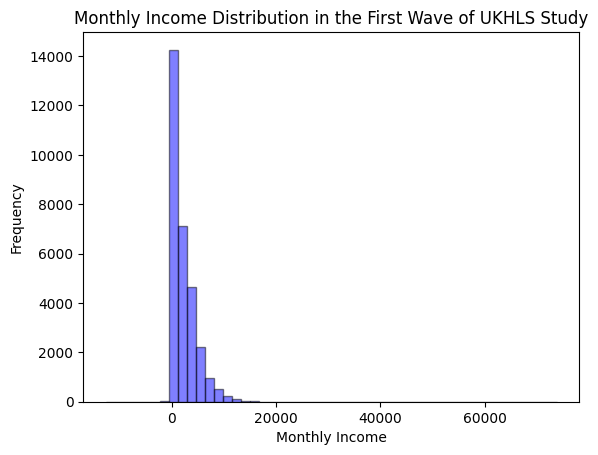

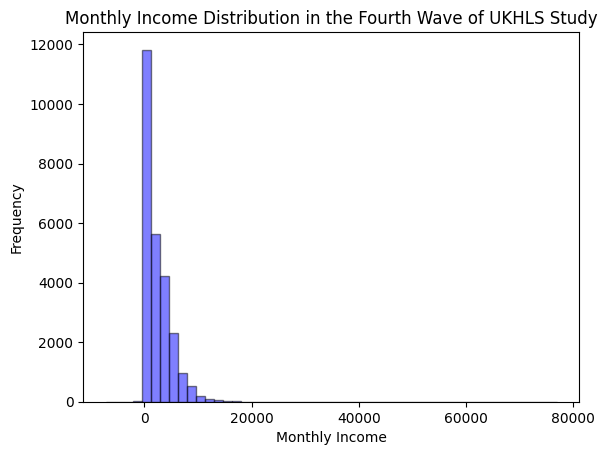

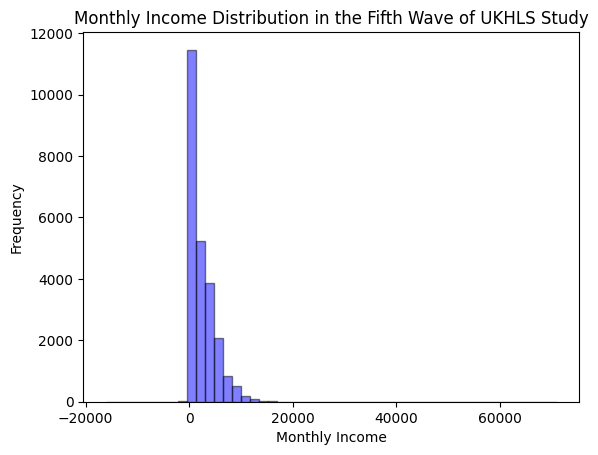

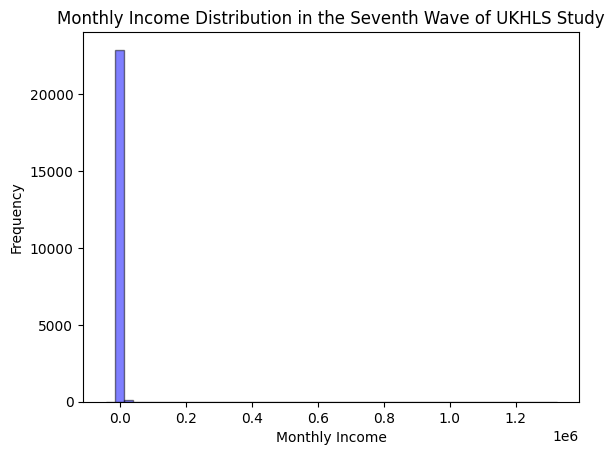

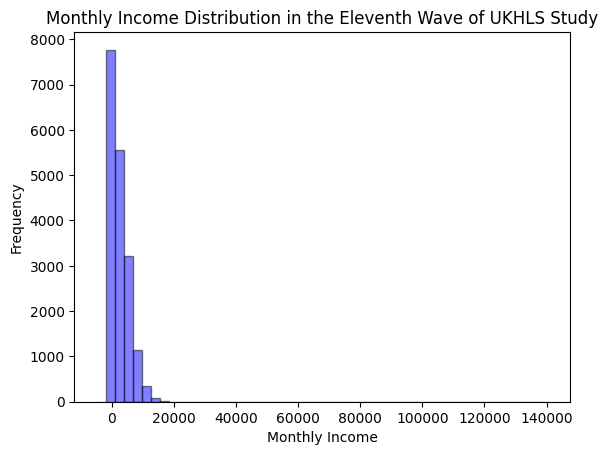

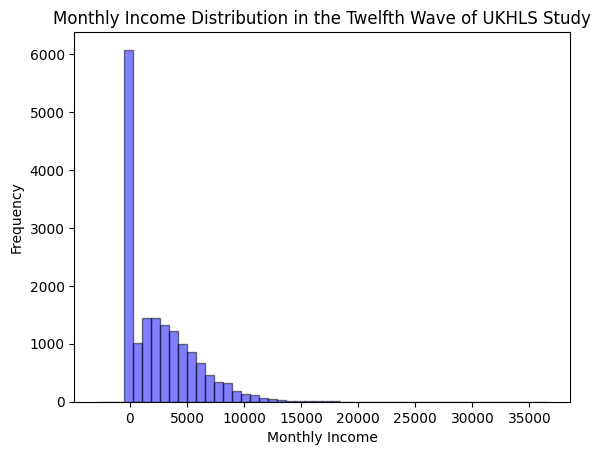

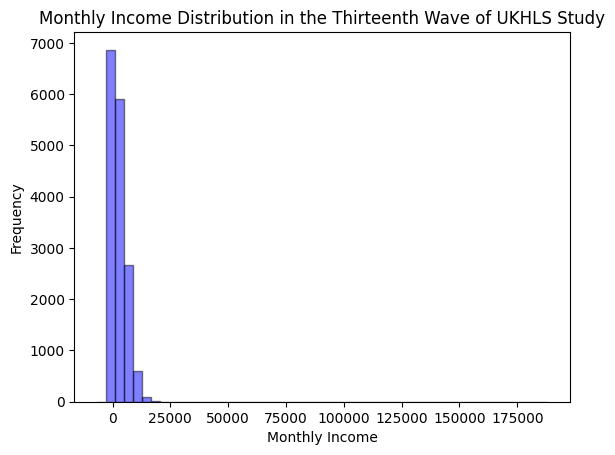

In [13]:
visualise_variables(ukhls_hhresp_data, ukhls_hhresp_variable_names)

###### Average Wave Visualisation

In [14]:
# plot the average value of the plots except for the sixth and seventh wave
average_monthly_income = (first_wave_monthly_income + second_wave_monthly_income + third_wave_monthly_income + fourth_wave_monthly_income + fifth_wave_monthly_income + eighth_wave_monthly_income + ninth_wave_monthly_income + tenth_wave_monthly_income + eleventh_wave_monthly_income + twelfth_wave_monthly_income + thirteenth_wave_monthly_income) / 11

plt.hist(average_monthly_income, bins=50, alpha=0.5, color='blue', edgecolor='black')

plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Average Monthly Income Distribution across 13 Waves of UKHLS Study", fontsize=10)
plt.savefig("Figures/Profiling-Variables/Income/average_monthly_income_distribution.png")
plt.show()

#### Age Groups

##### Generate Age Distribution Function

In [15]:
def generate_age_group_distribution(dataframe, column_name):
    """
    Description: A function to generate the distribution of the age group in the UKHLS data.
    Parameters:
    •	‘dataframe’ (dataframe): the dataframe containing the UKHLS data.
    •	‘column_name’ (string): the name of the column containing the age group information.
    Returns:
    •	A probability distribution of the age group in the UKHLS data.
    """
    age_group_dict = {
        2: "10 - 19",
        3: "20 - 29",
        4: "30 - 39",
        5: "40 - 49",
        6: "50 - 59",
        7: "60 - 69",
        8: "70 years or older",
    }

    # use the mapping dictionary to convert the numeric codes to descriptive labels
    age_group_labels = dataframe[column_name].map(age_group_dict)

    age_group_probability_distribution = age_group_labels.value_counts(normalize=True)

    age_group_probability_dict = age_group_probability_distribution.to_dict()

    # ensure that all groups are included in the dictionary
    for key in age_group_dict.values():
        if key not in age_group_probability_dict:
            age_group_probability_dict[key] = 0

    return age_group_probability_dict

##### Distribution Generations

###### First Wave

In [16]:
first_wave_age_group_probability_dict = generate_age_group_distribution(first_wave_ukhls_indresp, 'a_agegr10_dv')

print(first_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.1902968976742362, '30 - 39': 0.18268815939130092, '20 - 29': 0.1599011648429227, '50 - 59': 0.15070400439267365, '60 - 69': 0.13123112523041927, '70 years or older': 0.1187002392438326, '10 - 19': 0.06647840922461466}


###### Second Wave

In [17]:
second_wave_age_group_probability_dict = generate_age_group_distribution(second_wave_ukhls_indresp, 'b_agegr10_dv')

print(second_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.19018820899078198, '30 - 39': 0.17034104861912877, '50 - 59': 0.15725621712756793, '20 - 29': 0.14237542837245953, '60 - 69': 0.14023127531291807, '70 years or older': 0.1296937709604706, '10 - 19': 0.06991405061667308}


###### Third Wave

In [18]:
third_wave_age_group_probability_dict = generate_age_group_distribution(third_wave_ukhls_indresp, 'c_agegr10_dv')

print(third_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.19051739751665292, '30 - 39': 0.16336962427803828, '50 - 59': 0.16097482441488398, '60 - 69': 0.14479483206214405, '20 - 29': 0.13779155179006258, '70 years or older': 0.1345917771829909, '10 - 19': 0.06795999275522731}


###### Fourth Wave

In [19]:
fourth_wave_age_group_probability_dict = generate_age_group_distribution(fourth_wave_ukhls_indresp, 'd_agegr10_dv')

print(fourth_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.18940391723669117, '50 - 59': 0.16518672728045206, '30 - 39': 0.1574754641628075, '60 - 69': 0.14545184178102563, '20 - 29': 0.13737944512894593, '70 years or older': 0.1369333389981731, '10 - 19': 0.06816926541190466}


###### Fifth Wave

In [20]:
fifth_wave_age_group_probability_dict = generate_age_group_distribution(fifth_wave_ukhls_indresp, 'e_agegr10_dv')

print(fifth_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.1860293953654348, '50 - 59': 0.16760711019916585, '30 - 39': 0.15103597475299418, '60 - 69': 0.14806967459910342, '70 years or older': 0.1428953765863015, '20 - 29': 0.1367174431830854, '10 - 19': 0.06764502531391485}


###### Sixth Wave

In [21]:
sixth_wave_age_group_probability_dict = generate_age_group_distribution(sixth_wave_ukhls_indresp, 'f_agegr10_dv')

print(sixth_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.18596258164507914, '50 - 59': 0.16678844237794752, '30 - 39': 0.1572013727443817, '60 - 69': 0.14311967231263145, '20 - 29': 0.14183549208457877, '70 years or older': 0.1409941326248201, '10 - 19': 0.06409830621056127}


###### Seventh Wave

In [22]:
seventh_wave_age_group_probability_dict = generate_age_group_distribution(seventh_wave_ukhls_indresp, 'g_agegr10_dv')

print(seventh_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.18168235824222734, '50 - 59': 0.1716033865344938, '30 - 39': 0.1542438399696445, '60 - 69': 0.14748500011857613, '70 years or older': 0.1470581260227192, '20 - 29': 0.13520051224891502, '10 - 19': 0.06272677686342401}


###### Eighth Wave

In [23]:
eighth_wave_age_group_probability_dict = generate_age_group_distribution(eighth_wave_ukhls_indresp, 'h_agegr10_dv')

print(eighth_wave_age_group_probability_dict) # print the age group probability distribution

{'40 - 49': 0.17776250827098286, '50 - 59': 0.17641370183743066, '70 years or older': 0.1576831068356492, '60 - 69': 0.14979386165826844, '30 - 39': 0.14880134371659795, '20 - 29': 0.13027434213874892, '10 - 19': 0.05927113554232198}


###### Ninth Wave

In [24]:
ninth_wave_age_group_probability_dict = generate_age_group_distribution(ninth_wave_ukhls_indresp, 'i_agegr10_dv')

print(ninth_wave_age_group_probability_dict) # print the age group probability distribution

{'50 - 59': 0.18135174862024017, '40 - 49': 0.17114568599717114, '70 years or older': 0.16759575117175582, '60 - 69': 0.15298000388274122, '30 - 39': 0.14086030451784673, '20 - 29': 0.12796405690989268, '10 - 19': 0.05810244890035222}


###### Tenth Wave

In [25]:
tenth_wave_age_group_probability_dict = generate_age_group_distribution(tenth_wave_ukhls_indresp, 'j_agegr10_dv')

print(tenth_wave_age_group_probability_dict) # print the age group probability distribution

{'50 - 59': 0.1842527027420812, '70 years or older': 0.1776670454876592, '40 - 49': 0.16723489815543316, '60 - 69': 0.15383046303581316, '30 - 39': 0.13529737447912113, '20 - 29': 0.12515662791036514, '10 - 19': 0.05656088818952706}


###### Eleventh Wave

In [26]:
eleventh_wave_age_group_probability_dict = generate_age_group_distribution(eleventh_wave_ukhls_indresp, 'k_agegr10_dv')

print(eleventh_wave_age_group_probability_dict) # print the age group probability distribution

{'50 - 59': 0.18657042869641294, '70 years or older': 0.18272715910511186, '40 - 49': 0.16404199475065617, '60 - 69': 0.15832395950506187, '30 - 39': 0.12851518560179978, '20 - 29': 0.12723409573803274, '10 - 19': 0.05258717660292463}


###### Twelfth Wave

In [27]:
twelfth_wave_age_group_probability_dict = generate_age_group_distribution(twelfth_wave_ukhls_indresp, 'l_agegr10_dv')

print(twelfth_wave_age_group_probability_dict) # print the age group probability distribution

{'50 - 59': 0.18918272516058493, '70 years or older': 0.18463851305179718, '60 - 69': 0.16748667486674867, '40 - 49': 0.15983326499931666, '20 - 29': 0.12583709170425036, '30 - 39': 0.12481208145414788, '10 - 19': 0.0482096487631543}


###### Thirteenth Wave

In [28]:
thirteenth_wave_age_group_probability_dict = generate_age_group_distribution(thirteenth_wave_ukhls_indresp, 'm_agegr10_dv')

print(thirteenth_wave_age_group_probability_dict) # print the age group probability distribution

{'50 - 59': 0.19037754045076258, '70 years or older': 0.1876629638889881, '60 - 69': 0.17058970603993284, '40 - 49': 0.15819552094867306, '20 - 29': 0.12569203843268922, '30 - 39': 0.12237025395578098, '10 - 19': 0.0451119762831732}


##### Plotting Age Group Distributions

In [29]:
# implement a function to visualise the probability distribution of the age group in the UKHLS data
def visualise_age_group_distribution(age_group_probability_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the age group in the UKHLS data.
    Parameters:
    •	‘age_group_distribution’ (dict): the probability distribution of the age group in the UKHLS data.
    •	‘wave_number’ (int): the wave number of the UKHLS data.
    """
    # display the probability distribution of the age group in the UKHLS data
    print(age_group_probability_dict)

    # sort the dictionary by the keys in order "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69", "70 years or older"
    age_group_probability_dict = dict(sorted(age_group_probability_dict.items()))

    # initialise the figure title for the plot based on the wave number
    if wave_number == 1:
        fig_title = "First Wave Age Group Probability Distribution"
    elif wave_number == 2:
        fig_title = "Second Wave Age Group Probability Distribution"
    elif wave_number == 3:
        fig_title = "Third Wave Age Group Probability Distribution"
    elif wave_number == 4:
        fig_title = "Fourth Wave Age Group Probability Distribution"
    elif wave_number == 5:
        fig_title = "Fifth Wave Age Group Probability Distribution"
    elif wave_number == 6:
        fig_title = "Sixth Wave Age Group Probability Distribution"
    elif wave_number == 7:
        fig_title = "Seventh Wave Age Group Probability Distribution"
    elif wave_number == 8:
        fig_title = "Eighth Wave Age Group Probability Distribution"
    elif wave_number == 9:
        fig_title = "Ninth Wave Age Group Probability Distribution"
    elif wave_number == 10:
        fig_title = "Tenth Wave Age Group Probability Distribution"
    elif wave_number == 11:
        fig_title = "Eleventh Wave Age Group Probability Distribution"
    elif wave_number == 12:
        fig_title = "Twelfth Wave Age Group Probability Distribution"
    elif wave_number == 13:
        fig_title = "Thirteenth Wave Age Group Probability Distribution"
    elif wave_number == 14:
        fig_title = "Average Age Group Probability Distribution across 13 Waves of UKHLS Study"

    # plot the age_group_probability_dict
    plt.bar(age_group_probability_dict.keys(), age_group_probability_dict.values())
    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)
    plt.xlabel('Age Group')
    plt.ylabel('Probability')
    plt.title(fig_title, fontsize=10)
    plt.tight_layout() # adjust the plot to fit the labels

    if wave_number == 1: 
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - First Wave.png")
    elif wave_number == 2:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Second Wave.png")
    elif wave_number == 3:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Third Wave.png")
    elif wave_number == 4:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Fourth Wave.png")
    elif wave_number == 5:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Fifth Wave.png")
    elif wave_number == 6:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Sixth Wave.png")
    elif wave_number == 7:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Seventh Wave.png")
    elif wave_number == 8:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Eighth Wave.png")
    elif wave_number == 9:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Ninth Wave.png")
    elif wave_number == 10:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Tenth Wave.png")
    elif wave_number == 11:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Eleventh Wave.png")
    elif wave_number == 12:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Twelfth Wave.png")
    elif wave_number == 13:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Thirteenth Wave.png")
    elif wave_number == 14:
        plt.savefig("Figures/Profiling-Variables/Age Groups/Age Group Probability Distribution - Average.png")
    
    plt.show()

##### Age Group Distribution Visualisation

###### First 13 Waves Visualisation

{'40 - 49': 0.1902968976742362, '30 - 39': 0.18268815939130092, '20 - 29': 0.1599011648429227, '50 - 59': 0.15070400439267365, '60 - 69': 0.13123112523041927, '70 years or older': 0.1187002392438326, '10 - 19': 0.06647840922461466}


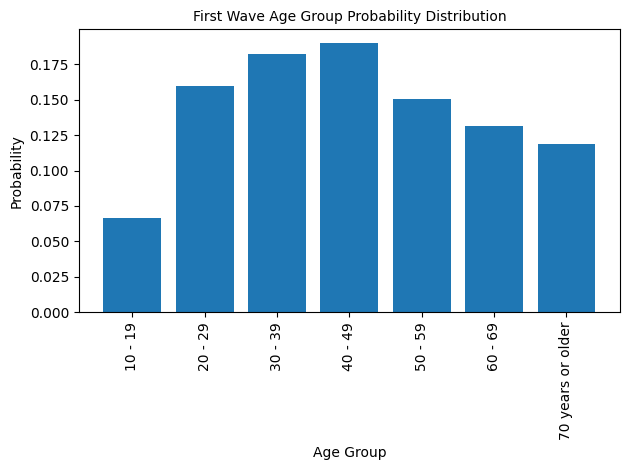

{'40 - 49': 0.19018820899078198, '30 - 39': 0.17034104861912877, '50 - 59': 0.15725621712756793, '20 - 29': 0.14237542837245953, '60 - 69': 0.14023127531291807, '70 years or older': 0.1296937709604706, '10 - 19': 0.06991405061667308}


{'40 - 49': 0.19051739751665292, '30 - 39': 0.16336962427803828, '50 - 59': 0.16097482441488398, '60 - 69': 0.14479483206214405, '20 - 29': 0.13779155179006258, '70 years or older': 0.1345917771829909, '10 - 19': 0.06795999275522731}


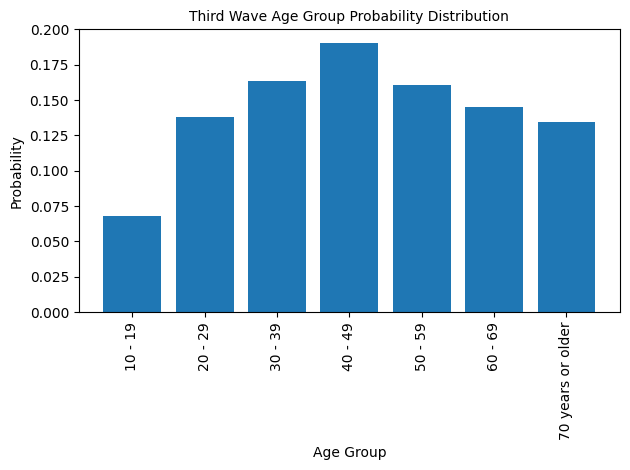

{'40 - 49': 0.18940391723669117, '50 - 59': 0.16518672728045206, '30 - 39': 0.1574754641628075, '60 - 69': 0.14545184178102563, '20 - 29': 0.13737944512894593, '70 years or older': 0.1369333389981731, '10 - 19': 0.06816926541190466}


{'40 - 49': 0.1860293953654348, '50 - 59': 0.16760711019916585, '30 - 39': 0.15103597475299418, '60 - 69': 0.14806967459910342, '70 years or older': 0.1428953765863015, '20 - 29': 0.1367174431830854, '10 - 19': 0.06764502531391485}


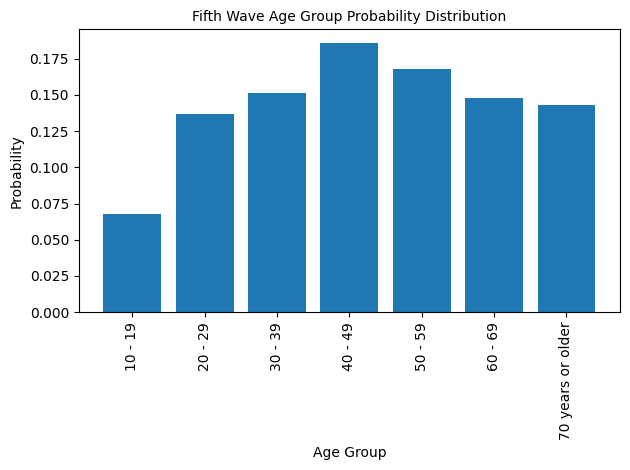

{'40 - 49': 0.18596258164507914, '50 - 59': 0.16678844237794752, '30 - 39': 0.1572013727443817, '60 - 69': 0.14311967231263145, '20 - 29': 0.14183549208457877, '70 years or older': 0.1409941326248201, '10 - 19': 0.06409830621056127}


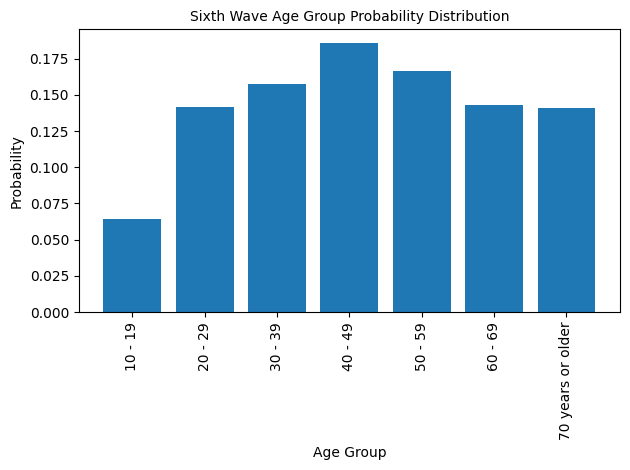

{'40 - 49': 0.18168235824222734, '50 - 59': 0.1716033865344938, '30 - 39': 0.1542438399696445, '60 - 69': 0.14748500011857613, '70 years or older': 0.1470581260227192, '20 - 29': 0.13520051224891502, '10 - 19': 0.06272677686342401}


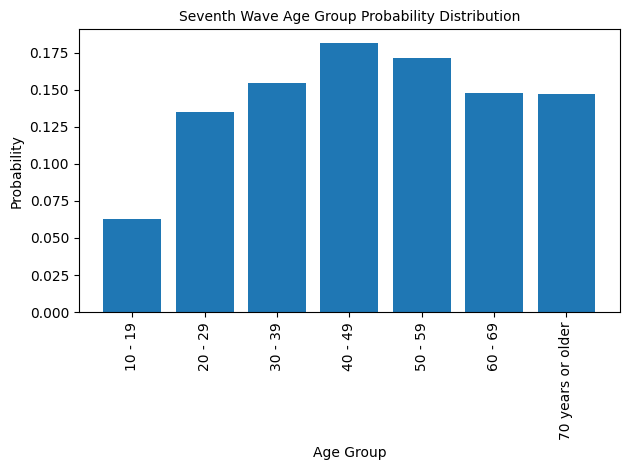

{'40 - 49': 0.17776250827098286, '50 - 59': 0.17641370183743066, '70 years or older': 0.1576831068356492, '60 - 69': 0.14979386165826844, '30 - 39': 0.14880134371659795, '20 - 29': 0.13027434213874892, '10 - 19': 0.05927113554232198}


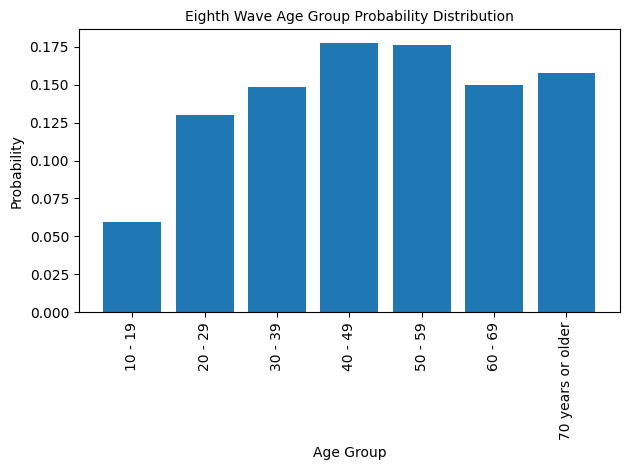

{'50 - 59': 0.18135174862024017, '40 - 49': 0.17114568599717114, '70 years or older': 0.16759575117175582, '60 - 69': 0.15298000388274122, '30 - 39': 0.14086030451784673, '20 - 29': 0.12796405690989268, '10 - 19': 0.05810244890035222}


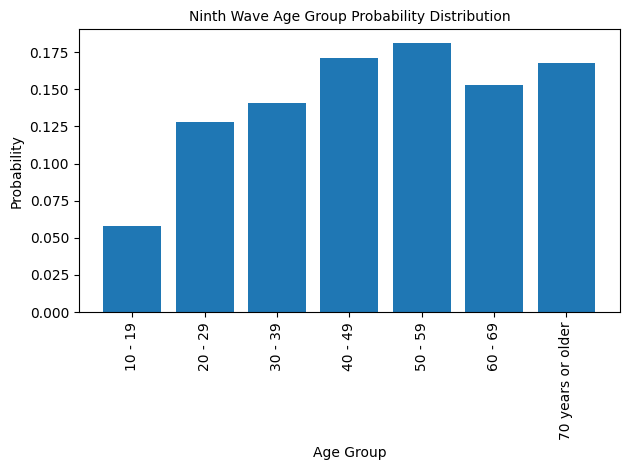

{'50 - 59': 0.1842527027420812, '70 years or older': 0.1776670454876592, '40 - 49': 0.16723489815543316, '60 - 69': 0.15383046303581316, '30 - 39': 0.13529737447912113, '20 - 29': 0.12515662791036514, '10 - 19': 0.05656088818952706}


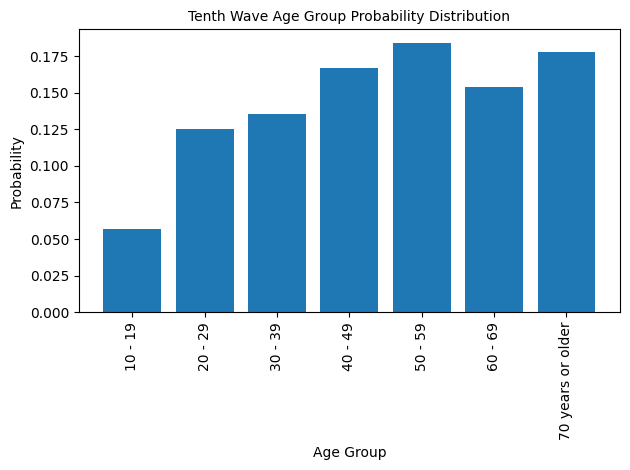

{'50 - 59': 0.18657042869641294, '70 years or older': 0.18272715910511186, '40 - 49': 0.16404199475065617, '60 - 69': 0.15832395950506187, '30 - 39': 0.12851518560179978, '20 - 29': 0.12723409573803274, '10 - 19': 0.05258717660292463}


{'50 - 59': 0.18918272516058493, '70 years or older': 0.18463851305179718, '60 - 69': 0.16748667486674867, '40 - 49': 0.15983326499931666, '20 - 29': 0.12583709170425036, '30 - 39': 0.12481208145414788, '10 - 19': 0.0482096487631543}


{'50 - 59': 0.19037754045076258, '70 years or older': 0.1876629638889881, '60 - 69': 0.17058970603993284, '40 - 49': 0.15819552094867306, '20 - 29': 0.12569203843268922, '30 - 39': 0.12237025395578098, '10 - 19': 0.0451119762831732}


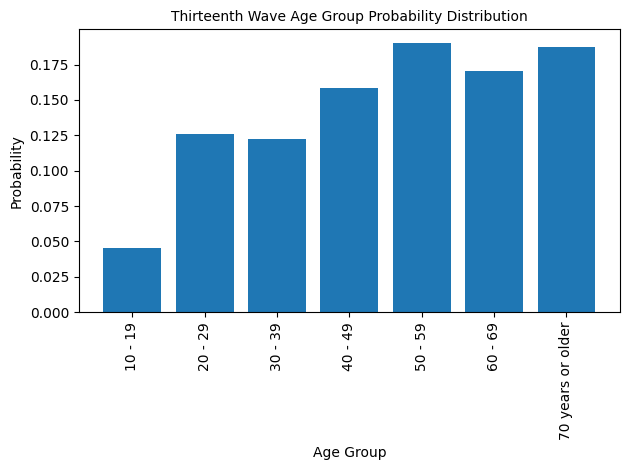

In [30]:
age_group_probability_dicts = [first_wave_age_group_probability_dict, second_wave_age_group_probability_dict, third_wave_age_group_probability_dict, fourth_wave_age_group_probability_dict, fifth_wave_age_group_probability_dict, sixth_wave_age_group_probability_dict, seventh_wave_age_group_probability_dict, eighth_wave_age_group_probability_dict, ninth_wave_age_group_probability_dict, tenth_wave_age_group_probability_dict, eleventh_wave_age_group_probability_dict, twelfth_wave_age_group_probability_dict, thirteenth_wave_age_group_probability_dict] # initialise a list to track the age group distributions

for i in range(len(age_group_probability_dicts)):

    visualise_age_group_distribution(age_group_probability_dicts[i], i + 1)

###### Average Wave Visualisation

In [31]:
average_age_group_probability_dict = {}

# calculate the average probability distribution of the age group across all waves
for key in first_wave_age_group_probability_dict.keys():
    average_age_group_probability_dict[key] = (first_wave_age_group_probability_dict[key] + second_wave_age_group_probability_dict[key] + third_wave_age_group_probability_dict[key] + fourth_wave_age_group_probability_dict[key] + fifth_wave_age_group_probability_dict[key] + sixth_wave_age_group_probability_dict[key] + seventh_wave_age_group_probability_dict[key] + eighth_wave_age_group_probability_dict[key] + ninth_wave_age_group_probability_dict[key] + tenth_wave_age_group_probability_dict[key] + eleventh_wave_age_group_probability_dict[key] + twelfth_wave_age_group_probability_dict[key] + thirteenth_wave_age_group_probability_dict[key]) / 13

# visualise the average probability distribution of the age group across all waves
visualise_age_group_distribution(average_age_group_probability_dict, 14)

{'40 - 49': 0.17786881767641052, '30 - 39': 0.1490009252033531, '20 - 29': 0.13487379157576532, '50 - 59': 0.1729438122949767, '60 - 69': 0.15026062233887572, '70 years or older': 0.1545262539354053, '10 - 19': 0.06052577697521333}


#### Highest Qualification Levels

##### Load Highest Qualification Levels

In [32]:
def generate_highest_education_levels_distribution(dataframe, column_name):
    """
    Generate a probability distribution of the highest education levels in a given dataframe.

    Args:
        dataframe (pandas.DataFrame): The dataframe containing the education level data.
        column_name (str): The name of the column in the dataframe that contains the education level codes.

    Returns:
        dict: A dictionary representing the probability distribution of the highest education levels.
              The keys are the descriptive labels of the education levels, and the values are the probabilities.
    """

    # remove the values -9, -2, and -1 from the dataframe
    dataframe = dataframe[dataframe[column_name] > 0]

    education_levels_dict = {
        1: "university",
        2: "foundation",
        3: "diploma",
        4: "teaching qualification",
        5: "nursing",
        6: "a level",
        7: "welsh ba",
        8: "international ba",
        9: "as level",
        10: "higher grade", 
        11: "sixth year certificate",
        12: "GCSE",
        13: "CSE",
        14: "O grade",
        15: "Other",
        96: "None"
    }

    # use the mapping dictionary to convert the numeric codes to descriptive labels
    education_levels_labels = dataframe[column_name].map(education_levels_dict)

    education_levels_probability_distribution = education_levels_labels.value_counts(normalize=True)

    education_levels_probability_dict = education_levels_probability_distribution.to_dict()

    return education_levels_probability_dict

In [33]:
first_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(first_wave_ukhls_indresp, 'a_qfhigh')

print("Education Levels Probability Distribution: ", first_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'None': 0.2781326781326781, 'GCSE': 0.22052088452088453, 'foundation': 0.1291203931203931, 'university': 0.0861916461916462, 'a level': 0.08357739557739557, 'diploma': 0.06044226044226044, 'CSE': 0.03917444717444717, 'Other': 0.028383292383292385, 'nursing': 0.018791154791154792, 'O grade': 0.015213759213759214, 'teaching qualification': 0.01423095823095823, 'as level': 0.012108108108108109, 'higher grade': 0.00965110565110565, 'sixth year certificate': 0.0028304668304668305, 'international ba': 0.001533169533169533, 'welsh ba': 9.828009828009828e-05}


In [34]:
second_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(second_wave_ukhls_indresp, 'b_qfhigh')

print("Education Levels Probability Distribution: ", second_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.2856390680531789, 'None': 0.2269316835592997, 'foundation': 0.10885876003685666, 'a level': 0.1030670001316309, 'university': 0.08937738581018823, 'diploma': 0.049756482822166645, 'CSE': 0.032512834013426355, 'Other': 0.023430301434776885, 'as level': 0.022377254179281294, 'O grade': 0.019349743319731473, 'higher grade': 0.015664077925496907, 'nursing': 0.009477425299460314, 'teaching qualification': 0.008950901671712518, 'sixth year certificate': 0.0023693563248650784, 'international ba': 0.0017112017901803344, 'welsh ba': 0.0005265236277477951}


In [35]:
third_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(third_wave_ukhls_indresp, 'c_qfhigh')

print("Education Levels Probability Distribution: ", third_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.31473718155433733, 'None': 0.23363431151241534, 'foundation': 0.09916156078684295, 'a level': 0.09722670106417285, 'university': 0.0928732666881651, 'diploma': 0.042244437278297325, 'CSE': 0.029506610770719123, 'as level': 0.02273460174137375, 'Other': 0.018864882296033537, 'O grade': 0.01596259271202838, 'higher grade': 0.013544018058690745, 'nursing': 0.009029345372460496, 'teaching qualification': 0.005320864237342793, 'sixth year certificate': 0.003547242824895195, 'international ba': 0.0009674298613350532, 'welsh ba': 0.0006449532408900354}


In [36]:
fourth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(fourth_wave_ukhls_indresp, 'd_qfhigh')

print("Education Levels Probability Distribution: ", fourth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.40894568690095845, 'None': 0.17465388711395102, 'foundation': 0.09336173233936812, 'a level': 0.09123180688675896, 'university': 0.07170749023784168, 'diploma': 0.04472843450479233, 'as level': 0.0291089811856585, 'CSE': 0.022009229676961305, 'O grade': 0.02023429179978701, 'Other': 0.01668441604543841, 'higher grade': 0.012069577564785232, 'teaching qualification': 0.006034788782392616, 'nursing': 0.005324813631522897, 'sixth year certificate': 0.002129925452609159, 'welsh ba': 0.0010649627263045794, 'international ba': 0.0007099751508697196}


In [37]:
fifth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(fifth_wave_ukhls_indresp, 'e_qfhigh')

print("Education Levels Probability Distribution: ", fifth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.42214380238200266, 'None': 0.18173797970886635, 'foundation': 0.08998676665196295, 'a level': 0.07895897662108513, 'university': 0.07190119100132333, 'as level': 0.031760035288928096, 'diploma': 0.030436700485222762, 'O grade': 0.029554477282752536, 'Other': 0.018526687251874726, 'higher grade': 0.017203352448169385, 'CSE': 0.016321129245699163, 'nursing': 0.0035288928098809, 'sixth year certificate': 0.0030877812086457872, 'teaching qualification': 0.002646669607410675, 'welsh ba': 0.0022055580061755625}


In [38]:
sixth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(sixth_wave_ukhls_indresp, 'f_qfhigh')

print("Education Levels Probability Distribution: ", sixth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.28829993535875886, 'foundation': 0.14652014652014653, 'a level': 0.12561947856065503, 'None': 0.12303382891618185, 'university': 0.12066365007541478, 'diploma': 0.09459168282697694, 'as level': 0.022408963585434174, 'CSE': 0.020900667959491488, 'Other': 0.0196078431372549, 'O grade': 0.012281835811247576, 'nursing': 0.007972419737125619, 'higher grade': 0.007326007326007326, 'teaching qualification': 0.004093945270415859, 'sixth year certificate': 0.004093945270415859, 'international ba': 0.002370178840767076, 'welsh ba': 0.00021547080370609782}


In [39]:
seventh_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(seventh_wave_ukhls_indresp, 'g_qfhigh')

print("Education Levels Probability Distribution: ", seventh_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.3334735071488646, 'None': 0.20815811606391926, 'foundation': 0.11816652649285113, 'a level': 0.09461732548359966, 'university': 0.08074011774600505, 'diploma': 0.059293523969722456, 'as level': 0.026492851135407905, 'Other': 0.025231286795626577, 'O grade': 0.01808242220353238, 'CSE': 0.01345668629100084, 'higher grade': 0.008410428931875526, 'nursing': 0.0054667788057190915, 'sixth year certificate': 0.004625735912531539, 'teaching qualification': 0.002523128679562658, 'international ba': 0.001261564339781329}


In [40]:
eighth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(eighth_wave_ukhls_indresp, 'h_qfhigh')

print("Education Levels Probability Distribution: ", eighth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.37030812324929974, 'None': 0.20840336134453782, 'foundation': 0.1103641456582633, 'a level': 0.08739495798319327, 'university': 0.0773109243697479, 'diploma': 0.047058823529411764, 'as level': 0.025210084033613446, 'Other': 0.020168067226890758, 'O grade': 0.016246498599439777, 'CSE': 0.013445378151260505, 'higher grade': 0.012324929971988795, 'teaching qualification': 0.0056022408963585435, 'nursing': 0.004481792717086834, 'sixth year certificate': 0.0011204481792717086, 'international ba': 0.0005602240896358543}


In [41]:
ninth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(ninth_wave_ukhls_indresp, 'i_qfhigh')

print("Education Levels Probability Distribution: ", ninth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.4488888888888889, 'None': 0.21866666666666668, 'a level': 0.08, 'university': 0.06133333333333333, 'diploma': 0.048, 'as level': 0.037333333333333336, 'CSE': 0.032, 'O grade': 0.027555555555555555, 'foundation': 0.014222222222222223, 'higher grade': 0.014222222222222223, 'Other': 0.011555555555555555, 'nursing': 0.005333333333333333, 'international ba': 0.0008888888888888889}


In [42]:
tenth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(tenth_wave_ukhls_indresp, 'j_qfhigh')

print("Education Levels Probability Distribution: ", tenth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.480225988700565, 'None': 0.2192090395480226, 'a level': 0.0903954802259887, 'university': 0.0576271186440678, 'diploma': 0.04180790960451977, 'O grade': 0.02937853107344633, 'as level': 0.02711864406779661, 'higher grade': 0.01807909604519774, 'CSE': 0.011299435028248588, 'Other': 0.010169491525423728, 'foundation': 0.00903954802259887, 'nursing': 0.004519774011299435, 'international ba': 0.0011299435028248588}


In [43]:
eleventh_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(eleventh_wave_ukhls_indresp, 'k_qfhigh')

print("Education Levels Probability Distribution: ", eleventh_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.5239852398523985, 'None': 0.1795817958179582, 'a level': 0.0897908979089791, 'university': 0.05781057810578106, 'diploma': 0.055350553505535055, 'higher grade': 0.020910209102091022, 'O grade': 0.01968019680196802, 'Other': 0.012300123001230012, 'CSE': 0.012300123001230012, 'foundation': 0.008610086100861008, 'nursing': 0.007380073800738007, 'as level': 0.007380073800738007, 'sixth year certificate': 0.0024600246002460025, 'welsh ba': 0.0012300123001230013, 'teaching qualification': 0.0012300123001230013}


In [44]:
twelfth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(twelfth_wave_ukhls_indresp, 'l_qfhigh')

print("Education Levels Probability Distribution: ", twelfth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.5367892976588629, 'None': 0.18896321070234115, 'a level': 0.07525083612040134, 'university': 0.046822742474916385, 'diploma': 0.0451505016722408, 'O grade': 0.026755852842809364, 'as level': 0.023411371237458192, 'higher grade': 0.016722408026755852, 'Other': 0.011705685618729096, 'CSE': 0.011705685618729096, 'foundation': 0.008361204013377926, 'nursing': 0.006688963210702341, 'sixth year certificate': 0.0016722408026755853}


In [45]:
thirteenth_wave_education_levels_probability_dict = generate_highest_education_levels_distribution(thirteenth_wave_ukhls_indresp, 'm_qfhigh')

print("Education Levels Probability Distribution: ", thirteenth_wave_education_levels_probability_dict)

Education Levels Probability Distribution:  {'GCSE': 0.4984076433121019, 'None': 0.18630573248407642, 'a level': 0.12101910828025478, 'university': 0.042993630573248405, 'diploma': 0.03980891719745223, 'O grade': 0.027070063694267517, 'as level': 0.020700636942675158, 'Other': 0.01751592356687898, 'CSE': 0.014331210191082803, 'higher grade': 0.012738853503184714, 'sixth year certificate': 0.006369426751592357, 'nursing': 0.006369426751592357, 'foundation': 0.006369426751592357}


In [46]:
average_education_level_probability_dict = {}

education_waves = [first_wave_education_levels_probability_dict, second_wave_education_levels_probability_dict, third_wave_education_levels_probability_dict, fourth_wave_education_levels_probability_dict, fifth_wave_education_levels_probability_dict, sixth_wave_education_levels_probability_dict, seventh_wave_education_levels_probability_dict, eighth_wave_education_levels_probability_dict, ninth_wave_education_levels_probability_dict, tenth_wave_education_levels_probability_dict, eleventh_wave_education_levels_probability_dict, twelfth_wave_education_levels_probability_dict, thirteenth_wave_education_levels_probability_dict]

# calculate the average probability distribution of the highest education levels across all waves
for key in first_wave_education_levels_probability_dict.keys():
    average_education_level_probability_dict[key] = 0
    total_waves_with_key = 0

    for wave_number, wave in enumerate(education_waves, start=1):

        if key in wave:
            average_education_level_probability_dict[key] += wave[key]
            total_waves_with_key += 1

    if total_waves_with_key > 0:
        average_education_level_probability_dict[key] /= total_waves_with_key
    else:
        # Handle the case where the key does not exist in any wave
        average_education_level_probability_dict[key] = 0  

print("Average Education Level Probability Distribution: ", average_education_level_probability_dict)


Average Education Level Probability Distribution:  {'None': 0.20210863781314725, 'GCSE': 0.3947973267370078, 'foundation': 0.07247250143979517, 'university': 0.07364254425012919, 'a level': 0.09370384344954734, 'diploma': 0.05066694060296912, 'CSE': 0.020689495163253576, 'Other': 0.018011042756846583, 'nursing': 0.0072587841747751075, 'O grade': 0.021335832377717318, 'teaching qualification': 0.005625945519586321, 'as level': 0.02370345681844666, 'higher grade': 0.013758945136736237, 'sixth year certificate': 0.003118781287110464, 'international ba': 0.0012369528886058496, 'welsh ba': 0.0008551086861753101}


##### Plotting Education Distribution

In [47]:
def visualise_education_levels_probability_dict(education_levels_probability_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the education levels in the UKHLS data.
    Parameters:
    •	‘education_levels_probability_dict’ (dict): the probability distribution of the education levels in the UKHLS data.
    •	‘wave_number’ (int): the wave number of the UKHLS data.
    """
    # display the probability distribution of the education levels in the UKHLS data
    print(education_levels_probability_dict)

    if wave_number == 1:
        fig_title = "First Wave Education Level Probability Distribution"
    elif wave_number == 2:
        fig_title = "Second Wave Education Level Probability Distribution"
    elif wave_number == 3:
        fig_title = "Third Wave Education Level Probability Distribution"
    elif wave_number == 4:
        fig_title = "Fourth Wave Education Level Probability Distribution"
    elif wave_number == 5:
        fig_title = "Fifth Wave Education Level Probability Distribution"
    elif wave_number == 6:
        fig_title = "Sixth Wave Education Level Probability Distribution"
    elif wave_number == 7:
        fig_title = "Seventh Wave Education Level Probability Distribution"
    elif wave_number == 8:
        fig_title = "Eighth Wave Education Level Probability Distribution"
    elif wave_number == 9:
        fig_title = "Ninth Wave Education Level Probability Distribution"
    elif wave_number == 10:
        fig_title = "Tenth Wave Education Level Probability Distribution"
    elif wave_number == 11:
        fig_title = "Eleventh Wave Education Level Probability Distribution"
    elif wave_number == 12:
        fig_title = "Twelfth Wave Education Level Probability Distribution"
    elif wave_number == 13:
        fig_title = "Thirteenth Wave Education Level Probability Distribution"
    elif wave_number == 14:
        fig_title = "Average Education Level Probability Distribution across 13 Waves of UKHLS Study"

    qualification_order = [
        "None",
        "Other",
        "O grade",
        "CSE",
        "GCSE",
        "as level",
        "a level",
        "foundation",
        "diploma",
        "teaching qualification",
        "nursing",
        "higher grade",
        "welsh ba",
        "international ba",
        "university",
        "sixth year certificate"
    ]

    qualificiation_order_indexes = [0, 1, 2, 3, 4, 9, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]

    # Create a sorted dictionary according to the predefined order
    sorted_education_levels = {key: education_levels_probability_dict[key] for key in qualification_order if key in education_levels_probability_dict}

    # plot the education_levels_probability_dict
    plt.bar(sorted_education_levels.keys(), sorted_education_levels.values())
    # rotate the x-axis labels to 90 degrees to make them more readable

    qualification_order = ['\n'.join(wrap(l, 12)) for l in qualification_order]

    plt.xticks(qualificiation_order_indexes, qualification_order, rotation=90, fontsize=8)
    plt.xlabel('Education Level')
    plt.ylabel('Probability')
    plt.title(fig_title, fontsize=10)
    plt.tight_layout() # adjust the plot to fit the labels
    
    if wave_number != 14:
        plt.savefig(f"Figures/Profiling-Variables/Education Levels/Education Level Probability Distribution - Wave {wave_number}.png")
    else:
        plt.savefig("Figures/Profiling-Variables/Education Levels/Average Education Level Probability Distribution.png")
    
    plt.show()

##### Qualification Levels Visualisations

###### First Wave Visualisations

{'None': 0.2781326781326781, 'GCSE': 0.22052088452088453, 'foundation': 0.1291203931203931, 'university': 0.0861916461916462, 'a level': 0.08357739557739557, 'diploma': 0.06044226044226044, 'CSE': 0.03917444717444717, 'Other': 0.028383292383292385, 'nursing': 0.018791154791154792, 'O grade': 0.015213759213759214, 'teaching qualification': 0.01423095823095823, 'as level': 0.012108108108108109, 'higher grade': 0.00965110565110565, 'sixth year certificate': 0.0028304668304668305, 'international ba': 0.001533169533169533, 'welsh ba': 9.828009828009828e-05}


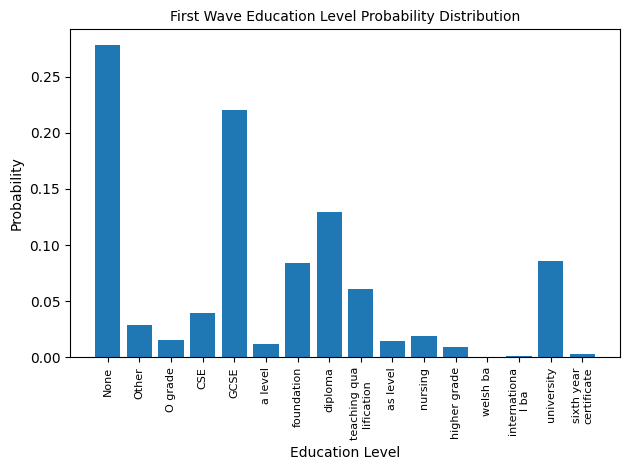

In [48]:
visualise_education_levels_probability_dict(first_wave_education_levels_probability_dict, 1)

###### Second Wave Visualisations

In [49]:
visualise_education_levels_probability_dict(second_wave_education_levels_probability_dict, 2)

{'GCSE': 0.2856390680531789, 'None': 0.2269316835592997, 'foundation': 0.10885876003685666, 'a level': 0.1030670001316309, 'university': 0.08937738581018823, 'diploma': 0.049756482822166645, 'CSE': 0.032512834013426355, 'Other': 0.023430301434776885, 'as level': 0.022377254179281294, 'O grade': 0.019349743319731473, 'higher grade': 0.015664077925496907, 'nursing': 0.009477425299460314, 'teaching qualification': 0.008950901671712518, 'sixth year certificate': 0.0023693563248650784, 'international ba': 0.0017112017901803344, 'welsh ba': 0.0005265236277477951}


###### Third Wave Visualisations

{'GCSE': 0.31473718155433733, 'None': 0.23363431151241534, 'foundation': 0.09916156078684295, 'a level': 0.09722670106417285, 'university': 0.0928732666881651, 'diploma': 0.042244437278297325, 'CSE': 0.029506610770719123, 'as level': 0.02273460174137375, 'Other': 0.018864882296033537, 'O grade': 0.01596259271202838, 'higher grade': 0.013544018058690745, 'nursing': 0.009029345372460496, 'teaching qualification': 0.005320864237342793, 'sixth year certificate': 0.003547242824895195, 'international ba': 0.0009674298613350532, 'welsh ba': 0.0006449532408900354}


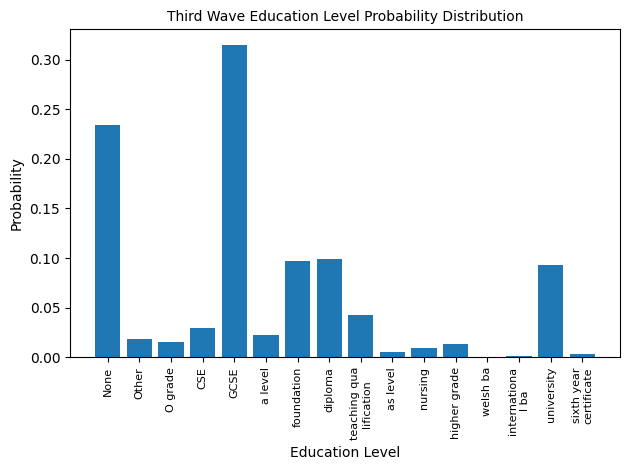

In [50]:
visualise_education_levels_probability_dict(third_wave_education_levels_probability_dict, 3)

###### Fourth Wave Visualisations

In [51]:
visualise_education_levels_probability_dict(fourth_wave_education_levels_probability_dict, 4)

{'GCSE': 0.40894568690095845, 'None': 0.17465388711395102, 'foundation': 0.09336173233936812, 'a level': 0.09123180688675896, 'university': 0.07170749023784168, 'diploma': 0.04472843450479233, 'as level': 0.0291089811856585, 'CSE': 0.022009229676961305, 'O grade': 0.02023429179978701, 'Other': 0.01668441604543841, 'higher grade': 0.012069577564785232, 'teaching qualification': 0.006034788782392616, 'nursing': 0.005324813631522897, 'sixth year certificate': 0.002129925452609159, 'welsh ba': 0.0010649627263045794, 'international ba': 0.0007099751508697196}


###### Fifth Wave Visualisations

In [52]:
visualise_education_levels_probability_dict(fifth_wave_education_levels_probability_dict, 5)

{'GCSE': 0.42214380238200266, 'None': 0.18173797970886635, 'foundation': 0.08998676665196295, 'a level': 0.07895897662108513, 'university': 0.07190119100132333, 'as level': 0.031760035288928096, 'diploma': 0.030436700485222762, 'O grade': 0.029554477282752536, 'Other': 0.018526687251874726, 'higher grade': 0.017203352448169385, 'CSE': 0.016321129245699163, 'nursing': 0.0035288928098809, 'sixth year certificate': 0.0030877812086457872, 'teaching qualification': 0.002646669607410675, 'welsh ba': 0.0022055580061755625}


###### Sixth Wave Visualisations

In [53]:
visualise_education_levels_probability_dict(sixth_wave_education_levels_probability_dict, 6)

{'GCSE': 0.28829993535875886, 'foundation': 0.14652014652014653, 'a level': 0.12561947856065503, 'None': 0.12303382891618185, 'university': 0.12066365007541478, 'diploma': 0.09459168282697694, 'as level': 0.022408963585434174, 'CSE': 0.020900667959491488, 'Other': 0.0196078431372549, 'O grade': 0.012281835811247576, 'nursing': 0.007972419737125619, 'higher grade': 0.007326007326007326, 'teaching qualification': 0.004093945270415859, 'sixth year certificate': 0.004093945270415859, 'international ba': 0.002370178840767076, 'welsh ba': 0.00021547080370609782}


###### Seventh Wave Visualisations

In [54]:
visualise_education_levels_probability_dict(seventh_wave_education_levels_probability_dict, 7)

{'GCSE': 0.3334735071488646, 'None': 0.20815811606391926, 'foundation': 0.11816652649285113, 'a level': 0.09461732548359966, 'university': 0.08074011774600505, 'diploma': 0.059293523969722456, 'as level': 0.026492851135407905, 'Other': 0.025231286795626577, 'O grade': 0.01808242220353238, 'CSE': 0.01345668629100084, 'higher grade': 0.008410428931875526, 'nursing': 0.0054667788057190915, 'sixth year certificate': 0.004625735912531539, 'teaching qualification': 0.002523128679562658, 'international ba': 0.001261564339781329}


###### Eighth Wave Visualisations

{'GCSE': 0.37030812324929974, 'None': 0.20840336134453782, 'foundation': 0.1103641456582633, 'a level': 0.08739495798319327, 'university': 0.0773109243697479, 'diploma': 0.047058823529411764, 'as level': 0.025210084033613446, 'Other': 0.020168067226890758, 'O grade': 0.016246498599439777, 'CSE': 0.013445378151260505, 'higher grade': 0.012324929971988795, 'teaching qualification': 0.0056022408963585435, 'nursing': 0.004481792717086834, 'sixth year certificate': 0.0011204481792717086, 'international ba': 0.0005602240896358543}


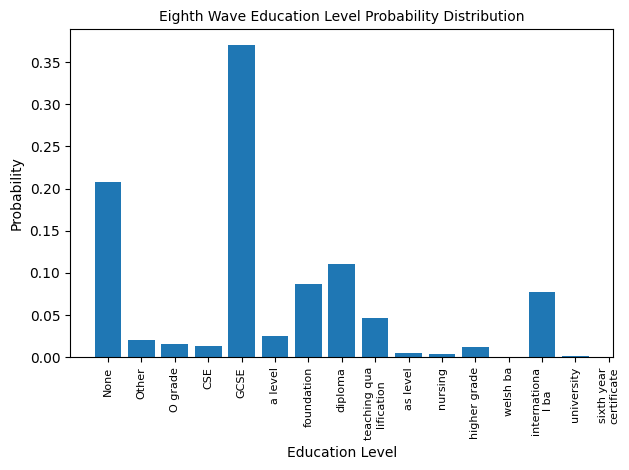

In [55]:
visualise_education_levels_probability_dict(eighth_wave_education_levels_probability_dict, 8)

###### Ninth Wave Visualisations

{'GCSE': 0.4488888888888889, 'None': 0.21866666666666668, 'a level': 0.08, 'university': 0.06133333333333333, 'diploma': 0.048, 'as level': 0.037333333333333336, 'CSE': 0.032, 'O grade': 0.027555555555555555, 'foundation': 0.014222222222222223, 'higher grade': 0.014222222222222223, 'Other': 0.011555555555555555, 'nursing': 0.005333333333333333, 'international ba': 0.0008888888888888889}


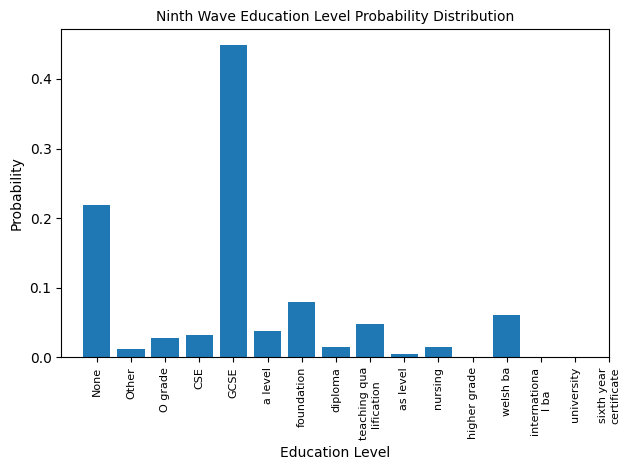

In [56]:
visualise_education_levels_probability_dict(ninth_wave_education_levels_probability_dict, 9)

###### Tenth Wave Visualisations

{'GCSE': 0.480225988700565, 'None': 0.2192090395480226, 'a level': 0.0903954802259887, 'university': 0.0576271186440678, 'diploma': 0.04180790960451977, 'O grade': 0.02937853107344633, 'as level': 0.02711864406779661, 'higher grade': 0.01807909604519774, 'CSE': 0.011299435028248588, 'Other': 0.010169491525423728, 'foundation': 0.00903954802259887, 'nursing': 0.004519774011299435, 'international ba': 0.0011299435028248588}


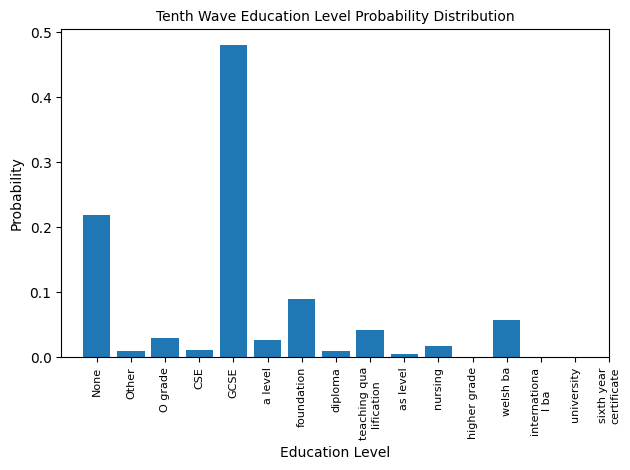

In [57]:
visualise_education_levels_probability_dict(tenth_wave_education_levels_probability_dict, 10)

###### Eleventh Wave Visualisations

{'GCSE': 0.5239852398523985, 'None': 0.1795817958179582, 'a level': 0.0897908979089791, 'university': 0.05781057810578106, 'diploma': 0.055350553505535055, 'higher grade': 0.020910209102091022, 'O grade': 0.01968019680196802, 'Other': 0.012300123001230012, 'CSE': 0.012300123001230012, 'foundation': 0.008610086100861008, 'nursing': 0.007380073800738007, 'as level': 0.007380073800738007, 'sixth year certificate': 0.0024600246002460025, 'welsh ba': 0.0012300123001230013, 'teaching qualification': 0.0012300123001230013}


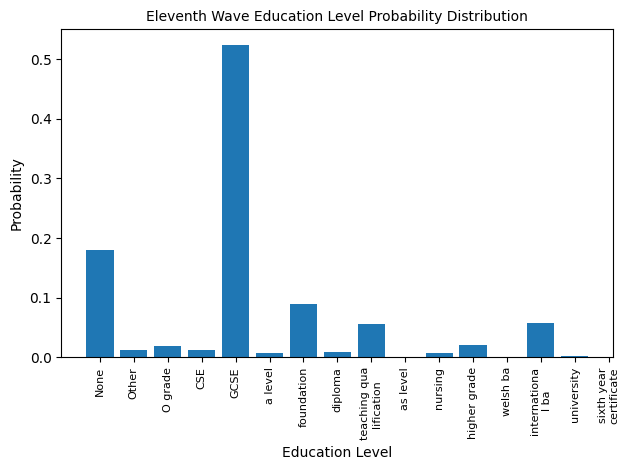

In [58]:
visualise_education_levels_probability_dict(eleventh_wave_education_levels_probability_dict, 11)

###### Twelfth Wave Visualisations

In [59]:
visualise_education_levels_probability_dict(twelfth_wave_education_levels_probability_dict, 12)

{'GCSE': 0.5367892976588629, 'None': 0.18896321070234115, 'a level': 0.07525083612040134, 'university': 0.046822742474916385, 'diploma': 0.0451505016722408, 'O grade': 0.026755852842809364, 'as level': 0.023411371237458192, 'higher grade': 0.016722408026755852, 'Other': 0.011705685618729096, 'CSE': 0.011705685618729096, 'foundation': 0.008361204013377926, 'nursing': 0.006688963210702341, 'sixth year certificate': 0.0016722408026755853}


###### Thirteenth Wave Visualisations

In [60]:
visualise_education_levels_probability_dict(thirteenth_wave_education_levels_probability_dict, 13)

{'GCSE': 0.4984076433121019, 'None': 0.18630573248407642, 'a level': 0.12101910828025478, 'university': 0.042993630573248405, 'diploma': 0.03980891719745223, 'O grade': 0.027070063694267517, 'as level': 0.020700636942675158, 'Other': 0.01751592356687898, 'CSE': 0.014331210191082803, 'higher grade': 0.012738853503184714, 'sixth year certificate': 0.006369426751592357, 'nursing': 0.006369426751592357, 'foundation': 0.006369426751592357}


###### Average Wave Visualisations

In [61]:
visualise_education_levels_probability_dict(average_education_level_probability_dict, 14)

{'None': 0.20210863781314725, 'GCSE': 0.3947973267370078, 'foundation': 0.07247250143979517, 'university': 0.07364254425012919, 'a level': 0.09370384344954734, 'diploma': 0.05066694060296912, 'CSE': 0.020689495163253576, 'Other': 0.018011042756846583, 'nursing': 0.0072587841747751075, 'O grade': 0.021335832377717318, 'teaching qualification': 0.005625945519586321, 'as level': 0.02370345681844666, 'higher grade': 0.013758945136736237, 'sixth year certificate': 0.003118781287110464, 'international ba': 0.0012369528886058496, 'welsh ba': 0.0008551086861753101}


#### Ethnicity

##### Load Ethnicity

In [62]:
def generate_ethnicity_distribution(dataframe, column_name):
    """
    Generate the probability distribution of ethnicity labels in a given dataframe column.

    Args:
        dataframe (pandas.DataFrame): The dataframe containing the ethnicity data.
        column_name (str): The name of the column containing the ethnicity codes.

    Returns:
        dict: A dictionary representing the probability distribution of ethnicity labels.

    """

    # remove the values -9 from the dataframe
    dataframe = dataframe[dataframe[column_name] > 0]

    # Define the mapping dictionary for ethnicity
    ethnicity_dict = {
        1.0: 'British',
        2.0: 'Irish',
        3.0: 'Gypsy or Irish',
        4.0: 'Other White background',
        5.0: 'White and Black Caribbean',
        6.0: 'White and Black African',
        7.0: 'White and Asian',
        8.0: 'Other Mixed background',
        9.0: 'Indian',
        10.0: 'Pakistani',
        11.0: 'Bangladeshi',
        12.0: 'Chinese',
        13.0: 'Other Asian background',
        14.0: 'Caribbean',
        15.0: 'African',
        16.0: 'Other Black background',
        17.0: 'Arab',
        97.0: 'Other'
    }

    # Load the specified variable from the dataframe
    racel_dv = dataframe[column_name]

    # Map the numeric codes to descriptive labels using the dictionary
    ethnicity_labels = racel_dv.map(ethnicity_dict)

    # Calculate the probability distribution of the ethnicity labels
    ethnicity_probability_distribution = ethnicity_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    ethnicity_probability_distribution_dict = ethnicity_probability_distribution.to_dict()

    return ethnicity_probability_distribution_dict

###### First Wave

In [63]:
# first wave ethnicity distribution initialisation
first_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(first_wave_ukhls_indresp, 'a_racel_dv')

print("First wave ethnicity probability distribution: ", first_wave_ethnicity_probability_distribution_dict)

First wave ethnicity probability distribution:  {'British': 0.7517338160222905, 'Indian': 0.04041164148142122, 'Pakistani': 0.03127987146372715, 'Other White background': 0.030608716874453417, 'African': 0.030547702820883076, 'Bangladeshi': 0.024181903231711037, 'Caribbean': 0.02408021314242714, 'Irish': 0.014928105106876284, 'Other Asian background': 0.013321401696190689, 'White and Black Caribbean': 0.007240334357013566, 'Chinese': 0.006731883910594073, 'Other': 0.005979377249893225, 'Arab': 0.005918363196322886, 'White and Asian': 0.004128617624926275, 'Other Mixed background': 0.0038235473570745796, 'White and Black African': 0.003233744839227969, 'Other Black background': 0.0018507596249669508}


###### Second Wave

In [64]:
second_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(second_wave_ukhls_indresp, 'b_racel_dv')

print("Second wave ethnicity probability distribution: ", second_wave_ethnicity_probability_distribution_dict)

Second wave ethnicity probability distribution:  {'British': 0.7999200289419067, 'Indian': 0.031207753384489424, 'Other White background': 0.025267046211847142, 'Pakistani': 0.02490527237761572, 'Irish': 0.02294407738151907, 'African': 0.02123041185094918, 'Bangladeshi': 0.017784040061691958, 'Caribbean': 0.017231858946286108, 'Other Asian background': 0.010301033911536778, 'White and Black Caribbean': 0.005845503532055066, 'Chinese': 0.004569774748186371, 'Other': 0.004417448923246825, 'Arab': 0.0039223899921933016, 'White and Asian': 0.003522534701726994, 'Other Mixed background': 0.003046516498790914, 'White and Black African': 0.0023800910146804014, 'Other Black background': 0.0015042175212780138}


###### Third Wave

In [65]:
third_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(third_wave_ukhls_indresp, 'c_racel_dv')

print("Third wave ethnicity probability distribution: ", third_wave_ethnicity_probability_distribution_dict)

Third wave ethnicity probability distribution:  {'British': 0.8051756391602577, 'Indian': 0.03018083558511744, 'Pakistani': 0.025441696113074206, 'Other White background': 0.023321554770318022, 'Irish': 0.022552483891082935, 'African': 0.020245271253377675, 'Bangladeshi': 0.017626273124090625, 'Caribbean': 0.017210559135314902, 'Other Asian background': 0.010101849927250052, 'White and Black Caribbean': 0.0060486385366867595, 'Other': 0.004115568488879651, 'Chinese': 0.0038037829972978592, 'Arab': 0.003762211598420287, 'White and Asian': 0.003616711702348784, 'Other Mixed background': 0.003076283516940345, 'White and Black African': 0.0022656412388276865, 'Other Black background': 0.001454998960715028}


###### Fourth Wave

In [66]:
fourth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(fourth_wave_ukhls_indresp, 'd_racel_dv')

print("Fourth wave ethnicity probability distribution: ", fourth_wave_ethnicity_probability_distribution_dict)

Fourth wave ethnicity probability distribution:  {'British': 0.8052084934454667, 'Indian': 0.03100502843591489, 'Pakistani': 0.026020508991897413, 'Other White background': 0.023012230737137963, 'Irish': 0.02160690366922114, 'African': 0.01958674600909071, 'Bangladeshi': 0.017983794822248083, 'Caribbean': 0.016995674227619068, 'Other Asian background': 0.01012274653608836, 'White and Black Caribbean': 0.006455721218242902, 'Chinese': 0.004040315320260864, 'Other': 0.0038866076722074614, 'White and Asian': 0.003732900024154059, 'Arab': 0.003337651786302453, 'Other Mixed background': 0.003227860609121451, 'White and Black African': 0.0024154058979820384, 'Other Black background': 0.0013614105970444215}


###### Fifth Wave

In [67]:
# Wave 5
fifth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(fifth_wave_ukhls_indresp, 'e_racel_dv')
print("Wave 5 ethnicity probability distribution: ", fifth_wave_ethnicity_probability_distribution_dict)

Wave 5 ethnicity probability distribution:  {'British': 0.8067039363195068, 'Indian': 0.031196079784664228, 'Pakistani': 0.026318816573492533, 'Other White background': 0.02201670232590241, 'Irish': 0.020866404398739272, 'African': 0.019578070720316563, 'Bangladeshi': 0.017783605953942072, 'Caribbean': 0.01621920077300021, 'Other Asian background': 0.009915568132146226, 'White and Black Caribbean': 0.007039823314238388, 'Chinese': 0.003980030827984448, 'Other': 0.00391101295235466, 'White and Asian': 0.0038419950767248716, 'Other Mixed background': 0.0034048818644028802, 'Arab': 0.0032438401546000415, 'White and Black African': 0.0024846435226723723, 'Other Black background': 0.001495387305312076}


###### Sixth Wave

In [68]:
# Wave 6
sixth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(sixth_wave_ukhls_indresp, 'f_racel_dv')
print("Wave 6 ethnicity probability distribution: ", sixth_wave_ethnicity_probability_distribution_dict)

Wave 6 ethnicity probability distribution:  {'British': 0.7359889048041288, 'Indian': 0.043175772457540416, 'Pakistani': 0.038332992292476636, 'Other White background': 0.03824204806402474, 'African': 0.030784621330968782, 'Caribbean': 0.021735670600004548, 'Bangladeshi': 0.021258213400632064, 'Irish': 0.020553395630129822, 'Other Asian background': 0.012504831412136506, 'White and Black Caribbean': 0.007639315189959757, 'Arab': 0.005752222449582793, 'Chinese': 0.005320237364436259, 'Other': 0.005047404679080554, 'White and Asian': 0.004501739308369143, 'Other Mixed background': 0.004433531137030216, 'White and Black African': 0.002819271082008958, 'Other Black background': 0.0019098287974899392}


###### Seventh Wave

In [69]:
# Wave 7
seventh_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(seventh_wave_ukhls_indresp, 'g_racel_dv')
print("Wave 7 ethnicity probability distribution: ", seventh_wave_ethnicity_probability_distribution_dict)

Wave 7 ethnicity probability distribution:  {'British': 0.7507948450355557, 'Indian': 0.04310365750066743, 'Pakistani': 0.0393175254229061, 'Other White background': 0.033711137538528745, 'African': 0.027231026866975705, 'Irish': 0.020605295730893383, 'Bangladeshi': 0.0204596752663641, 'Caribbean': 0.019925733563090065, 'Other Asian background': 0.01113996553649006, 'White and Black Caribbean': 0.00737810353615028, 'Other': 0.004489964322986191, 'Arab': 0.004465694245564643, 'Chinese': 0.004441424168143096, 'White and Asian': 0.0043443438584569085, 'Other Mixed background': 0.0040773730068198915, 'White and Black African': 0.002718248671213261, 'Other Black background': 0.0017959857291944762}


###### Eighth Wave

In [70]:
# Wave 8
eighth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(eighth_wave_ukhls_indresp, 'h_racel_dv')
print("Wave 8 ethnicity probability distribution: ", eighth_wave_ethnicity_probability_distribution_dict)

Wave 8 ethnicity probability distribution:  {'British': 0.7561000853882578, 'Indian': 0.04199549771004218, 'Pakistani': 0.03925272336791989, 'Other White background': 0.0317489067715476, 'African': 0.024322715864103294, 'Irish': 0.021295313995911714, 'Bangladeshi': 0.02124356353662639, 'Caribbean': 0.019768675446994594, 'Other Asian background': 0.011074598287059798, 'White and Black Caribbean': 0.007788444122441587, 'White and Asian': 0.004528165187466039, 'Arab': 0.0044764147281807125, 'Other': 0.004243537661396745, 'Other Mixed background': 0.004165911972468755, 'Chinese': 0.0040106605946127775, 'White and Black African': 0.002535772504980982, 'Other Black background': 0.0014490128599891324}


###### Ninth Wave

In [71]:
# Wave 9
ninth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(ninth_wave_ukhls_indresp, 'i_racel_dv')
print("Wave 9 ethnicity probability distribution: ", ninth_wave_ethnicity_probability_distribution_dict)

Wave 9 ethnicity probability distribution:  {'British': 0.7656661991584853, 'Indian': 0.04134642356241234, 'Pakistani': 0.03929873772791024, 'Other White background': 0.029929873772791025, 'African': 0.02238429172510519, 'Irish': 0.021318373071528753, 'Bangladeshi': 0.021262272089761572, 'Caribbean': 0.017980364656381486, 'Other Asian background': 0.009509116409537166, 'White and Black Caribbean': 0.007685834502103786, 'White and Asian': 0.00485273492286115, 'Other': 0.004123422159887798, 'Other Mixed background': 0.003955119214586255, 'Chinese': 0.003955119214586255, 'Arab': 0.003309957924263675, 'White and Black African': 0.0022159887798036465, 'Other Black background': 0.00120617110799439}


###### Tenth Wave

In [72]:
# Wave 10
tenth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(tenth_wave_ukhls_indresp, 'j_racel_dv')
print("Wave 10 ethnicity probability distribution: ", tenth_wave_ethnicity_probability_distribution_dict)

Wave 10 ethnicity probability distribution:  {'British': 0.7735876785609311, 'Indian': 0.04017988360472635, 'Pakistani': 0.038651460819469755, 'Other White background': 0.028393392510728352, 'Bangladeshi': 0.020810064076185998, 'Irish': 0.020721885838575038, 'African': 0.02063370760096408, 'Caribbean': 0.01701839985891482, 'Other Asian background': 0.009141143965669273, 'White and Black Caribbean': 0.007524542942801716, 'White and Asian': 0.005261301510787138, 'Chinese': 0.0037916642172711773, 'Other': 0.003762271471400858, 'Other Mixed background': 0.00370348597966022, 'Arab': 0.003262594791605432, 'White and Black African': 0.0023808124154958555, 'Other Black background': 0.0011757098348127682}


###### Eleventh Wave

In [73]:
# Wave 11
eleventh_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(eleventh_wave_ukhls_indresp, 'k_racel_dv')
print("Wave 11 ethnicity probability distribution: ", eleventh_wave_ethnicity_probability_distribution_dict)

Wave 11 ethnicity probability distribution:  {'British': 0.7796232339089482, 'Indian': 0.041036106750392466, 'Pakistani': 0.03629513343799058, 'Other White background': 0.026405023547880692, 'Irish': 0.020784929356357926, 'Bangladeshi': 0.020784929356357926, 'African': 0.018241758241758242, 'Caribbean': 0.017111459968602825, 'Other Asian background': 0.009073783359497645, 'White and Black Caribbean': 0.0074725274725274725, 'White and Asian': 0.005023547880690738, 'Other': 0.003924646781789639, 'Other Mixed background': 0.0037676609105180532, 'Chinese': 0.0037362637362637363, 'Arab': 0.0032967032967032967, 'White and Black African': 0.002166405023547881, 'Other Black background': 0.0012558869701726845}


###### Twelfth Wave

In [74]:
# Wave 12
twelfth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(twelfth_wave_ukhls_indresp, 'l_racel_dv')
print("Wave 12 ethnicity probability distribution: ", twelfth_wave_ethnicity_probability_distribution_dict)

Wave 12 ethnicity probability distribution:  {'British': 0.7917978912775572, 'Indian': 0.03970970833903875, 'Pakistani': 0.03252088182938519, 'Other White background': 0.025434752841298095, 'Irish': 0.019854854169519376, 'Bangladeshi': 0.018690948925099274, 'Caribbean': 0.016431603450636725, 'African': 0.015849650828426674, 'Other Asian background': 0.00872928933315076, 'White and Black Caribbean': 0.007359989045597699, 'White and Asian': 0.005819526222100507, 'Other Mixed background': 0.004142133369848007, 'Chinese': 0.003902505819526222, 'Other': 0.003491715733260304, 'Arab': 0.0026701355607284677, 'White and Black African': 0.002225112967273723, 'Other Black background': 0.0013693002875530603}


###### Thirteenth Wave

In [75]:
# Wave 13
thirteenth_wave_ethnicity_probability_distribution_dict = generate_ethnicity_distribution(thirteenth_wave_ukhls_indresp, 'm_racel_dv')
print("Wave 13 ethnicity probability distribution: ", thirteenth_wave_ethnicity_probability_distribution_dict)

Wave 13 ethnicity probability distribution:  {'British': 0.7889625515140656, 'Indian': 0.039347787134922055, 'Pakistani': 0.035119154273427704, 'Other White background': 0.025586812399211612, 'Irish': 0.02064146210356567, 'Bangladeshi': 0.018455473929403332, 'Caribbean': 0.016735352087439526, 'African': 0.015266081347428776, 'Other Asian background': 0.007848055903959863, 'White and Black Caribbean': 0.00756136893029923, 'White and Asian': 0.006163769933703637, 'Other Mixed background': 0.0044078122200322525, 'Chinese': 0.003941945887833721, 'Arab': 0.003046049095144239, 'Other': 0.0027951979931911844, 'White and Black African': 0.0023293316609926534, 'Other Black background': 0.001361763124888013, 'Gypsy or Irish': 0.00043003046049095144}


###### Average Waves

In [76]:
average_ethnicity_probability_distribution_dict = {} # initialise the average probability distribution of ethnicity groups.

ethnicity_waves = [
    first_wave_ethnicity_probability_distribution_dict,
    second_wave_ethnicity_probability_distribution_dict,
    third_wave_ethnicity_probability_distribution_dict,
    fourth_wave_ethnicity_probability_distribution_dict,
    fifth_wave_ethnicity_probability_distribution_dict,
    sixth_wave_ethnicity_probability_distribution_dict,
    seventh_wave_ethnicity_probability_distribution_dict,
    eighth_wave_ethnicity_probability_distribution_dict,
    ninth_wave_ethnicity_probability_distribution_dict,
    tenth_wave_ethnicity_probability_distribution_dict,
    eleventh_wave_ethnicity_probability_distribution_dict,
    twelfth_wave_ethnicity_probability_distribution_dict,
    thirteenth_wave_ethnicity_probability_distribution_dict
] # Initialise a list to store the ethnicity probability distributions for each wave.

In [77]:
def calculate_average_probability_distribution(dictionaries_list):
    """
    Calculate the average probability distribution of variables across a list of dictionaries.

    Args:
    - dictionaries_list (list of dicts): List of dictionaries where each dictionary represents
      a probability distribution for variables.

    Returns:
    - average_probability_dict (dict): Dictionary containing the average probability distribution
      for each variable across all dictionaries.
    """
    if not dictionaries_list:
        return {}

    # Initialize the dictionary with keys from the first dictionary in the list
    first_dict = dictionaries_list[0]
    average_probability_dict = {key: 0 for key in first_dict.keys()}

    # Calculate average probability distribution across all dictionaries
    for key in average_probability_dict:
        total_values = 0
        total_waves_with_key = 0

        for wave in dictionaries_list:
            if key in wave:
                total_values += wave[key]
                total_waves_with_key += 1

        if total_waves_with_key > 0:
            average_probability_dict[key] = total_values / total_waves_with_key
        else:
            average_probability_dict[key] = 0

    return average_probability_dict

In [78]:
average_ethnicity_probability_distribution_dict = calculate_average_probability_distribution(ethnicity_waves)

##### Ethnicity Group Visualisation

In [79]:
def visualise_ethnicity_probability_distribution_dict(ethnicity_probability_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the ethnicity in the UKHLS data.
    Parameters:
    •	‘ethnicity_probability_distribution_dict’ (dict): the probability distribution of the ethnicity in the UKHLS data.
    •	‘wave_number’ (int): the wave number of the UKHLS data.
    """
    if wave_number == 1:
        fig_title = "First Wave Ethnicity Probability Distribution"
    elif wave_number == 2:
        fig_title = "Second Wave Ethnicity Probability Distribution"
    elif wave_number == 3:
        fig_title = "Third Wave Ethnicity Probability Distribution"
    elif wave_number == 4:
        fig_title = "Fourth Wave Ethnicity Probability Distribution"
    elif wave_number == 5:
        fig_title = "Fifth Wave Ethnicity Probability Distribution"
    elif wave_number == 6:
        fig_title = "Sixth Wave Ethnicity Probability Distribution"
    elif wave_number == 7:
        fig_title = "Seventh Wave Ethnicity Probability Distribution"
    elif wave_number == 8:
        fig_title = "Eighth Wave Ethnicity Probability Distribution"
    elif wave_number == 9:
        fig_title = "Ninth Wave Ethnicity Probability Distribution"
    elif wave_number == 10:
        fig_title = "Tenth Wave Ethnicity Probability Distribution"
    elif wave_number == 11:
        fig_title = "Eleventh Wave Ethnicity Probability Distribution"
    elif wave_number == 12:
        fig_title = "Twelfth Wave Ethnicity Probability Distribution"
    elif wave_number == 13:
        fig_title = "Thirteenth Wave Ethnicity Probability Distribution"
    elif wave_number == 14:
        fig_title = "Average Ethnicity Probability Distribution across 13 Waves of UKHLS Study"

    # initialise the ethnic groups labels as the unique values from ethnicity_probability_distribution_dict
    ethnicity_graph_labels = [key for key in eighth_wave_ethnicity_probability_distribution_dict.keys()]

    ethicity_graph_labels = ['\n'.join(wrap(l, 12)) for l in ethnicity_graph_labels]

    numerical_indexes = list(range(0, len(ethnicity_graph_labels)))

    plt.bar(ethnicity_probability_distribution_dict.keys(), ethnicity_probability_distribution_dict.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(numerical_indexes, ethicity_graph_labels, rotation=90, fontsize=8)
    plt.xlabel('Ethnicity Group')
    plt.ylabel('Probability')
    plt.title(fig_title, fontsize=10)
    plt.tight_layout() # adjust the plot to fit the labels

    if wave_number != 14:
        plt.savefig(f"Figures/Profiling-Variables/Ethnicity/Ethnicity Probability Distribution - Wave {wave_number}.png")
    else:
        plt.savefig("Figures/Profiling-Variables/Ethnicity/Average Ethnicity Probability Distribution.png")
        
    plt.show()

###### Wave 1 Visualisations

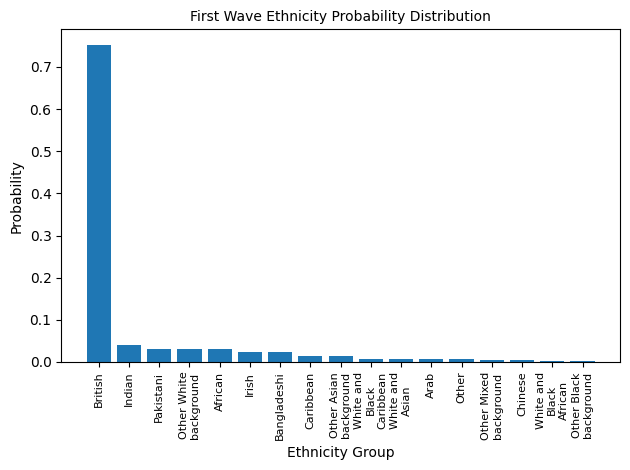

In [80]:
visualise_ethnicity_probability_distribution_dict(first_wave_ethnicity_probability_distribution_dict, 1)

###### Wave 2 Visualisations

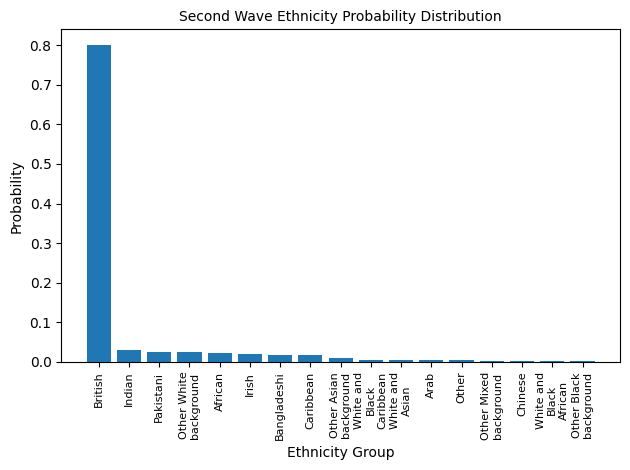

In [81]:
visualise_ethnicity_probability_distribution_dict(second_wave_ethnicity_probability_distribution_dict, 2)

###### Wave 3 Visualisations

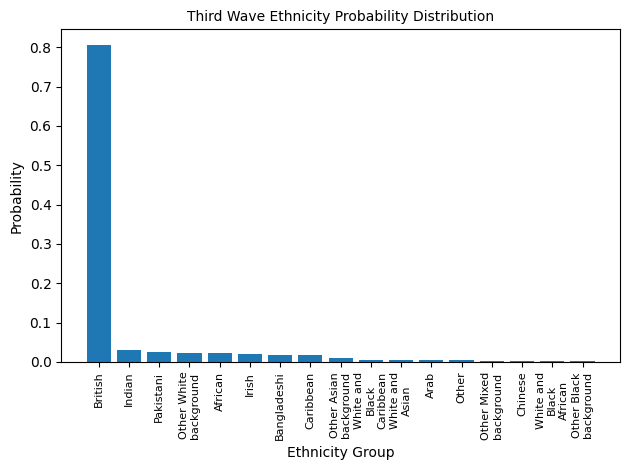

In [82]:
visualise_ethnicity_probability_distribution_dict(third_wave_ethnicity_probability_distribution_dict, 3)

###### Wave 4 Visualisations

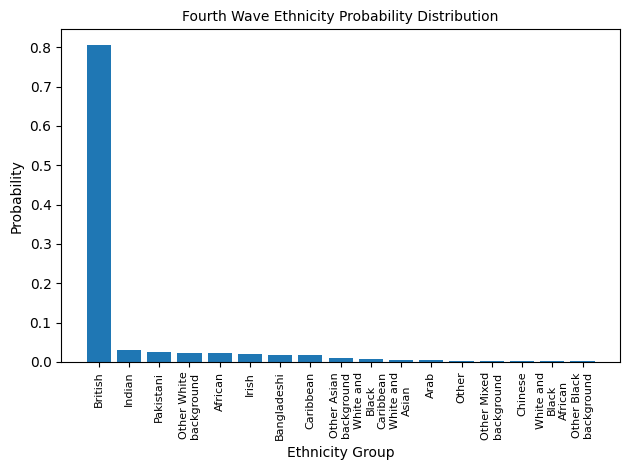

In [83]:
# Display for wave 4
visualise_ethnicity_probability_distribution_dict(fourth_wave_ethnicity_probability_distribution_dict, 4)

###### Wave 5 Visualisations

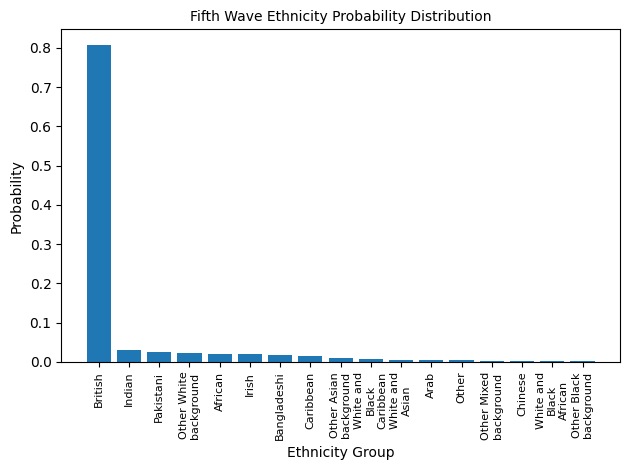

In [84]:
# Display for wave 5
visualise_ethnicity_probability_distribution_dict(fifth_wave_ethnicity_probability_distribution_dict, 5)


###### Wave 6 Visualisations

In [85]:

# Display for wave 6
visualise_ethnicity_probability_distribution_dict(sixth_wave_ethnicity_probability_distribution_dict, 6)


###### Wave 7 Visualisations

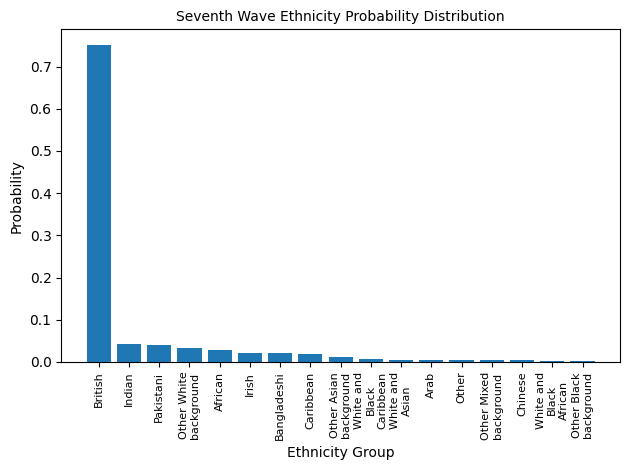

In [86]:

# Display for wave 7
visualise_ethnicity_probability_distribution_dict(seventh_wave_ethnicity_probability_distribution_dict, 7)


###### Wave 8 Visualisations

In [87]:

# Display for wave 8
visualise_ethnicity_probability_distribution_dict(eighth_wave_ethnicity_probability_distribution_dict, 8)


###### Wave 9 Visualisations

In [88]:

# Display for wave 9
visualise_ethnicity_probability_distribution_dict(ninth_wave_ethnicity_probability_distribution_dict, 9)


###### Wave 10 Visualisations

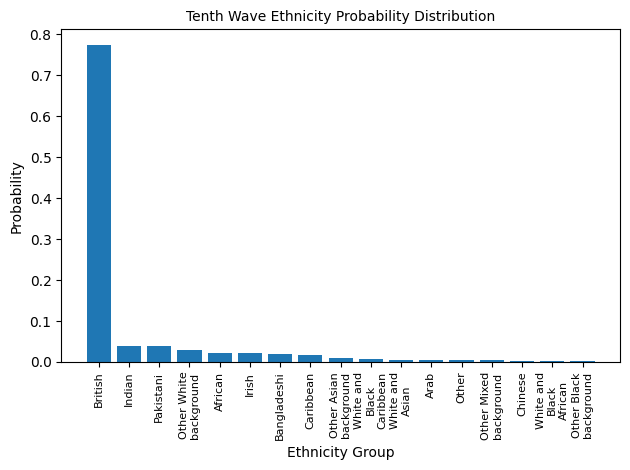

In [89]:

# Display for wave 10
visualise_ethnicity_probability_distribution_dict(tenth_wave_ethnicity_probability_distribution_dict, 10)


###### Wave 11 Visualisations

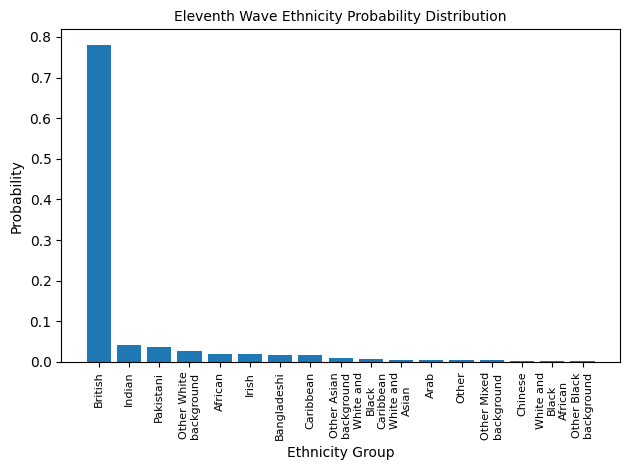

In [90]:

# Display for wave 11
visualise_ethnicity_probability_distribution_dict(eleventh_wave_ethnicity_probability_distribution_dict, 11)


###### Wave 12 Visualisations

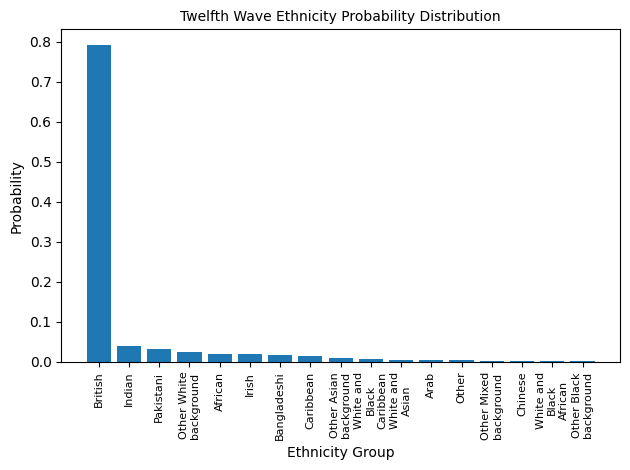

In [91]:

# Display for wave 12
visualise_ethnicity_probability_distribution_dict(twelfth_wave_ethnicity_probability_distribution_dict, 12)


###### Wave 13 Visualisations

In [92]:

# Display for wave 13
visualise_ethnicity_probability_distribution_dict(thirteenth_wave_ethnicity_probability_distribution_dict, 13)

###### Average Wave Visualisation

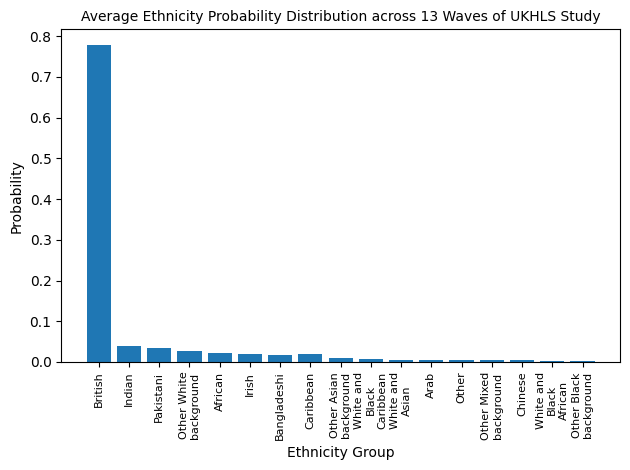

In [93]:
visualise_ethnicity_probability_distribution_dict(average_ethnicity_probability_distribution_dict, 14)

#### Current Job

##### Probability Distribution Generation

In [94]:
# initialise two lists to store the variable names and their corresponding UKHLS files. 
variable_names = ["a_jbnssec_dv", "b_jbnssec_dv", "c_jbnssec_dv", "d_jbnssec_dv", "e_jbnssec_dv", "f_jbnssec_dv", "g_jbnssec_dv", "h_jbnssec_dv", "i_jbnssec_dv", "j_jbnssec_dv", "k_jbnssec_dv", "l_jbnssec_dv", "m_jbnssec_dv"]

ukhls_indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, eighth_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp, thirteenth_wave_ukhls_indresp]

In [95]:
current_job_variable_name = "a_jbnssec_dv" # initialises the variable name storing the information about the respondent's current job. 

def generate_current_job_distribution(dataframe, column_name):
    """
    Generate the probability distribution of current job labels based on a specified column in a dataframe.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe containing the data.
    column_name (str): The name of the column in the dataframe representing the current job labels.

    Returns:
    dict: A dictionary representing the probability distribution of current job labels, where the keys are the labels and the values are the probabilities.
    """

    # remove the values -9 from the dataframe
    dataframe = dataframe[dataframe[column_name] > 0]

    # Define the mapping dictionary for the current job
    # current_job_dict = {
    #     1: 'Employers in Large Establishments',
    #     2: 'Higher managerial and admin. occupations',
    #     3: 'Higher professional traditional employee',
    #     4: 'Higher professional new employee',
    #     5: 'Higher professional traditional self-employed',
    #     6: 'Higher professional new self-employed',
    #     7: 'Lower professional or higher technical traditional employees',
    #     8: 'Lower professional or higher technical new employees',
    #     9: 'Lower professional or higher technical traditional self-employed',
    #     10: 'Lower professional or higher technical new self-employed',
    #     11: 'Lower managerial and admin. occupations',
    #     12: 'Higher supervisory occupations',
    #     13: 'Intermediate clerical and admin. occupations', 
    #     14: 'Intermediate sales and service occupations',
    #     15: 'Intermediate technical and auxiliary occupations',
    #     16: 'Intermediate engineering occupations',
    #     17: 'Employers, small estab. (excl. agriculture)',
    #     18: 'Employers, small estab. (agriculture)',
    #     19: 'Own account workers (non-professional)',
    #     20: 'Own account workers (agriculture)',
    #     21: 'Lower supervisory occupations',
    #     22: 'Lower technical craft occupations',
    #     23: 'Lower technical process operative occupations',
    #     24: 'Semi-routine sales operations',
    #     25: 'Semi-routine service occupations',
    #     26: 'Semi-routine technical occupations',
    #     27: 'Semi-routine operative occupations',
    #     28: 'Semi-routine agricultural occupations',
    #     29: 'Semi-routine clerical occupations', 
    #     30: 'Semi-routine childcare occupations',
    #     31: 'Routine sales and service occupations',
    #     32: 'Routine production occupations',
    #     33: 'Routine technical occupations',
    #     34: 'Routine operative occupations',
    #     35: 'Routine agricultural occupations'
    # }

    current_job_dict = {
        1: 'Large Establishments',
        2: 'Higher Managerial and Administrative',
        3: 'Higher Professional',
        4: 'Higher Professional',
        5: 'Higher Professional',
        6: 'Higher Professional',
        7: 'Lower Professional and Technical',
        8: 'Lower Professional and Technical',
        9: 'Lower Professional and Technical',
        10: 'Lower Professional and Technical',
        11: 'Lower Managerial and Supervisory',
        12: 'Lower Managerial and Supervisory',
        13: 'Intermediate Occupations',
        14: 'Intermediate Occupations',
        15: 'Intermediate Occupations',
        16: 'Intermediate Occupations',
        17: 'Small Establishments and Own Account Workers',
        18: 'Small Establishments and Own Account Workers',
        19: 'Small Establishments and Own Account Workers',
        20: 'Small Establishments and Own Account Workers',
        21: 'Lower Supervisory and Technical',
        22: 'Lower Supervisory and Technical',
        23: 'Lower Supervisory and Technical',
        24: 'Semi-Routine Occupations',
        25: 'Semi-Routine Occupations',
        26: 'Semi-Routine Occupations',
        27: 'Semi-Routine Occupations',
        28: 'Semi-Routine Occupations',
        29: 'Semi-Routine Occupations',
        30: 'Semi-Routine Occupations',
        31: 'Routine Occupations',
        32: 'Routine Occupations',
        33: 'Routine Occupations',
        34: 'Routine Occupations',
        35: 'Routine Occupations'
    }

    # Load the specified variable from the dataframe
    current_job_dv = dataframe[column_name]
    
    # Map the numeric codes to descriptive labels using the dictionary
    current_job_labels = current_job_dv.map(current_job_dict)

    # Calculate the probability distribution of the current job labels
    current_job_probability_distribution = current_job_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    current_job_probability_distribution_dict = current_job_probability_distribution.to_dict()

    return current_job_probability_distribution_dict

current_job_probability_distribution_dict = generate_current_job_distribution(first_wave_ukhls_indresp, current_job_variable_name)

# display the current_job_probability_distribution_dict
print(current_job_probability_distribution_dict)

{'Semi-Routine Occupations': 0.1818893156921326, 'Lower Professional and Technical': 0.17338881775501494, 'Intermediate Occupations': 0.1371461089770949, 'Routine Occupations': 0.10271731398491962, 'Small Establishments and Own Account Workers': 0.09926732109830701, 'Lower Managerial and Supervisory': 0.09788021055626689, 'Higher Professional': 0.08479157774932423, 'Lower Supervisory and Technical': 0.07582870963152653, 'Higher Managerial and Administrative': 0.04566794707639778, 'Large Establishments': 0.0014226774790155072}


In [96]:
current_job_probability_distribution_dicts = [] # initialise a list to store the current job probability distributions for each wave.

# iterate through the variable names and the UKHLS indresp files. 
for i in range(len(variable_names)):
    current_job_probability_distribution_dict = generate_current_job_distribution(ukhls_indresp_data[i], variable_names[i])
    current_job_probability_distribution_dicts.append(current_job_probability_distribution_dict) # append the current job probability distribution to the list.

##### Visualise Probability Distributions

In [97]:
def visualise_current_job_probability_distribution(current_job_probability_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the current job in the UKHLS data.
    Parameters:
    •	‘current_job_probability_distribution_dict’ (dict): the probability distribution of the current job in the UKHLS data.
    •   'wave_number' (int): the wave number of the UKHLS data.
    """
    # determine the list of occupations from the current job probability distribution dictionary
    occupation_headings = list(current_job_probability_distribution_dict.keys())

    # create an integer list from 1 to n corresponding to the occupation headings list where n is the size of the occupation headings list. 
    occupation_heading_indexes = list(range(len(occupation_headings)))

    print(occupation_heading_indexes)

    print(occupation_headings)

    plt.bar(current_job_probability_distribution_dict.keys(), current_job_probability_distribution_dict.values())

    if wave_number != 14:
        image_title = f"Current Job Probability Distribution Wave {wave_number}" # initialise the title of the image based on the wave number.

        file_directory = f"Figures/Profiling-Variables/Current Job/{image_title}.png"
    else:
        image_title = "Average Current Job Probability Distribution"

        file_directory = f"Figures/Profiling-Variables/Current Job/{image_title}.png"

    # qualification_order = ['\n'.join(wrap(l, 12)) for l in qualification_order]

    occupation_headings_order = ['\n'.join(wrap(l, 12)) for l in occupation_headings]

    # plt.xticks(qualificiation_order_indexes, qualification_order, rotation=90, fontsize=8)

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(occupation_heading_indexes, occupation_headings_order, rotation=90, fontsize=8)
    plt.xlabel('Current Job')
    plt.ylabel('Probability')
    plt.title(image_title, fontsize=10)
    # Save the figure with sufficient size to fit the x-axis labels
    plt.savefig(file_directory, bbox_inches='tight')
    plt.show()

visualise_current_job_probability_distribution(current_job_probability_distribution_dict, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Routine Occupations', 'Lower Managerial and Supervisory', 'Higher Professional', 'Small Establishments and Own Account Workers', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Semi-Routine Occupations', 'Lower Professional and Technical', 'Intermediate Occupations', 'Routine Occupations', 'Small Establishments and Own Account Workers', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Semi-Routine Occupations', 'Lower Professional and Technical', 'Intermediate Occupations', 'Routine Occupations', 'Small Establishments and Own Account Workers', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


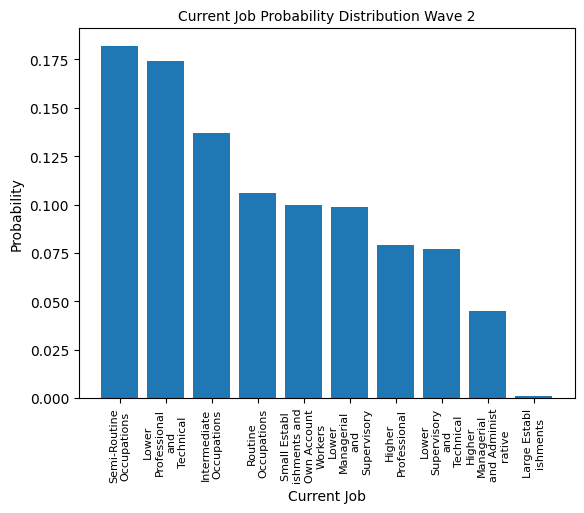

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Semi-Routine Occupations', 'Lower Professional and Technical', 'Intermediate Occupations', 'Routine Occupations', 'Small Establishments and Own Account Workers', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


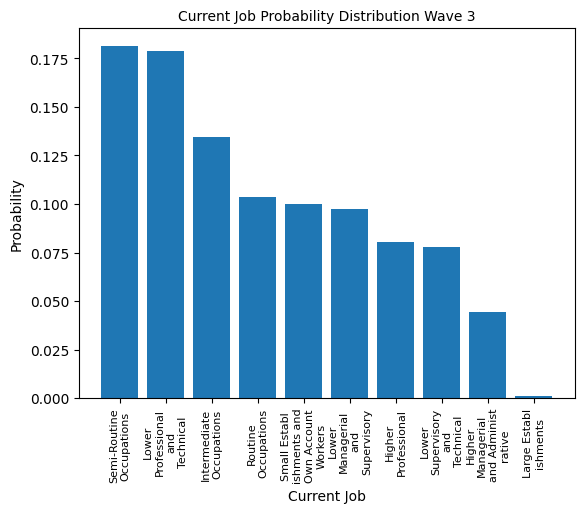

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Semi-Routine Occupations', 'Lower Professional and Technical', 'Intermediate Occupations', 'Small Establishments and Own Account Workers', 'Routine Occupations', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


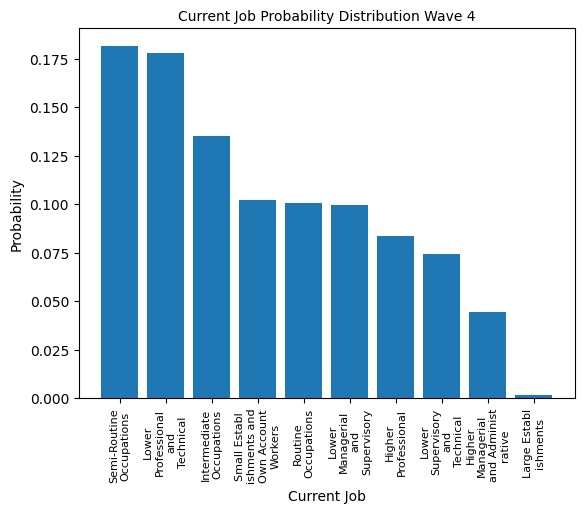

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Semi-Routine Occupations', 'Lower Professional and Technical', 'Intermediate Occupations', 'Small Establishments and Own Account Workers', 'Routine Occupations', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


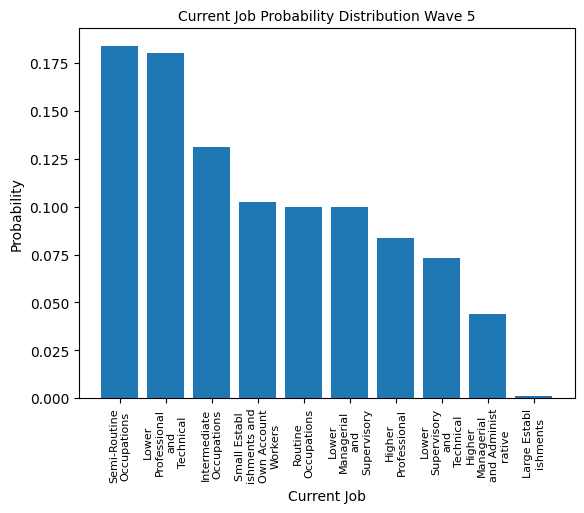

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Small Establishments and Own Account Workers', 'Routine Occupations', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


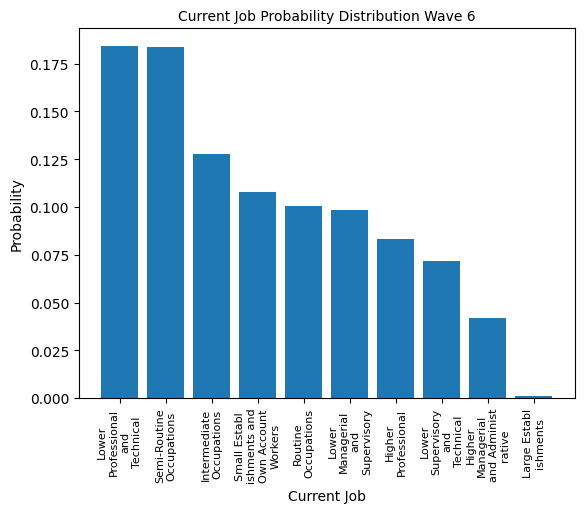

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Small Establishments and Own Account Workers', 'Lower Managerial and Supervisory', 'Routine Occupations', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


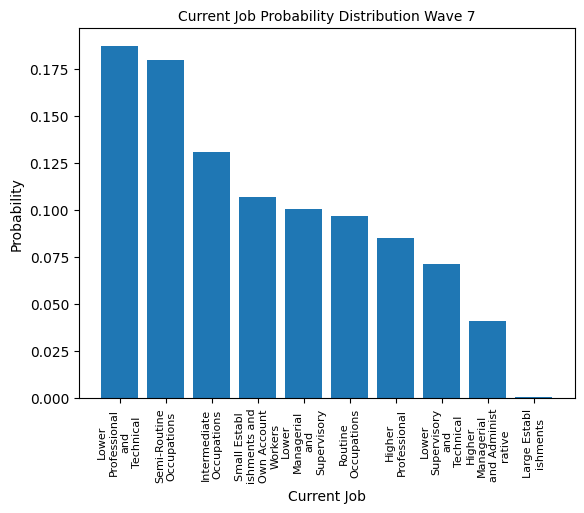

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Small Establishments and Own Account Workers', 'Lower Managerial and Supervisory', 'Routine Occupations', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


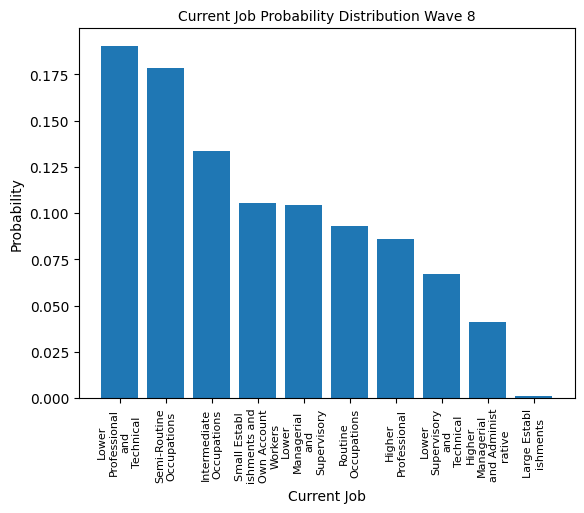

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Lower Managerial and Supervisory', 'Small Establishments and Own Account Workers', 'Routine Occupations', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


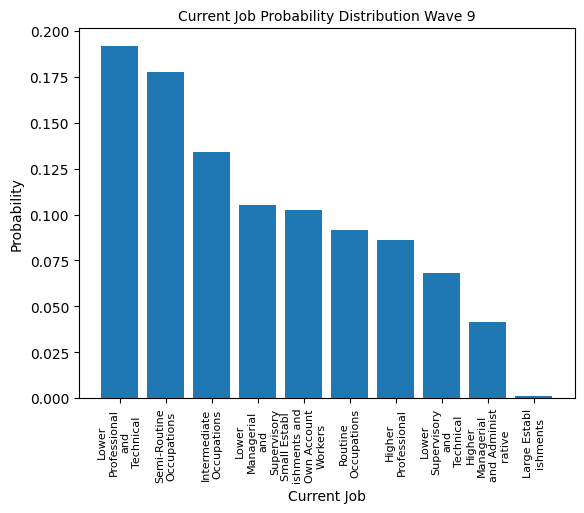

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Lower Managerial and Supervisory', 'Small Establishments and Own Account Workers', 'Routine Occupations', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


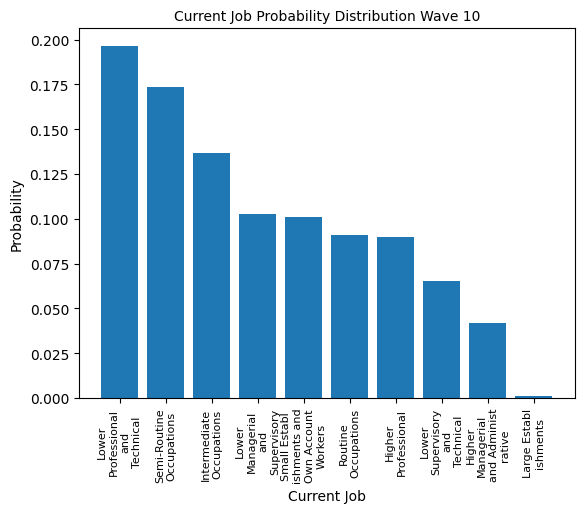

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Lower Managerial and Supervisory', 'Small Establishments and Own Account Workers', 'Higher Professional', 'Routine Occupations', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


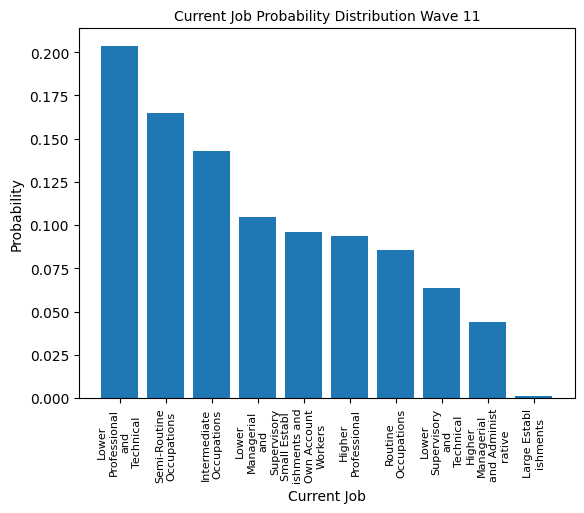

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Lower Managerial and Supervisory', 'Higher Professional', 'Small Establishments and Own Account Workers', 'Routine Occupations', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


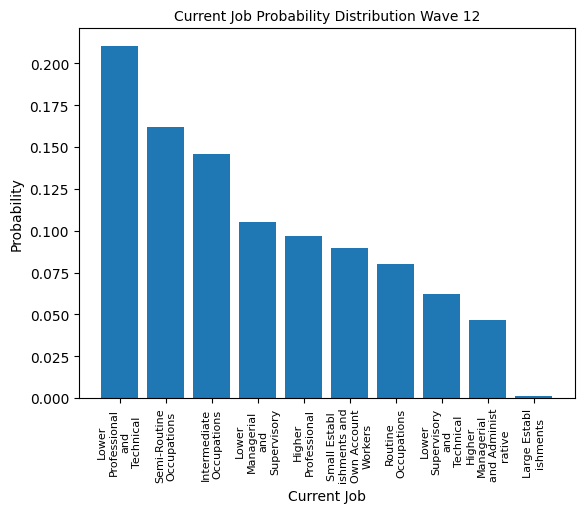

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Lower Professional and Technical', 'Semi-Routine Occupations', 'Intermediate Occupations', 'Routine Occupations', 'Lower Managerial and Supervisory', 'Higher Professional', 'Small Establishments and Own Account Workers', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


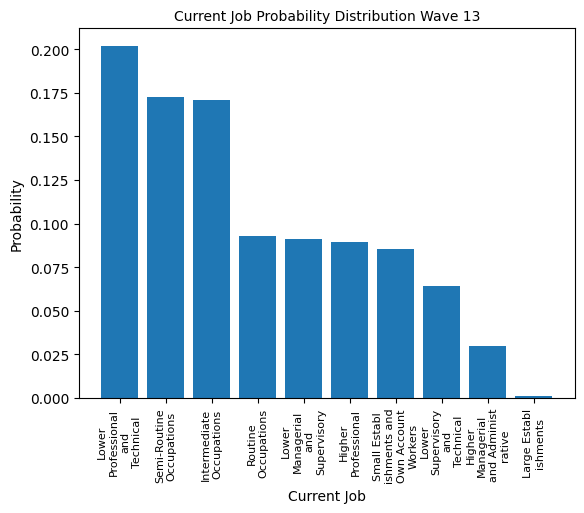

In [98]:
for i in range(len(current_job_probability_distribution_dicts)):
    visualise_current_job_probability_distribution(current_job_probability_distribution_dicts[i], i + 1)

In [99]:
# calculate average job probability distribution across 13 waves of UKHLS studies. 
average_current_job_probability_distribution_dict = calculate_average_probability_distribution(current_job_probability_distribution_dicts)

print(average_current_job_probability_distribution_dict)

{'Semi-Routine Occupations': 0.17715811837554823, 'Lower Professional and Technical': 0.18847725454477793, 'Intermediate Occupations': 0.13829462867142078, 'Routine Occupations': 0.095660899568721, 'Small Establishments and Own Account Workers': 0.0999241594231392, 'Lower Managerial and Supervisory': 0.10041475573294868, 'Higher Professional': 0.08625719808673783, 'Lower Supervisory and Technical': 0.07012564047598402, 'Higher Managerial and Administrative': 0.04251446794890352, 'Large Establishments': 0.0011728771718188028}


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['Semi-Routine Occupations', 'Lower Professional and Technical', 'Intermediate Occupations', 'Routine Occupations', 'Small Establishments and Own Account Workers', 'Lower Managerial and Supervisory', 'Higher Professional', 'Lower Supervisory and Technical', 'Higher Managerial and Administrative', 'Large Establishments']


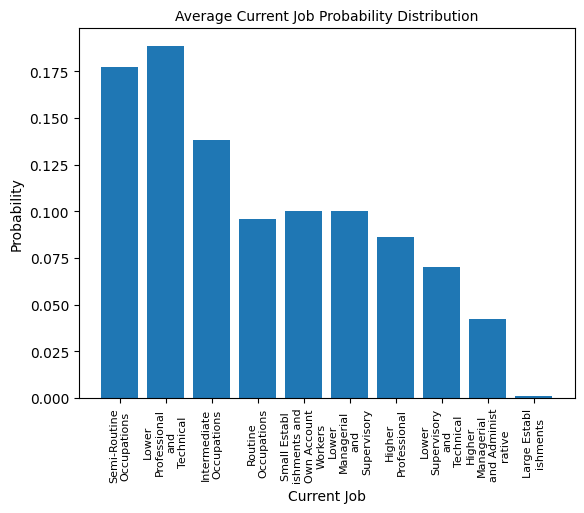

In [100]:
visualise_current_job_probability_distribution(average_current_job_probability_distribution_dict, 14)

#### Gender

##### Probability Distribution Generation

In [101]:
gender_variable_name = "a_sex"

def generate_gender_distribution(dataframe, column_name):
    """
    Generate the gender distribution from a given dataframe and column name.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column representing gender.

    Returns:
    dict: A dictionary representing the gender distribution, where the keys are the gender labels and the values are the corresponding probabilities.
    """

    # remove the values -9 from the dataframe
    dataframe = dataframe[dataframe[column_name] > 0]

    # Define the mapping dictionary
    gender_mapping = {
        1: "Male",
        2: "Female"
    }

    # Load the specified variable from the dataframe
    gender_distribution = dataframe[column_name]

    # Map the numeric codes to descriptive labels using the dictionary
    gender_labels = gender_distribution.map(gender_mapping)

    # Calculate the probability distribution
    gender_probability_distribution = gender_labels.value_counts(normalize=True)

    gender_probability_distribution_dict = gender_probability_distribution.to_dict()

    return gender_probability_distribution_dict

gender_probability_distribution_dict = generate_gender_distribution(first_wave_ukhls_indall, gender_variable_name)

print(f"Gender distribution: {gender_probability_distribution_dict}")

Gender distribution: {'Female': 0.5150758643883636, 'Male': 0.48492413561163644}


In [102]:
gender_variables = ["a_sex", "b_sex", "c_sex", "d_sex", "e_sex", "f_sex", "g_sex", "h_sex", "i_sex", "j_sex", "k_sex", "l_sex"] # initialise a list to store the gender variables.

ukhls_indall_data = [first_wave_ukhls_indall, second_wave_ukhls_indall, third_wave_ukhls_indall, fourth_wave_ukhls_indall, fifth_wave_ukhls_indall, sixth_wave_ukhls_indall, seventh_wave_ukhls_indall, eighth_wave_ukhls_indall, ninth_wave_ukhls_indall, tenth_wave_ukhls_indall, eleventh_wave_ukhls_indall, twelfth_wave_ukhls_indall] # initialise a list to store the UKHLS data

In [103]:
gender_probability_distribution_dicts = [] # initialise a list

for i in range(len(gender_variables)):
    gender_probability_distribution_dicts.append(generate_gender_distribution(ukhls_indall_data[i], gender_variables[i]))

##### Visualise Probability Distributions

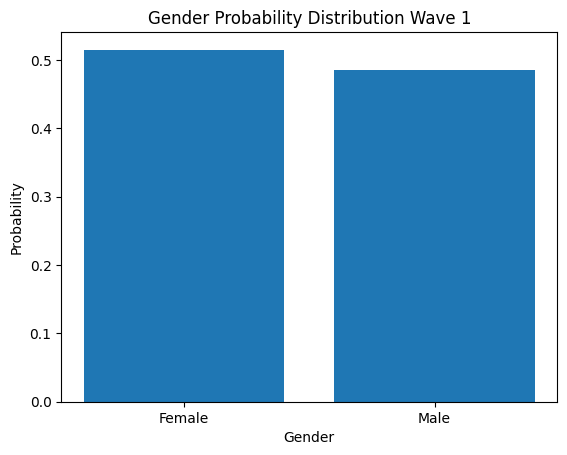

In [104]:
def visualise_gender_probability_distribution(gender_probability_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the gender data. 

    Parameters:
    •	‘gender_probability_distribution_dict’ (dict): the probability distribution of the gender data.
    •	‘wave_number’ (int): the wave number of the UKHLS data.

    Returns:
    •	A bar chart visualising the probability distribution of the gender data.
    """

    plt.bar(gender_probability_distribution_dict.keys(), gender_probability_distribution_dict.values())

    plt.xlabel('Gender')
    plt.ylabel('Probability')

    if wave_number == 14:
        graph_title = "Average Gender Probability Distribution"
    else:
        graph_title = f"Gender Probability Distribution Wave {wave_number}"

    plt.title(graph_title)

    plt.savefig(f"Figures/Profiling-Variables/Gender/{graph_title}.png")

    plt.show()

visualise_gender_probability_distribution(gender_probability_distribution_dict, 1)

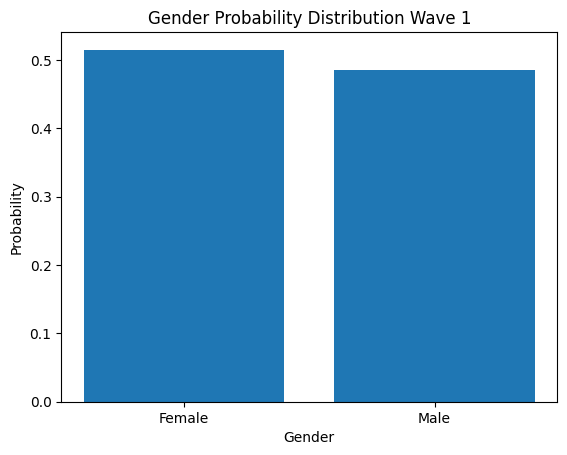

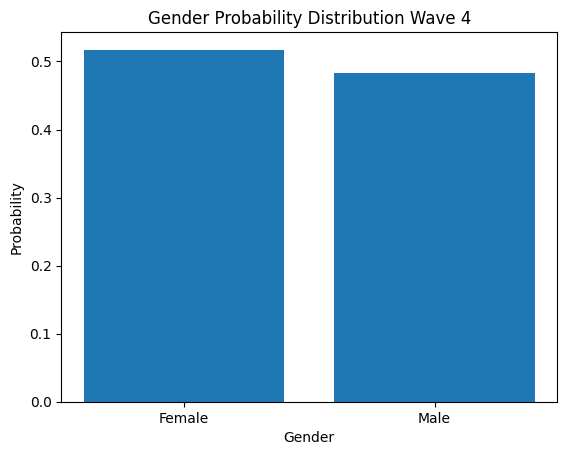

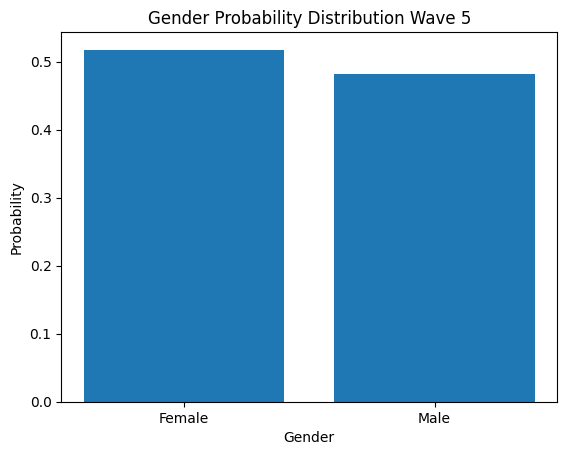

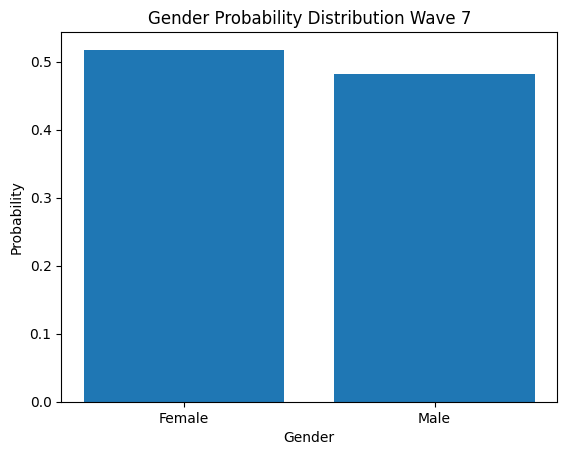

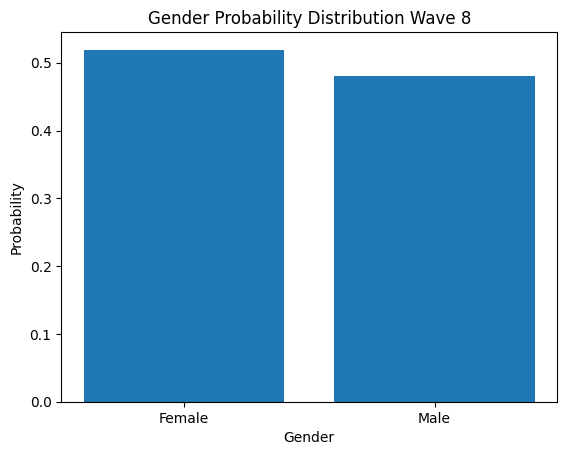

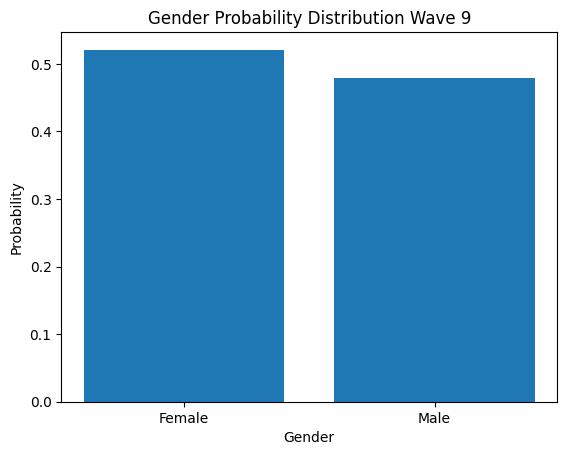

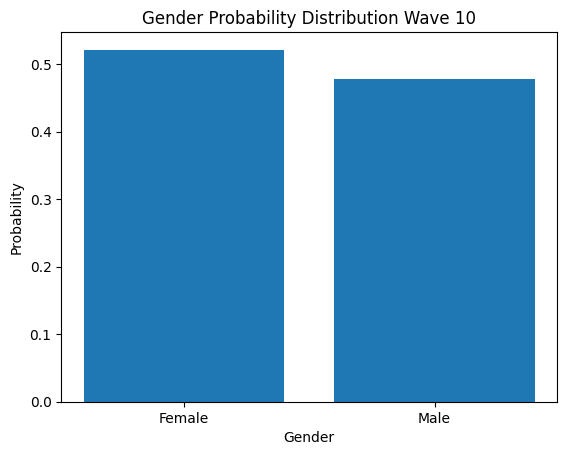

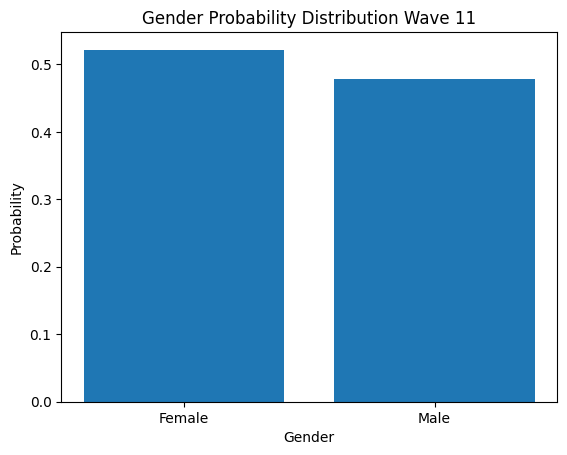

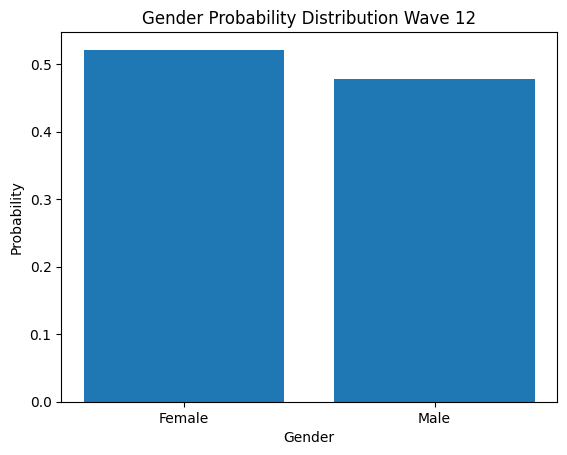

In [105]:
for i in range(0, 12):
    visualise_gender_probability_distribution(gender_probability_distribution_dicts[i], i + 1)

In [106]:
# calculate the average gender probability distribution across 12 UKHLS waves. 
average_gender_probability_distribution_dict = calculate_average_probability_distribution(gender_probability_distribution_dicts)

print(average_gender_probability_distribution_dict)

{'Female': 0.5186030526054286, 'Male': 0.48139694739457145}


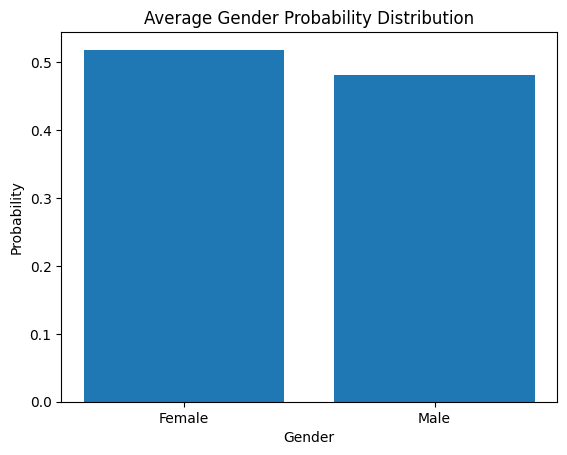

In [107]:
visualise_gender_probability_distribution(average_gender_probability_distribution_dict, 14)

#### Marital Status

##### Probability Distribution Generation

In [108]:
# initialise the variable name for marital status
marital_status_variable_name = "a_marstat"

def generate_marital_status(dataframe, column_name):
    """
    Generate a dictionary representing the probability distribution of marital status categories.

    Args:
        dataframe (pandas.DataFrame): The input dataframe containing the marital status data.
        column_name (str): The name of the column in the dataframe that contains the marital status values.

    Returns:
        dict: A dictionary representing the probability distribution of marital status categories, where the keys are the
        marital status categories and the values are the corresponding probabilities.

    Example:
        >>> dataframe = pd.DataFrame({'MaritalStatus': [1, 2, 2, 3, 3, 3, 4, 5, 5, 5]})
        >>> generate_marital_status(dataframe, 'MaritalStatus')
        {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.1, 5: 0.3}
    """
    # removes irrelevant data values
    dataframe = dataframe[dataframe[column_name] > 0]

    marital_mapping = {
        0: "Child under 16",
        1: "Single",
        2: "Married",
        3: "Partnership",
        4: "Separated",
        5: "Divorced",
        6: "Widowed",
        7: "Separated",
        8: "Widowed",
        9: "Widowed",
        10: "Partnership"
    }

    marital_distribution = dataframe[column_name]

    marital_labels = marital_distribution.map(marital_mapping)

    martial_probability_distribution = marital_labels.value_counts(normalize=True)

    martial_probability_distribution_dict = martial_probability_distribution.to_dict()

    return martial_probability_distribution_dict

martial_probability_distribution_dict = generate_marital_status(first_wave_ukhls_indall, marital_status_variable_name)

print(f"Marital Status Distribution: {martial_probability_distribution_dict}")


Marital Status Distribution: {'Married': 0.5015242618698735, 'Single': 0.3391103700335169, 'Divorced': 0.07756050730129857, 'Widowed': 0.05618715577787883, 'Separated': 0.023967123103094, 'Partnership': 0.0016505819143381672}


In [109]:
marital_status_variables = ["a_marstat", "b_marstat", "c_marstat", "d_marstat", "e_marstat", "f_marstat", "g_marstat", "h_marstat", "i_marstat", "j_marstat", "k_marstat", "l_marstat"] # initialise a list to store the marital status variables.

ukhls_indall_data = [first_wave_ukhls_indall, second_wave_ukhls_indall, third_wave_ukhls_indall, fourth_wave_ukhls_indall, fifth_wave_ukhls_indall, sixth_wave_ukhls_indall, seventh_wave_ukhls_indall, eighth_wave_ukhls_indall, ninth_wave_ukhls_indall, tenth_wave_ukhls_indall, eleventh_wave_ukhls_indall, twelfth_wave_ukhls_indall] # initialise a list to store the UKHLS data

In [110]:
marital_probability_dicts = [] # initialise a list
for i in range(12):
    marital_probability_distribution_dict = generate_marital_status(ukhls_indall_data[i], marital_status_variables[i])

    marital_probability_dicts.append(marital_probability_distribution_dict)

##### Visualise Probability Distribution

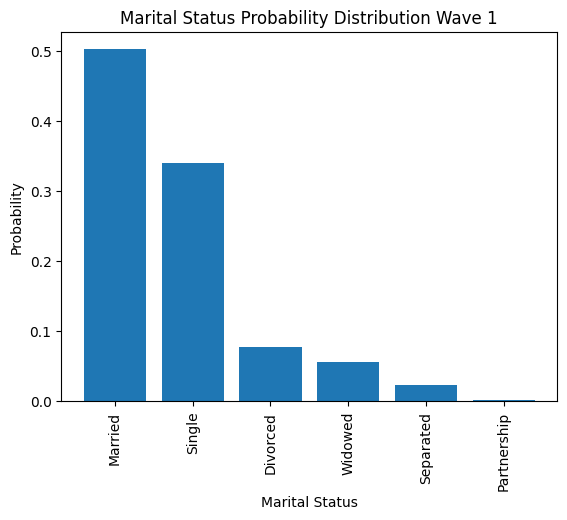

In [111]:
def visualise_marital_status_distribution(martial_probability_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the marital status data. 

    Parameters:
    •	‘martial_probability_distribution_dict’ (dict): the probability distribution of the marital status data.

    Returns:
    •	A bar chart visualising the probability distribution of the marital status data.
    """

    plt.bar(martial_probability_distribution_dict.keys(), martial_probability_distribution_dict.values())

    plt.xticks(rotation=90)
    plt.xlabel('Marital Status')
    plt.ylabel('Probability')

    if wave_number == 14:
        graph_title = "Average Marital Status Probability Distribution"
    else:
        graph_title = f"Marital Status Probability Distribution Wave {wave_number}"

    plt.title(graph_title)

    plt.savefig(f"Figures/Profiling-Variables/Marital Status/{graph_title}.png", bbox_inches='tight')

    plt.show()

visualise_marital_status_distribution(martial_probability_distribution_dict, 1)

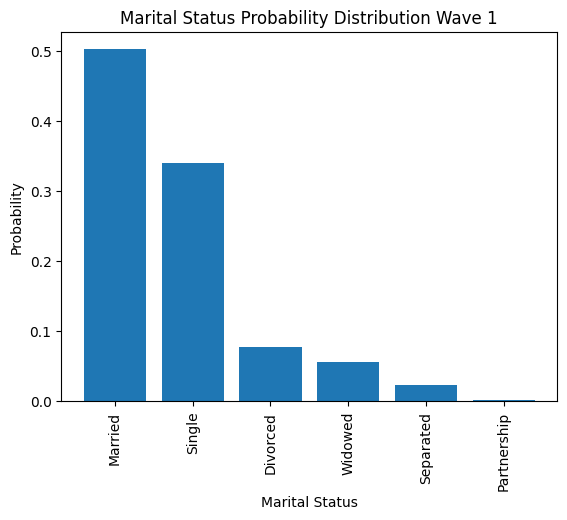

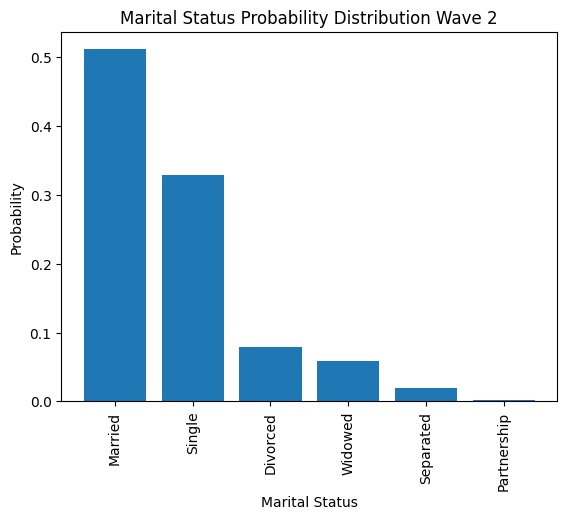

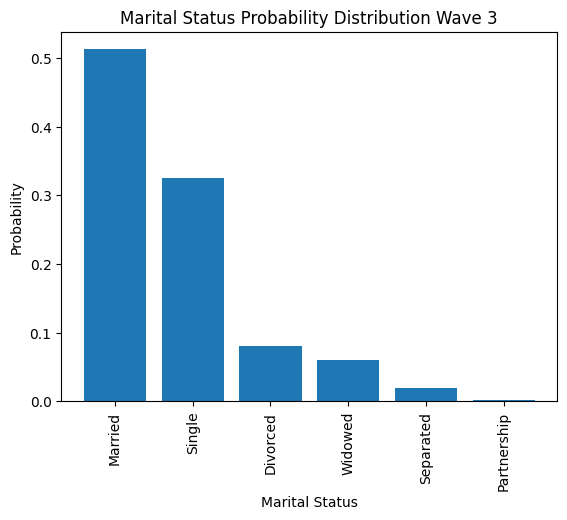

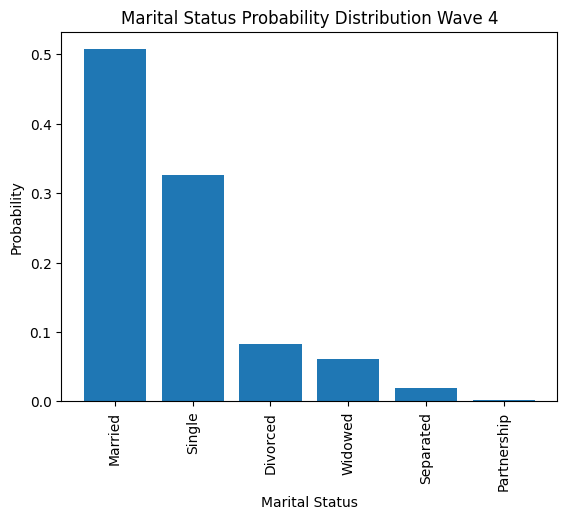

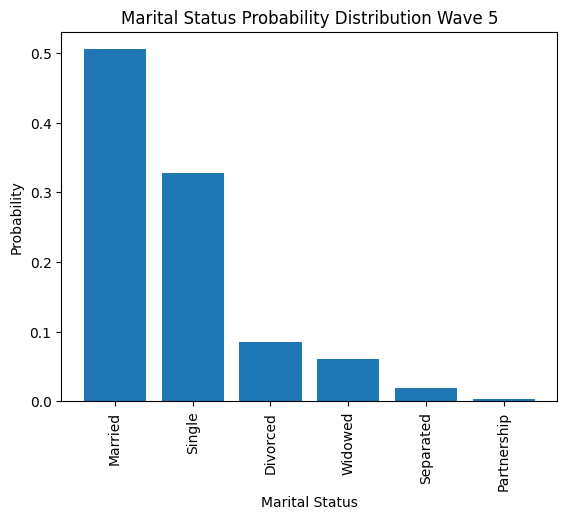

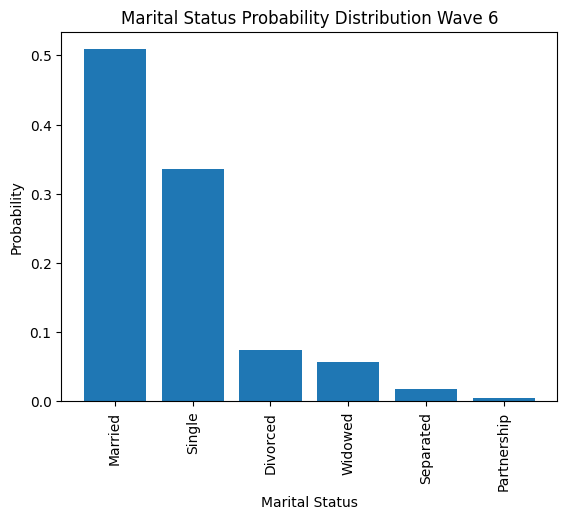

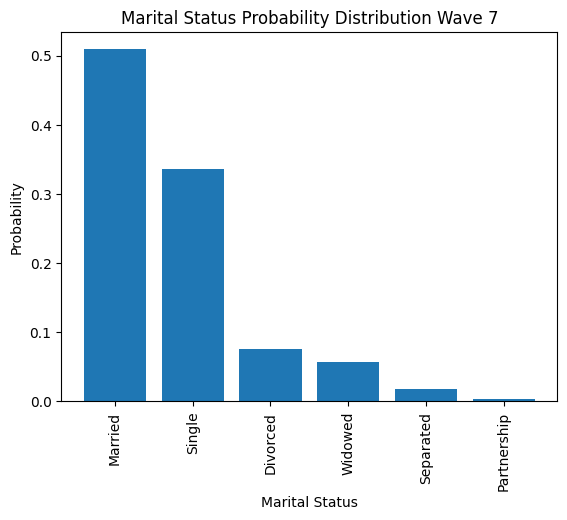

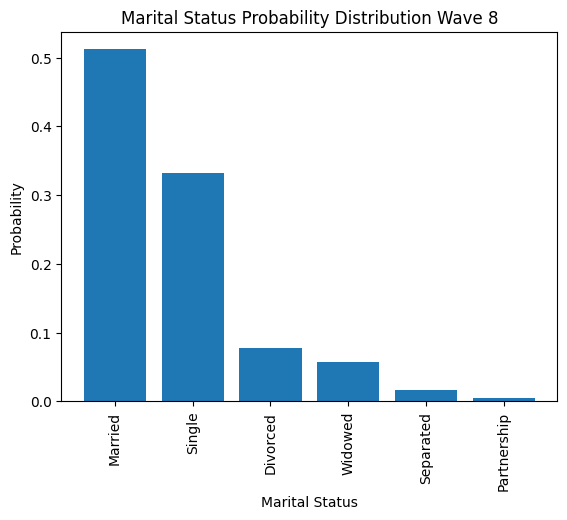

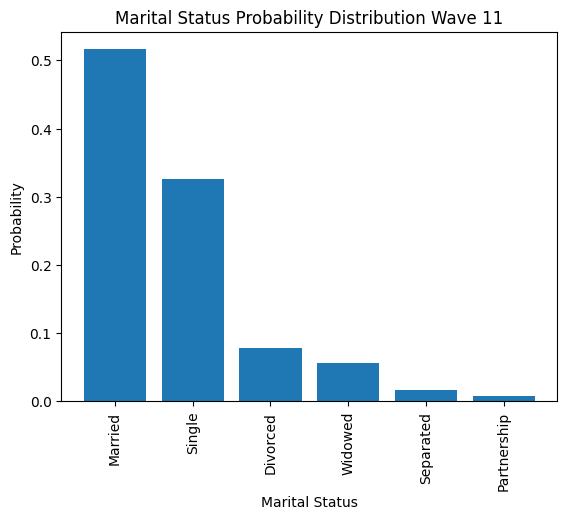

In [112]:
for i in range(12):
    visualise_marital_status_distribution(marital_probability_dicts[i], i + 1)

In [113]:
# calculate the average marital status probability distribution across 12 UKHLS waves. 
average_marital_status_probability_distribution_dict = calculate_average_probability_distribution(marital_probability_dicts)

print(average_marital_status_probability_distribution_dict)

{'Married': 0.5104395533407661, 'Single': 0.33007040253767245, 'Divorced': 0.07890125370974586, 'Widowed': 0.05795544165522712, 'Separated': 0.018103820040116042, 'Partnership': 0.004529528716472363}


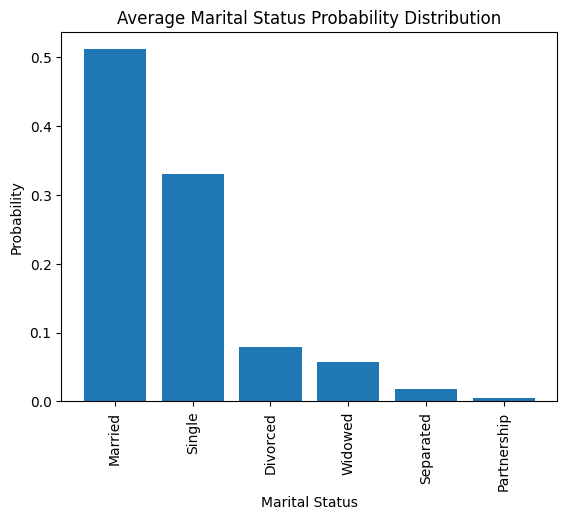

In [114]:
visualise_marital_status_distribution(average_marital_status_probability_distribution_dict, 14)

#### Residence (City, Metropolitan Region, etc)

##### Probability Distribution Generation

In [115]:
residence_variable_name = "a_urban_dv"

def generate_residence_distribution(dataframe, column_name):
    """
    Generate a residence distribution based on the given dataframe and column name.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe containing the residence data.
    column_name (str): The name of the column in the dataframe that represents residence.

    Returns:
    dict: A dictionary representing the residence probability distribution, where the keys are residence labels and the values are the corresponding probabilities.
    """

    # removes irrelevant data values
    dataframe = dataframe[dataframe[column_name] > 0]

    residence_mapping = {
        1: "Urban",
        2: "Rural"
    }

    residence_distribution = dataframe[column_name]

    residence_labels = residence_distribution.map(residence_mapping)

    residence_probability_distribution = residence_labels.value_counts(normalize=True)

    residence_probability_distribution_dict = residence_probability_distribution.to_dict()

    return residence_probability_distribution_dict

residence_probability_distribution_dict = generate_residence_distribution(first_wave_ukhls_indresp, residence_variable_name)

print(f"Residence Distribution: {residence_probability_distribution_dict}")

Residence Distribution: {'Urban': 0.793171745695572, 'Rural': 0.20682825430442797}


In [116]:
residence_variable_names = ["a_urban_dv", "b_urban_dv", "c_urban_dv", "d_urban_dv", "e_urban_dv", "f_urban_dv", "g_urban_dv", "h_urban_dv", "i_urban_dv", "j_urban_dv", "k_urban_dv", "l_urban_dv"] # initialise a list to store the residence variables.
ukhls_indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, eighth_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp] # initialise a list to store the UKHLS data

In [117]:
residence_probability_distribution_dicts = [] # initialise a list

for i in range(12):

    residence_probability_distribution_dicts.append(generate_residence_distribution(ukhls_indresp_data[i], residence_variable_names[i]))

##### Visualise Probability Distribution

In [118]:
def visualise_residence_distribution(residence_probability_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the residence data. 

    Parameters:
    •	‘residence_probability_distribution_dict’ (dict): the probability distribution of the residence data.

    Returns:
    •	A bar chart visualising the probability distribution of the residence data.
    """

    plt.bar(residence_probability_distribution_dict.keys(), residence_probability_distribution_dict.values())

    plt.xlabel('Residence')
    plt.ylabel('Probability')

    if wave_number == 14:
        graph_title = "Average Residence Probability Distribution"
    else:
        graph_title = f"Residence Probability Distribution Wave {wave_number}"

    plt.title(graph_title)

    plt.savefig(f"Figures/Profiling-Variables/Residence/{graph_title}.png")

    plt.show()

visualise_residence_distribution(residence_probability_distribution_dict, 1)

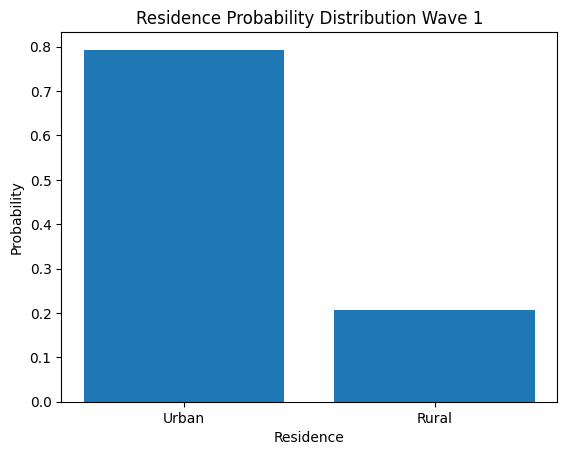

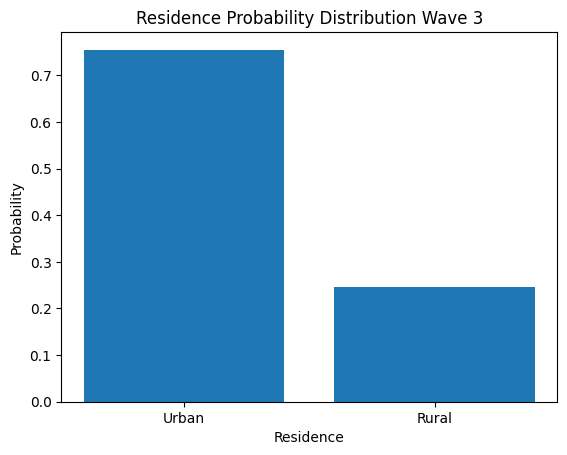

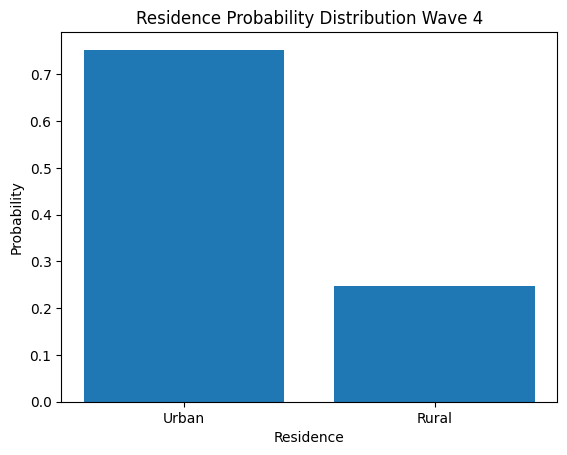

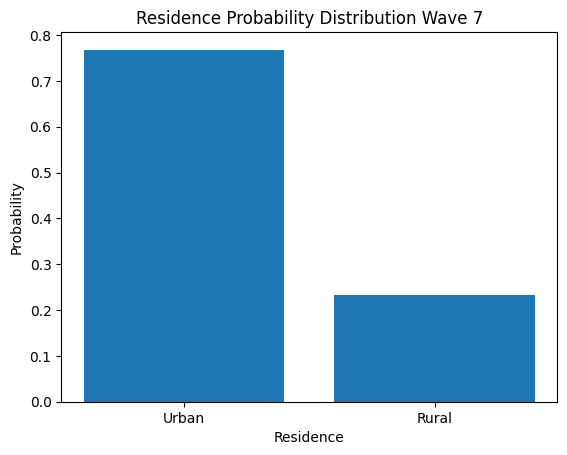

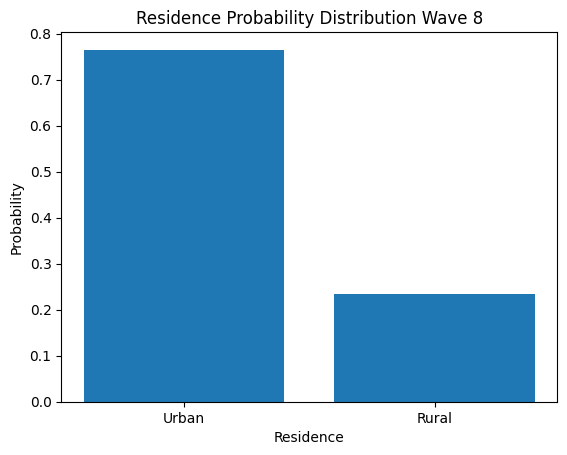

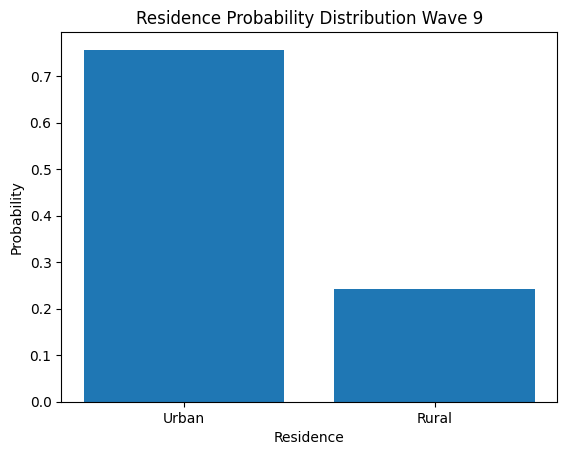

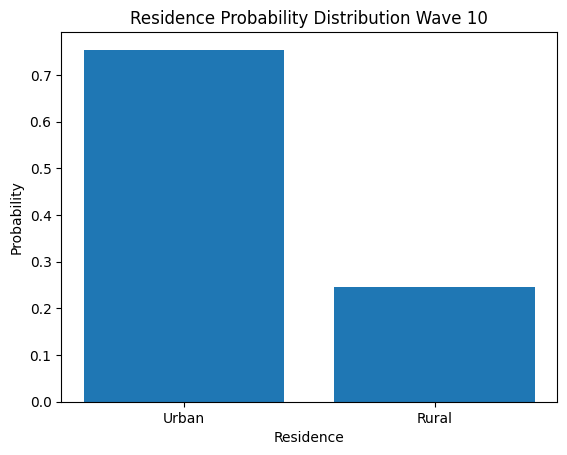

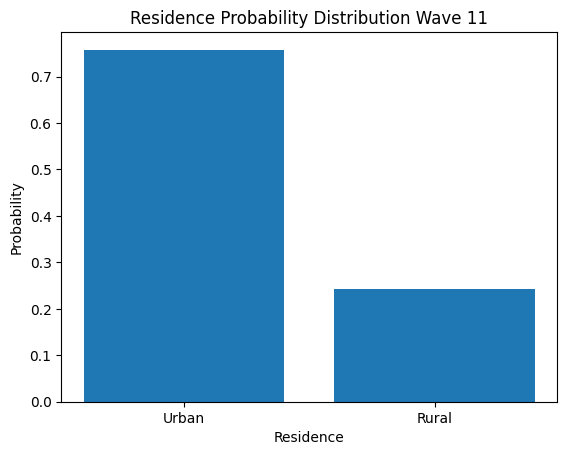

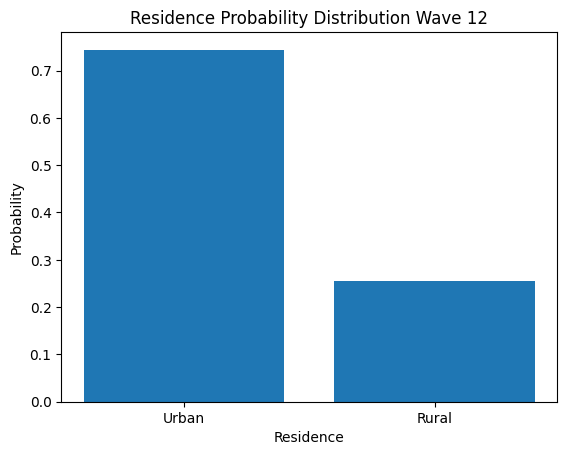

In [119]:
for i in range(12):

    visualise_residence_distribution(residence_probability_distribution_dicts[i], i + 1)

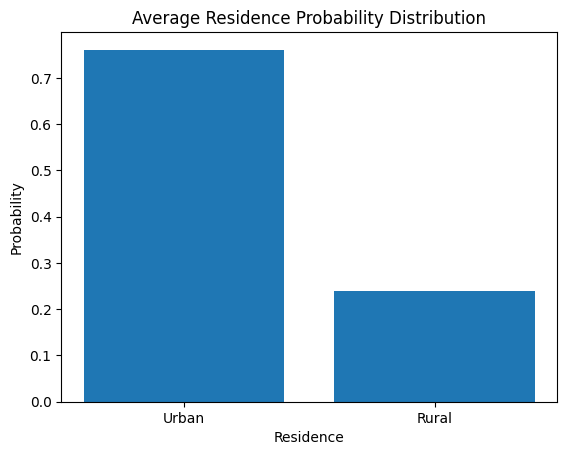

In [120]:
average_residence_probability_distribution_dict = calculate_average_probability_distribution(residence_probability_distribution_dicts)

visualise_residence_distribution(average_residence_probability_distribution_dict, 14)

#### Region

In [121]:
region_variable_names = ["a_gor_dv", "b_gor_dv", "c_gor_dv", "d_gor_dv", "e_gor_dv", "f_gor_dv", "g_gor_dv", "h_gor_dv", "i_gor_dv", "j_gor_dv", "k_gor_dv", "l_gor_dv", "m_gor_dv"] # initialise a list to store the region variables.
ukhls_indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, eighth_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp, thirteenth_wave_ukhls_indresp] # initialise a list to store the UKHLS data

##### Probability Distribution Generation

In [122]:
def generate_region_distribution(data, column_name):
    """
    Generate a dictionary representing the probability distribution of region categories.

    Args:
        data (pandas.DataFrame): The input dataframe containing the region data.
        column_name (str): The name of the column in the dataframe that represents region.

    Returns:
        dict: A dictionary representing the region probability distribution, where the keys are region labels and the values are the corresponding probabilities.
    """

    # removes irrelevant data values
    data = data[data[column_name] > 0]

    region_mapping = {
        1: "North East",
        2: "North West",
        3: "Yorkshire and the Humber",
        4: "East Midlands",
        5: "West Midlands",
        6: "East of England",
        7: "London",
        8: "South East",
        9: "South West",
        10: "Wales",
        11: "Scotland",
        12: "Northern Ireland"
    }

    region_distribution = data[column_name]

    region_labels = region_distribution.map(region_mapping)

    region_probability_distribution = region_labels.value_counts(normalize=True)

    region_probability_distribution_dict = region_probability_distribution.to_dict()

    return region_probability_distribution_dict

In [123]:
regional_distribution_dicts = []

for i in range(13):

    regional_distribution_dict = generate_region_distribution(ukhls_indresp_data[i], region_variable_names[i])

    regional_distribution_dicts.append(regional_distribution_dict)

In [124]:
average_regional_distribution_dict = calculate_average_probability_distribution(regional_distribution_dicts)

print(average_regional_distribution_dict)

{'London': 0.12907079481584255, 'South East': 0.11767321930177418, 'North West': 0.10016628800565927, 'West Midlands': 0.08356847503159273, 'East of England': 0.08443418876431916, 'Yorkshire and the Humber': 0.0844291476706504, 'South West': 0.07827806434920834, 'East Midlands': 0.07267622309379916, 'Scotland': 0.08346259098296484, 'Wales': 0.06657761578709781, 'Northern Ireland': 0.06352932045503647, 'North East': 0.03613407174205509}


##### Visualise Probability Distribution

In [125]:
def visualise_regional_distribution(regional_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the region data. 

    Parameters:
    •	‘regional_distribution_dict’ (dict): the probability distribution of the region data.

    Returns:
    •	A bar chart visualising the probability distribution of the region data.
    """

    regional_names = list(regional_distribution_dict.keys())

    plt.bar(regional_distribution_dict.keys(), regional_distribution_dict.values())

    plt.xlabel('Region')
    plt.ylabel('Probability')

    if wave_number == 14:
        graph_title = "Average Regional Probability Distribution"
    else:
        graph_title = f"Regional Probability Distribution Wave {wave_number}"

    regional_names = ['\n'.join(wrap(l, 12)) for l in regional_names]

    plt.xticks(list(range(0, len(regional_names))), regional_names, rotation=90, fontsize=8)

    plt.title(graph_title)

    plt.savefig(f"Figures/Profiling-Variables/Region/{graph_title}.png")

    plt.show()

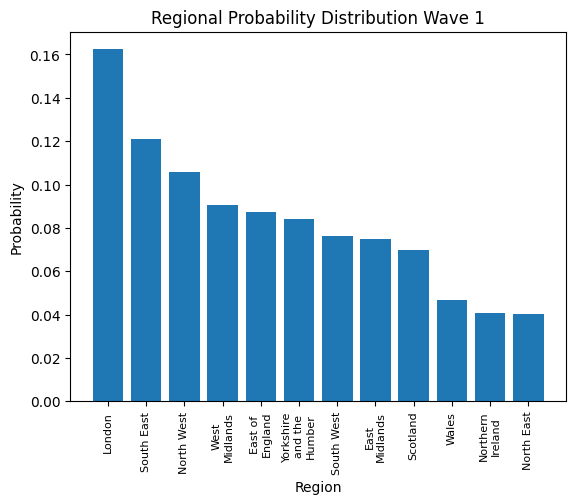

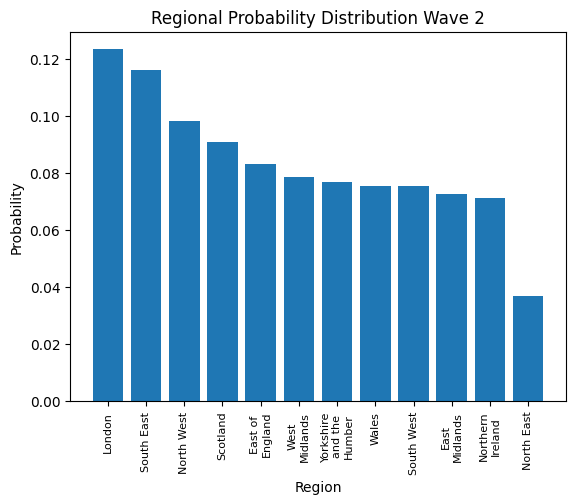

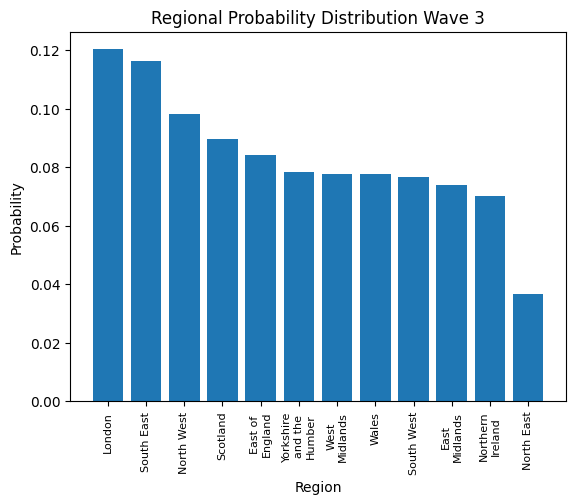

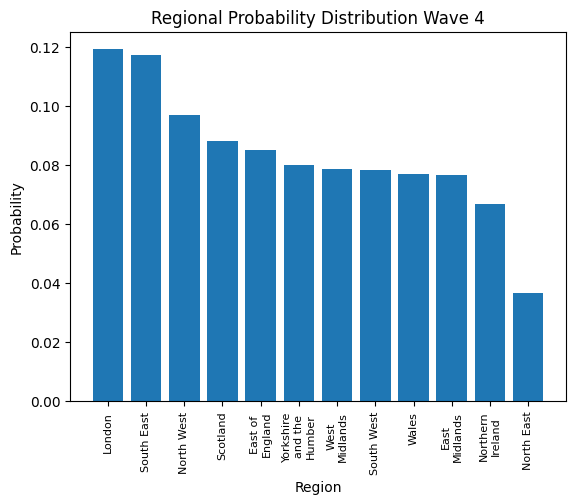

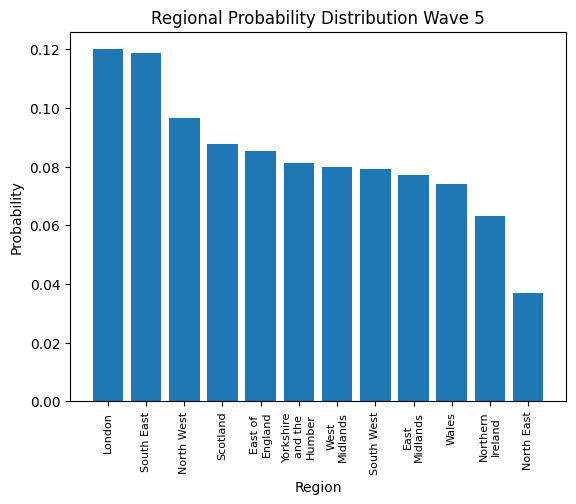

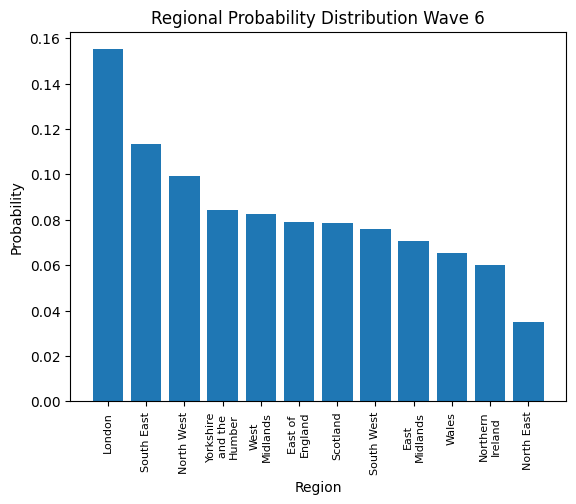

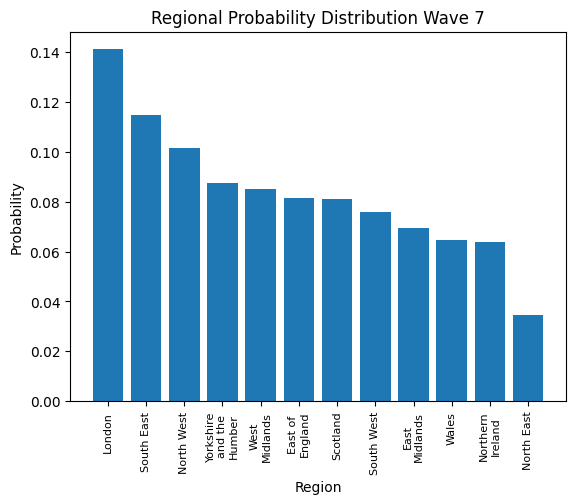

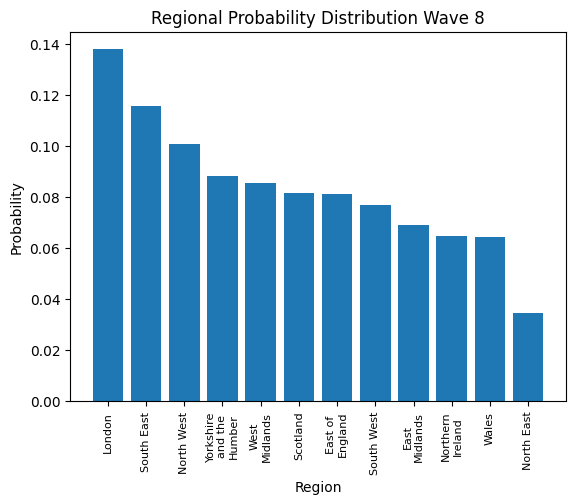

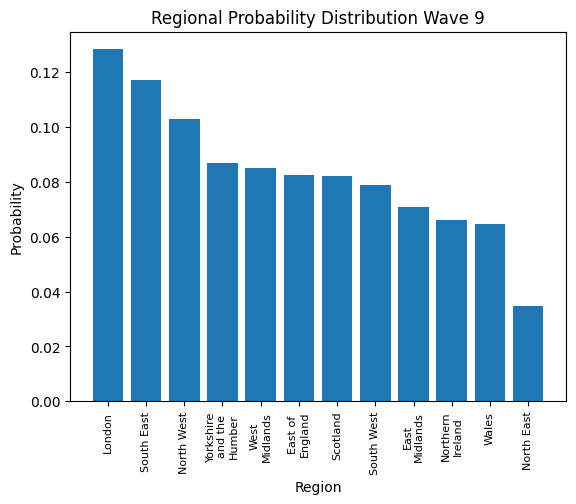

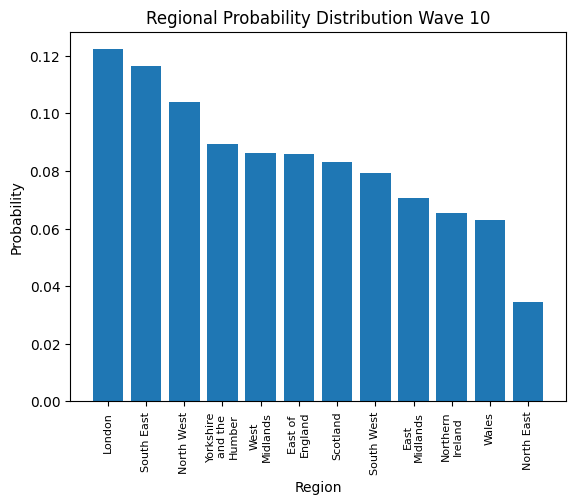

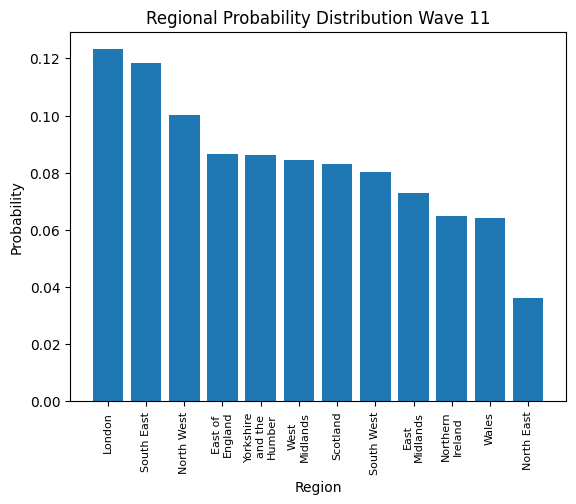

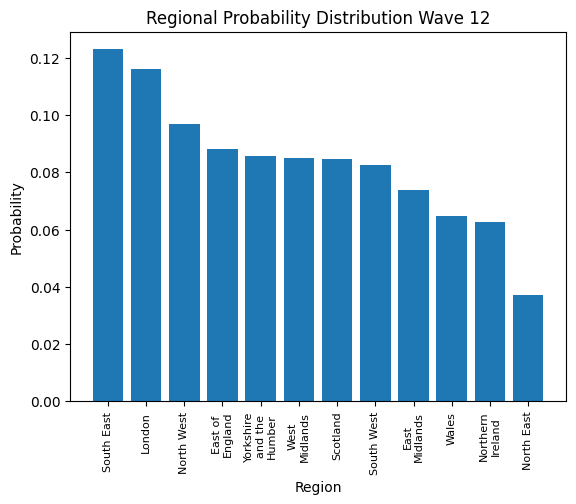

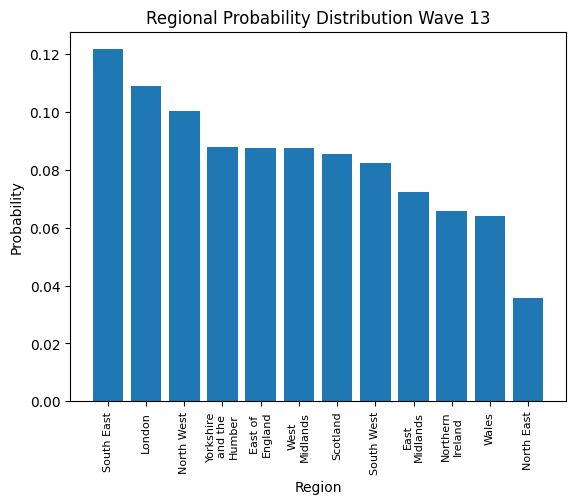

In [126]:
for i in range(13):

    visualise_regional_distribution(regional_distribution_dicts[i], i + 1)

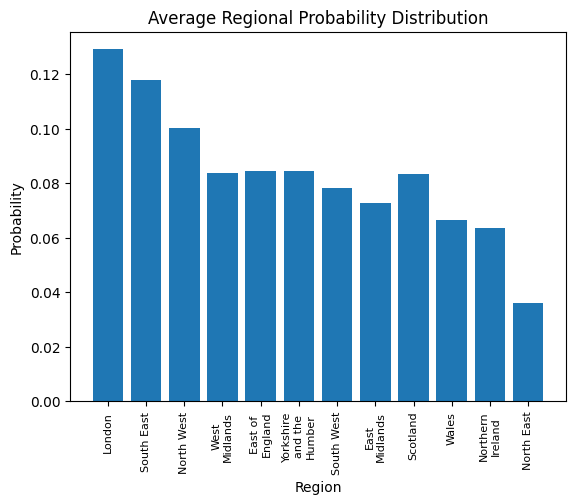

In [127]:
visualise_regional_distribution(average_regional_distribution_dict, 14)

#### Number of Children

##### Probability Distribution Generation

In [128]:
# checks the variable "a_lnprnt" to see the number of children in the household. 
number_of_children_variable_name = "a_lnprnt"

def generate_number_of_children_distribution(dataframe, column_name):
    """
    Generate a probability distribution of the number of children based on a given column in a dataframe.

    Args:
        dataframe (pandas.DataFrame): The input dataframe containing the data.
        column_name (str): The name of the column in the dataframe representing the number of children.

    Returns:
        dict: A dictionary representing the probability distribution of the number of children.
              The keys are the number of children (as strings) and the values are the corresponding probabilities.
    """
    # removes irrelevant data values
    dataframe = dataframe[dataframe[column_name] > 0]

    number_of_children_mapping = {
        1: "1",
        2: "2",
        3: "3",
        4: "4",
        5: "5",
        6: "6 or more",
        7: "6 or more",
        8: "6 or more",
        9: "6 or more",
        10: "6 or more"
    }

    number_of_children_distribution = dataframe[column_name].map(number_of_children_mapping)

    number_of_children_probability_distribution = number_of_children_distribution.value_counts(normalize=True)

    number_of_children_probability_distribution_dict = number_of_children_probability_distribution.to_dict()

    return number_of_children_probability_distribution_dict

number_of_children_probability_distribution_dict = generate_number_of_children_distribution(first_wave_ukhls_indresp, number_of_children_variable_name)

print(f"Number of Children Distribution: {number_of_children_probability_distribution_dict}")

Number of Children Distribution: {'2': 0.4249101240867448, '1': 0.2240809463063899, '3': 0.2117882407514786, '4': 0.08607793111446133, '5': 0.03218137539139511, '6 or more': 0.020961382349530325}


In [129]:
number_of_children_variable_names = ["a_lnprnt", "b_lnprnt", "c_lnprnt", "d_lnprnt", "e_lnprnt", "f_lnprnt", "g_lnprnt", "h_lnprnt", "i_lnprnt", "j_lnprnt", "k_lnprnt", "l_lnprnt"] # initialise a list to store the number of children variables.
ukhls_indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, eighth_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp] # initialise a list to store the UKHLS data

In [130]:
number_of_children_probability_distribution_dicts = [] # initialise a list

for i in range(12):

    number_of_children_probability_distribution_dicts.append(generate_number_of_children_distribution(ukhls_indresp_data[i], number_of_children_variable_names[i]))

##### Visualise Probability Distribution

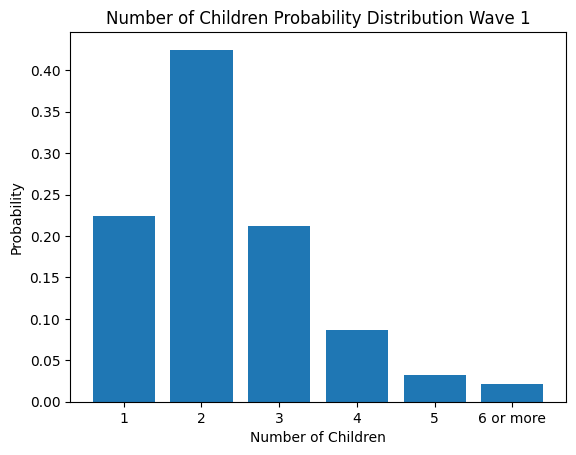

In [131]:
def visualise_number_of_children_distribution(number_of_children_probability_distribution_dict, wave_number):
    """
    Description: A function to visualise the probability distribution of the number of children data. 

    Parameters:
    •	‘number_of_children_probability_distribution_dict’ (dict): the probability distribution of the number of children data.
    •   'wave_number' (int): the wave number of the UKHLS data.

    Returns:
    •	A bar chart visualising the probability distribution of the number of children data.
    """

    # sort the number of children in ascending order
    number_of_children_probability_distribution_dict = dict(sorted(number_of_children_probability_distribution_dict.items()))

    plt.bar(number_of_children_probability_distribution_dict.keys(), number_of_children_probability_distribution_dict.values())

    plt.xlabel('Number of Children')
    plt.ylabel('Probability')

    if wave_number == 14:
        graph_title = "Average Number of Children Probability Distribution"
    else:
        graph_title = f"Number of Children Probability Distribution Wave {wave_number}"

    plt.title(graph_title)

    plt.savefig(f"Figures/Profiling-Variables/Number of Children/{graph_title}.png")

    plt.show()

visualise_number_of_children_distribution(number_of_children_probability_distribution_dict, 1)

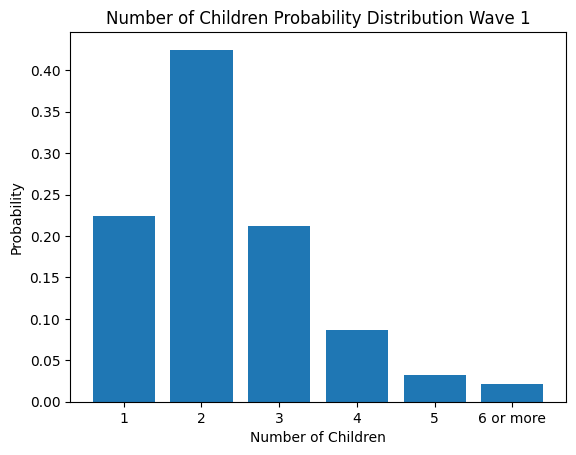

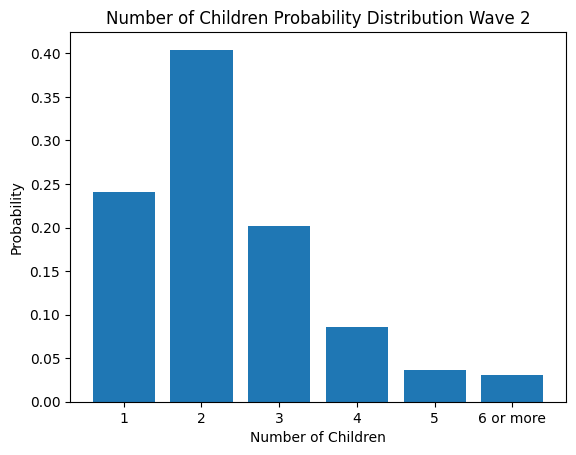

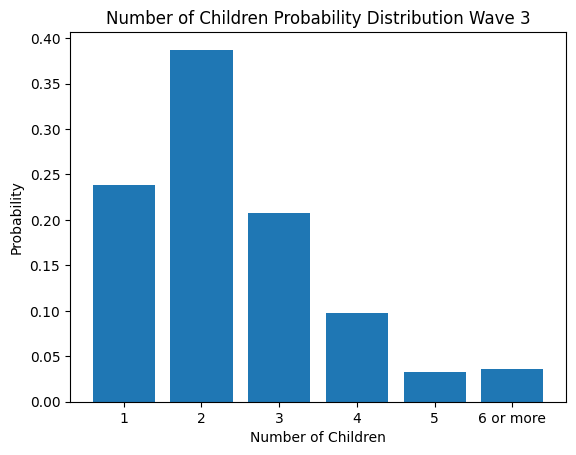

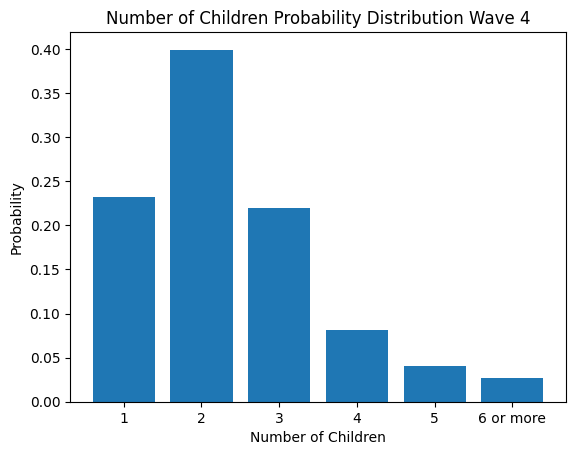

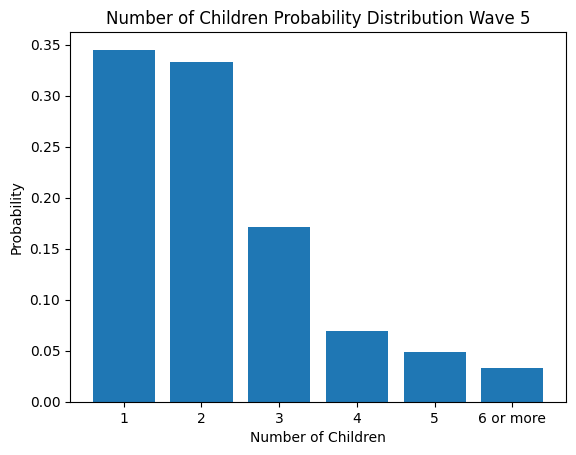

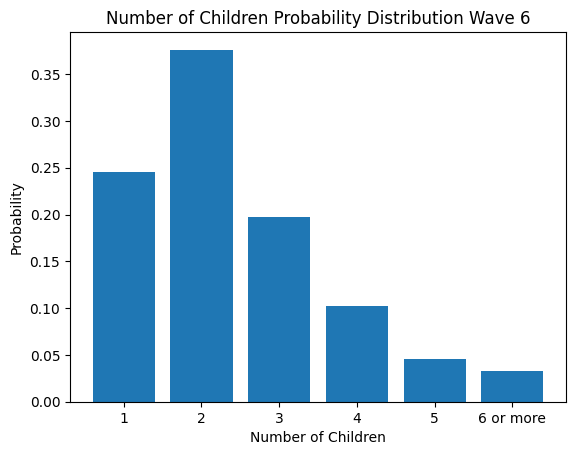

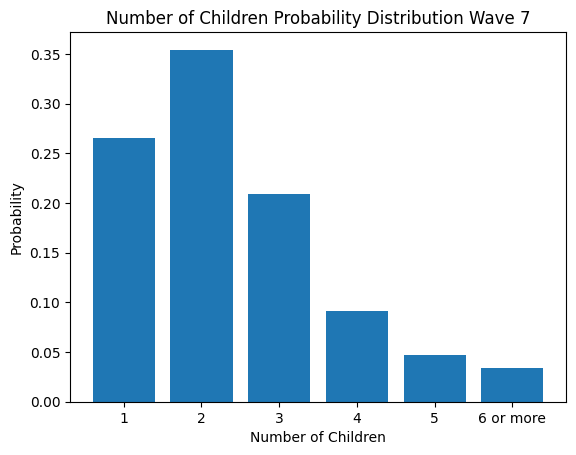

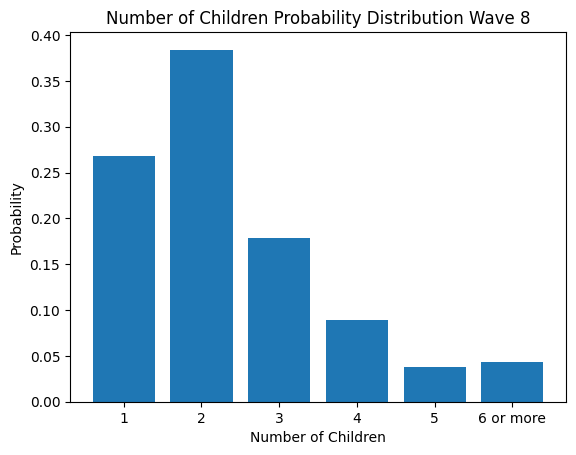

In [132]:
for i in range(12):

    visualise_number_of_children_distribution(number_of_children_probability_distribution_dicts[i], i + 1)

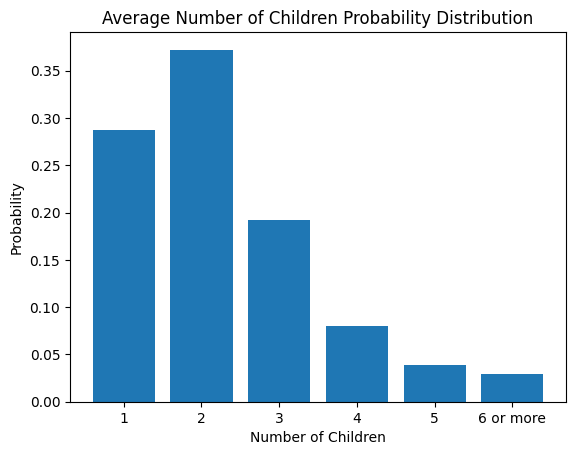

In [133]:
average_number_of_children_probability_distribution_dict = calculate_average_probability_distribution(number_of_children_probability_distribution_dicts)

visualise_number_of_children_distribution(average_number_of_children_probability_distribution_dict, 14)

#### Political Party

##### Probability Distribution Generation

In [134]:
# initialise the voting intention variables for the 12 waves of the UKHLS study
first_wave_voting_intention_variable_name = "a_vote3"
second_wave_voting_intention_variable_name = "b_vote3"
third_wave_voting_intention_variable_name = "c_vote3"
fourth_wave_voting_intention_variable_name = "d_vote3"
fifth_wave_voting_intention_variable_name = "e_vote3"
sixth_wave_voting_intention_variable_name = "f_vote3"
seventh_wave_voting_intention_variable_name = "g_vote3"
ninth_wave_voting_intention_variable_name = "i_vote3"
tenth_wave_voting_intention_variable_name = "j_vote3"
eleventh_wave_voting_intention_variable_name = "k_vote3"
twelfth_wave_voting_intention_variable_name = "l_vote3"

In [135]:
voting_intention_variable_names = [first_wave_voting_intention_variable_name, second_wave_voting_intention_variable_name, third_wave_voting_intention_variable_name, fourth_wave_voting_intention_variable_name, fifth_wave_voting_intention_variable_name, sixth_wave_voting_intention_variable_name, seventh_wave_voting_intention_variable_name, ninth_wave_voting_intention_variable_name, tenth_wave_voting_intention_variable_name, eleventh_wave_voting_intention_variable_name, twelfth_wave_voting_intention_variable_name] # initialise a list to store the voting intention variables.

In [136]:
# load the variables from indresp file for the 12 waves of the UKHLS study
first_wave_ukhls_indresp = data_loading('indresp.tab', 1)

In [137]:
ukhls_indresp_data = [first_wave_ukhls_indresp, second_wave_ukhls_indresp, third_wave_ukhls_indresp, fourth_wave_ukhls_indresp, fifth_wave_ukhls_indresp, sixth_wave_ukhls_indresp, seventh_wave_ukhls_indresp, ninth_wave_ukhls_indresp, tenth_wave_ukhls_indresp, eleventh_wave_ukhls_indresp, twelfth_wave_ukhls_indresp]

In [138]:
def generate_voting_intention_distribution(dataframe, column_name):
    """
    Generate a probability distribution of the voting intention based on a specified column in a dataframe.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe containing the data.
    column_name (str): The name of the column in the dataframe representing the voting intention.

    Returns:
    dict: A dictionary representing the probability distribution of the voting intention, where the keys are the voting intention labels and the values are the corresponding probabilities.
    """

    # removes irrelevant data values
    dataframe = dataframe[dataframe[column_name] > 0]

    voting_intention_mapping = {
        1: "Conservative",
        2: "Labour",
        3: "Lib Dem",
        4: "SNP",
        5: "Plaid Cymru",
        6: "Green Party",
        7: "Ulster Unionists",
        8: "SDLP",
        9: "Alliance",
        10: "DUP",
        11: "Sinn Fein",
        12: "None"
    }

    voting_intention_distribution = dataframe[column_name].map(voting_intention_mapping)

    voting_intention_probability_distribution = voting_intention_distribution.value_counts(normalize=True)

    voting_intention_probability_distribution_dict = voting_intention_probability_distribution.to_dict()

    return voting_intention_probability_distribution_dict

In [139]:
first_wave_voting_intention_probability_distribution_dict = generate_voting_intention_distribution(first_wave_ukhls_indresp, first_wave_voting_intention_variable_name)

In [140]:
voting_intention_probability_distribution_dicts = []

for i in range(11):

    if i != 7:
        voting_intention_probability_distribution_dict = generate_voting_intention_distribution(ukhls_indresp_data[i], voting_intention_variable_names[i])

        voting_intention_probability_distribution_dicts.append(voting_intention_probability_distribution_dict)

##### Visualise Probability Distribution

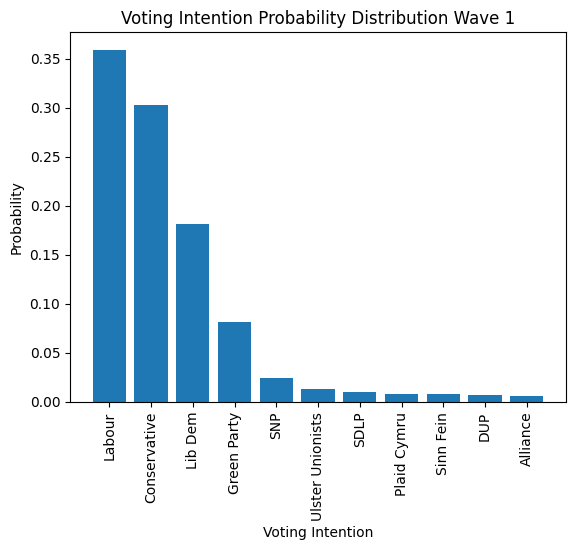

In [141]:
def visualise_voting_intention(voting_intention_distribution, wave_number):
    """
    Description: A function to visualise the probability distribution of the voting intention data. 

    Parameters:
    •	‘voting_intention_distribution’ (dict): the probability distribution of the voting intention data.

    Returns:
    •	A bar chart visualising the probability distribution of the voting intention data.
    """

    if wave_number == 14:
        graph_title = "Average Voting Intention Probability Distribution"
    else:
        graph_title = f"Voting Intention Probability Distribution Wave {wave_number}"

    plt.bar(voting_intention_distribution.keys(), voting_intention_distribution.values())

    plt.xticks(rotation=90)

    plt.xlabel('Voting Intention')
    plt.ylabel('Probability')

    plt.title(graph_title)

    plt.savefig(f"Figures/Profiling-Variables/Voting Intention/{graph_title}.png", bbox_inches='tight')

    plt.show()

visualise_voting_intention(first_wave_voting_intention_probability_distribution_dict, 1)

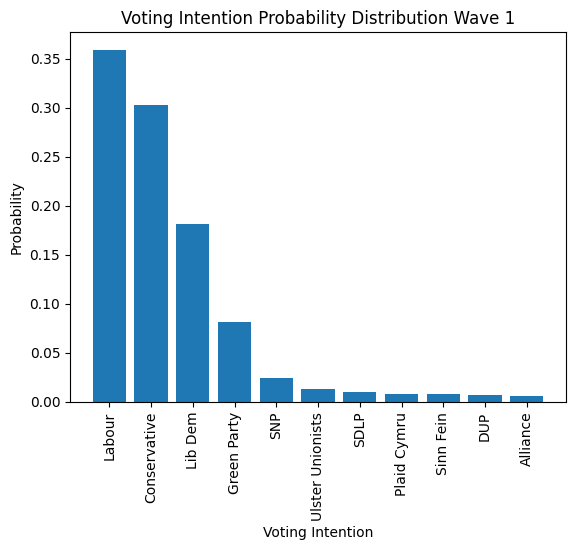

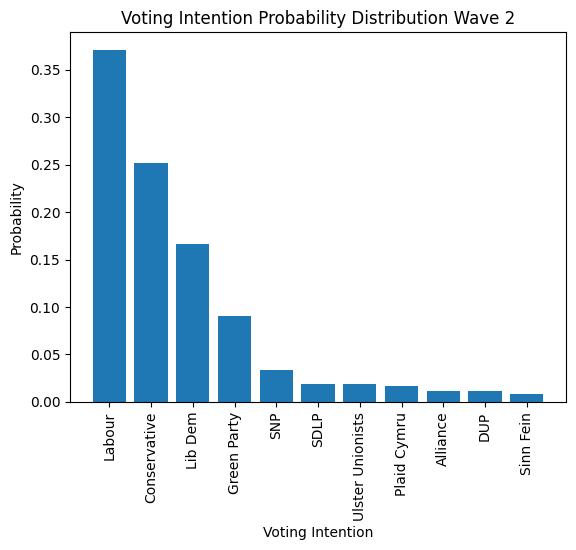

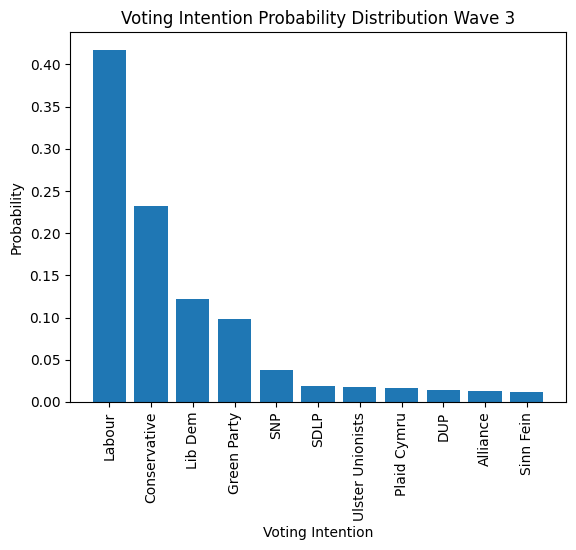

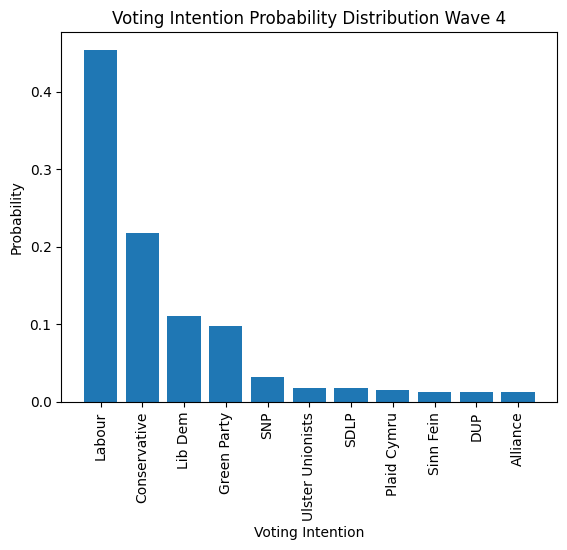

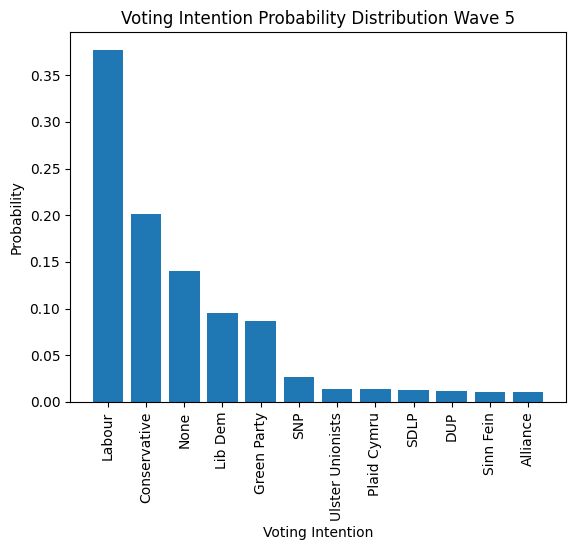

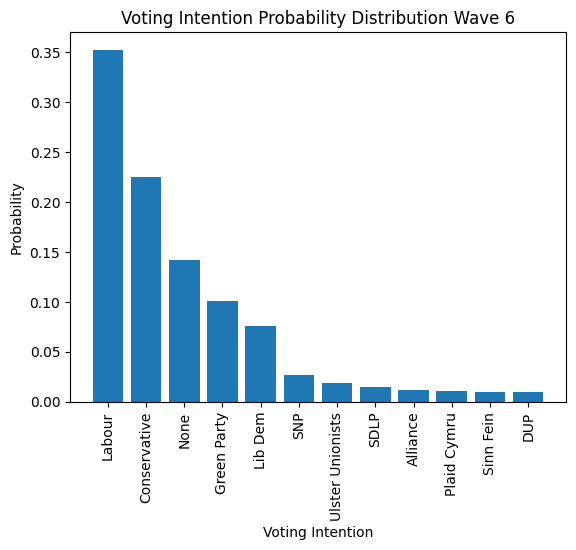

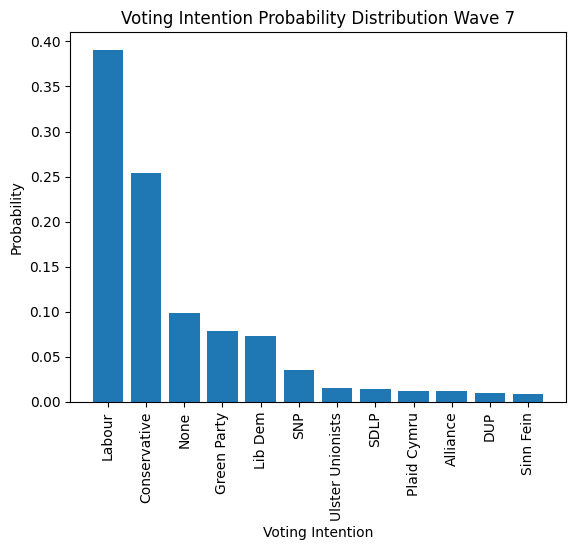

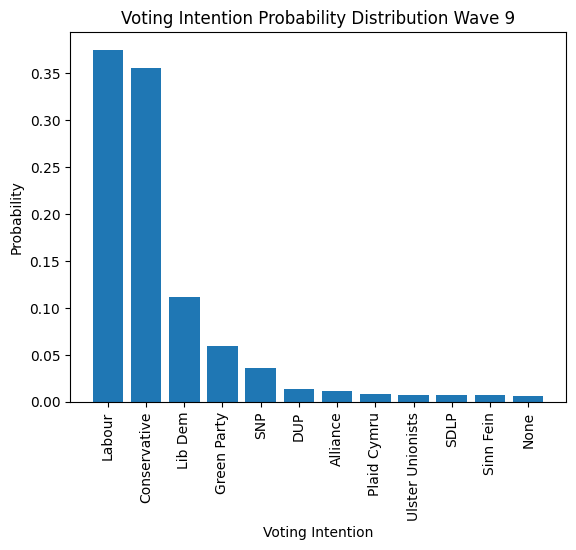

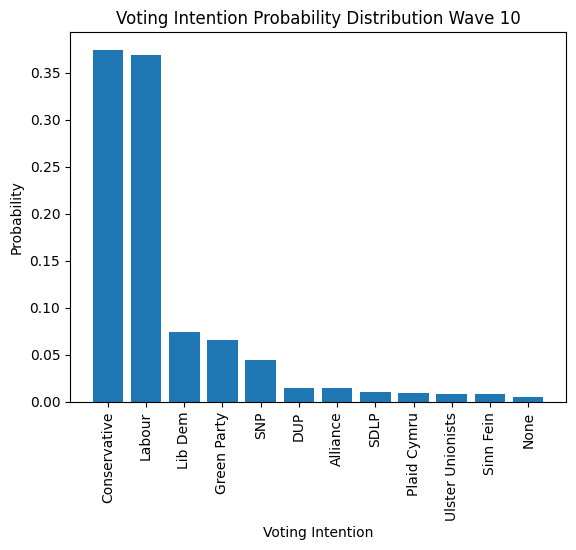

In [142]:
for i in range(10):

    if i != 7:
        visualise_voting_intention(voting_intention_probability_distribution_dicts[i], i + 1)

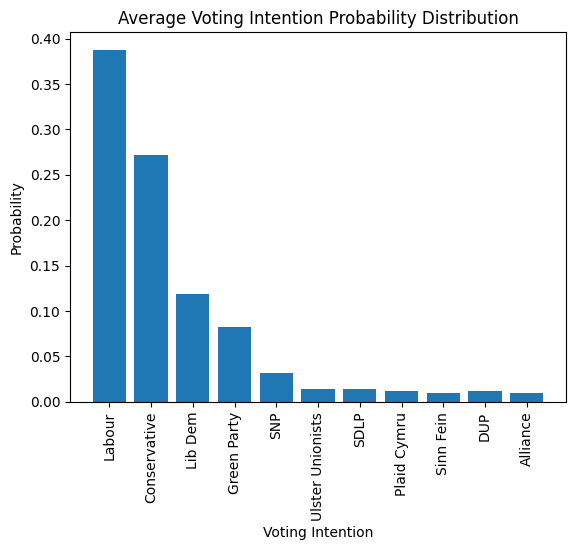

In [143]:
average_voting_intention_probability_distribution_dict = calculate_average_probability_distribution(voting_intention_probability_distribution_dicts)

visualise_voting_intention(average_voting_intention_probability_distribution_dict, 14)

### Profile Conditioning

##### Age Group Subprompt

In [144]:
def generate_age_group_prompt(age_group_probability_dict):
    """
    Generate a prompt for the synthetic individual's age group.

    Parameters:
    age_group_probability_dict (dict): A dictionary containing the age group probabilities.

    Returns:
    str: A prompt indicating the synthetic individual's age group.
    """
    # write a prompt to generate the profile of the synthetic individual's age group
    age_group = random.choices(list(age_group_probability_dict.keys()), list(age_group_probability_dict.values()))[0]

    age_group_prompt = f"In terms of my age, my age group is {age_group}."

    return age_group_prompt

generate_age_group_prompt(first_wave_age_group_probability_dict)

'In terms of my age, my age group is 60 - 69.'

##### Highest Qualification Levels Subprompt

In [145]:
def generate_highest_qualification_prompt(education_levels_probability_dict):
    """
    Generate a prompt for the synthetic individual's highest qualification.

    Parameters:
    education_levels_probability_dict (dict): A dictionary containing education levels as keys and their corresponding probabilities as values.

    Returns:
    str: A prompt describing the synthetic individual's highest qualification.
    """

    highest_qualification = random.choices(list(education_levels_probability_dict.keys()), list(education_levels_probability_dict.values()))[0]

    highest_qualification_prompt = "In terms of my qualifications, "

    if highest_qualification == "None":
        highest_qualification_prompt += "I do not have any qualifications."
    else: 
        highest_qualification_prompt += f"My highest qualification is {highest_qualification}."

    return highest_qualification_prompt

generate_highest_qualification_prompt(first_wave_education_levels_probability_dict)

'In terms of my qualifications, My highest qualification is GCSE.'

##### Ethnicity Subprompt

In [146]:
print(first_wave_ethnicity_probability_distribution_dict)

{'British': 0.7517338160222905, 'Indian': 0.04041164148142122, 'Pakistani': 0.03127987146372715, 'Other White background': 0.030608716874453417, 'African': 0.030547702820883076, 'Bangladeshi': 0.024181903231711037, 'Caribbean': 0.02408021314242714, 'Irish': 0.014928105106876284, 'Other Asian background': 0.013321401696190689, 'White and Black Caribbean': 0.007240334357013566, 'Chinese': 0.006731883910594073, 'Other': 0.005979377249893225, 'Arab': 0.005918363196322886, 'White and Asian': 0.004128617624926275, 'Other Mixed background': 0.0038235473570745796, 'White and Black African': 0.003233744839227969, 'Other Black background': 0.0018507596249669508}


In [147]:
def generate_ethnic_group_prompt(ethnicity_probability_distribution_dict):
    """
    Generate a prompt for the profile of a synthetic individual based on the given ethnicity probability distribution.

    Parameters:
    ethnicity_probability_distribution_dict (dict): A dictionary representing the probability distribution of ethnicities.

    Returns:
    str: A prompt indicating the racial identity of the synthetic individual.
    """
    ethnic_group = random.choices(list(ethnicity_probability_distribution_dict.keys()), list(ethnicity_probability_distribution_dict.values()))[0]

    ethnic_group_prompt = f"Racially, I am {ethnic_group}."

    return ethnic_group_prompt

generate_ethnic_group_prompt(first_wave_ethnicity_probability_distribution_dict)


'Racially, I am British.'

##### Current Job Subprompt

In [148]:
def generate_current_job_prompt(current_job_probability_distribution_dict):
    """
    Generate a prompt for the profile of a synthetic individual based on their current job.

    Parameters:
    current_job_probability_distribution_dict (dict): A dictionary containing the probability distribution of current jobs.

    Returns:
    str: A prompt describing the profession of the synthetic individual.
    """
    current_job = random.choices(list(current_job_probability_distribution_dict.keys()), list(current_job_probability_distribution_dict.values()))[0]

    current_job_prompt = f"My profession is {current_job}."

    return current_job_prompt

generate_current_job_prompt(current_job_probability_distribution_dict)

'My profession is Intermediate Occupations.'

##### Income / Wages Subprompt

In [149]:
print(current_job_probability_distribution_dict)

{'Lower Professional and Technical': 0.2017811108507148, 'Semi-Routine Occupations': 0.17240840559331302, 'Intermediate Occupations': 0.17108038434497305, 'Routine Occupations': 0.09272713069291462, 'Lower Managerial and Supervisory': 0.09108663385672994, 'Higher Professional': 0.08960237481446762, 'Small Establishments and Own Account Workers': 0.08569642996640887, 'Lower Supervisory and Technical': 0.0644480899929693, 'Higher Managerial and Administrative': 0.02991953753612999, 'Large Establishments': 0.0012499023513787985}


In [150]:
def generate_income_prompt(current_job_prompt):
    """
    Generates a random income value based on the given current job prompt.

    Args:
        current_job_prompt (str): The current job prompt.

    Returns:
        float: A random income value within the range specified for the given current job prompt.
    """
    # remove ""My profession is " from the current_job_prompt
    role = current_job_prompt.replace("My profession is ", "")

    # remove full stop from the current_job_prompt
    role = role.replace(".", "")

    # print statement to check the role variable
    # print(role)
   
    if role == 'Higher Managerial and Administrative':
        random_income = random.randint(10000, 12500)
    elif role == 'Large Establishments':
        random_income = random.randint(9167, 11667)
    elif role == 'Higher Professional':
        random_income = random.randint(8333, 10833)
    elif role == 'Lower Managerial and Supervisory':
        random_income = random.randint(6667, 9167)
    elif role == 'Lower Professional and Technical':
        random_income = random.randint(5833, 8333)
    elif role == 'Intermediate Occupations':
        random_income = random.randint(5000, 7500)
    elif role == 'Lower Supervisory and Technical':
        random_income = random.randint(4167, 6667)
    elif role == 'Small Establishments and Own Account Workers':
        random_income = random.randint(3333, 5833)
    elif role == 'Semi-Routine Occupations':
        random_income = random.randint(2917, 5417)
    elif role == 'Routine Occupations':
        random_income = random.randint(2500, 5000)
    else:
        # raise an exception if the role is not found
        raise ValueError("The role is not found.")

    random_income = round(random_income, 2)

    income_prompt = f"Financially, my monthly income is £{random_income}."

    return income_prompt


current_job_prompt = generate_current_job_prompt(current_job_probability_distribution_dict)

print(current_job_prompt)

income_prompt = generate_income_prompt(current_job_prompt)
print(income_prompt)

My profession is Lower Professional and Technical.
Financially, my monthly income is £5840.


##### Gender Subprompt

In [151]:
def generate_gender_prompt(gender_probability_distribution_dict):
    """
    Generate a prompt for the profile of a synthetic individual based on a given gender probability distribution.

    Parameters:
    gender_probability_distribution_dict (dict): A dictionary representing the probability distribution of genders.

    Returns:
    str: A prompt string indicating the generated gender.

    Example:
    >>> gender_probability_distribution_dict = {'Male': 0.4, 'Female': 0.6}
    >>> generate_gender_prompt(gender_probability_distribution_dict)
    'I am Female.'
    """

    gender = random.choices(list(gender_probability_distribution_dict.keys()), list(gender_probability_distribution_dict.values()))[0]

    gender_prompt = f"I am {gender}."

    return gender_prompt

generate_gender_prompt(gender_probability_distribution_dict)

'I am Male.'

##### Marital Status Subprompt

In [152]:
def generate_marital_status_prompt(martial_probability_distribution_dict):
    """
    Generate a prompt for the marital status based on a given probability distribution.

    Parameters:
    martial_probability_distribution_dict (dict): A dictionary representing the probability distribution of marital statuses.

    Returns:
    str: A string representing the generated marital status prompt.
    """

    marital_status = random.choices(list(martial_probability_distribution_dict.keys()), list(martial_probability_distribution_dict.values()))[0]

    marital_status_prompt = f"My marital status is {marital_status}."

    return marital_status_prompt

generate_marital_status_prompt(martial_probability_distribution_dict)

'My marital status is Single.'

##### Residence Subprompt

In [153]:
def generate_residence_prompt(residence_probability_distribution_dict):
    """
    Generate a residence prompt based on a given residence probability distribution.

    Parameters:
    residence_probability_distribution_dict (dict): A dictionary representing the probability distribution of different residence types.

    Returns:
    str: A residence prompt based on the randomly selected residence type.
    """

    residence = random.choices(list(residence_probability_distribution_dict.keys()), list(residence_probability_distribution_dict.values()))[0]

    if residence == "Urban":
        residence_prompt = "I live in an urban area." # if the residence is urban
    elif residence == "Rural":
        residence_prompt = "I live in a rural area." # if the residence is rural
    else:
        residence_prompt = f"I live in a {residence} area."

    return residence_prompt

generate_residence_prompt(residence_probability_distribution_dict)

'I live in a rural area.'

##### Number of Children Subprompt

In [154]:
def generate_number_of_children_prompt(number_of_children_probability_distribution_dict):
    """
    Generate a prompt based on the number of children.

    Parameters:
    - number_of_children_probability_distribution_dict (dict): A dictionary representing the probability distribution of the number of children.

    Returns:
    - number_of_children_prompt (str): A string representing the generated prompt based on the number of children.
    """

    number_of_children = random.choices(list(number_of_children_probability_distribution_dict.keys()), list(number_of_children_probability_distribution_dict.values()))[0]

    if number_of_children == "1":
        number_of_children_prompt = "I have 1 child."
    elif number_of_children == "0":
        number_of_children_prompt = "I do not have any children."
    else:
        number_of_children_prompt = f"I have {number_of_children} children."

    return number_of_children_prompt

generate_number_of_children_prompt(number_of_children_probability_distribution_dict)

'I have 5 children.'

#### Voting Intention Subprompt

In [155]:
def generate_voting_intention_prompt(voting_intention_probability_distribution_dict):
    """
    Generates a voting intention prompt based on a given probability distribution.

    Parameters:
    voting_intention_probability_distribution_dict (dict): A dictionary representing the probability distribution of voting intentions.

    Returns:
    str: A string representing the generated voting intention prompt.
    """

    voting_intention = random.choices(list(voting_intention_probability_distribution_dict.keys()), list(voting_intention_probability_distribution_dict.values()))[0]

    # check if the voting intention contains the word "Party"
    if "Party" in voting_intention:
        voting_intention_prompt = f"Ideologically, I describe myself as a {voting_intention} supporter."
    else:
        voting_intention_prompt = f"Ideologically, I describe myself as a {voting_intention} Party supporter."

    return voting_intention_prompt

generate_voting_intention_prompt(first_wave_voting_intention_probability_distribution_dict)

'Ideologically, I describe myself as a SDLP Party supporter.'

#### Profiling Demo

In [156]:
def generate_demo_profiles(n_profiles, data):
    '''
    Generate a specified number of demographic profiles.

    Parameters:
    n_profiles (int): The number of profiles to generate.
    data (dict): A dictionary containing the demographic data.

    Returns:
    None
    '''
    for i in range(n_profiles):
        age_group_prompt = generate_age_group_prompt(data["age_group"])
        highest_qualification_prompt = generate_highest_qualification_prompt(data["qualification"])
        ethnicity_prompt = generate_ethnic_group_prompt(data["ethnicity"])
        job_prompt = generate_current_job_prompt(data["job"])

        # print(job_prompt)

        income_prompt = generate_income_prompt(job_prompt)
        gender_prompt = generate_gender_prompt(data["gender"])
        marital_status_prompt = generate_marital_status_prompt(data["marital_status"])
        residence_prompt = generate_residence_prompt(data["residence"])
        number_of_children_prompt = generate_number_of_children_prompt(data["number_of_children"])
        voting_intention_prompt = generate_voting_intention_prompt(data["voting_intention"])

        # print("Income Prompt: ", income_prompt)

        profile_dict = {
            "Age": age_group_prompt,
            "Qualification": highest_qualification_prompt,
            "Ethnicity": ethnicity_prompt,
            "Job": job_prompt,
            "Income": income_prompt,
            "Gender": gender_prompt,
            "Marital Status": marital_status_prompt,
            "Residence": residence_prompt,
            "Number of Children": number_of_children_prompt,
            "Voting Intention": voting_intention_prompt
        }

        profiling_path = "Figures/Profiling-Variables/Demo-Profile-JSON"

        with open(f"{profiling_path}/Profile_{i + 1}.json", "w", encoding="utf-8") as f:
            json.dump(profile_dict, f, indent=4, ensure_ascii=False)
        

In [157]:
demo_conditioning_distribution = {
    "age_group": first_wave_age_group_probability_dict,
    "qualification": first_wave_education_levels_probability_dict,
    "ethnicity": first_wave_ethnicity_probability_distribution_dict,
    "job": current_job_probability_distribution_dicts[0],
    "monthly_income": first_wave_monthly_income, 
    "gender": gender_probability_distribution_dicts[0],
    "marital_status": marital_probability_dicts[0],
    "residence": residence_probability_distribution_dicts[0],
    "number_of_children": number_of_children_probability_distribution_dicts[0],
    "voting_intention": first_wave_voting_intention_probability_distribution_dict
}

In [158]:
print(first_wave_education_levels_probability_dict) # check the education distribution in the first wave of the UKHLS Study. 

{'None': 0.2781326781326781, 'GCSE': 0.22052088452088453, 'foundation': 0.1291203931203931, 'university': 0.0861916461916462, 'a level': 0.08357739557739557, 'diploma': 0.06044226044226044, 'CSE': 0.03917444717444717, 'Other': 0.028383292383292385, 'nursing': 0.018791154791154792, 'O grade': 0.015213759213759214, 'teaching qualification': 0.01423095823095823, 'as level': 0.012108108108108109, 'higher grade': 0.00965110565110565, 'sixth year certificate': 0.0028304668304668305, 'international ba': 0.001533169533169533, 'welsh ba': 9.828009828009828e-05}


In [159]:
print(current_job_probability_distribution_dicts[0])

{'Semi-Routine Occupations': 0.1818893156921326, 'Lower Professional and Technical': 0.17338881775501494, 'Intermediate Occupations': 0.1371461089770949, 'Routine Occupations': 0.10271731398491962, 'Small Establishments and Own Account Workers': 0.09926732109830701, 'Lower Managerial and Supervisory': 0.09788021055626689, 'Higher Professional': 0.08479157774932423, 'Lower Supervisory and Technical': 0.07582870963152653, 'Higher Managerial and Administrative': 0.04566794707639778, 'Large Establishments': 0.0014226774790155072}


In [160]:
generate_demo_profiles(3, demo_conditioning_distribution)

In [161]:
with open('Figures/Profiling-Variables/Demo-Profile-JSON/Profile_1.json', 'r', encoding='utf-8') as f:
    loaded_data = json.load(f)
    print(loaded_data["Income"])  


Financially, my monthly income is £6613.


### Question Response Distribution

#### DEMO QUESTION: And which of these would you say best describes your current lifestyle? 

##### Data Loading

In [162]:
# initialise the scenv_crlf variable distribution from the first, fourth, and tenth waves of the UKHLS study
first_wave_scenv_crlf_distribution = first_wave_ukhls_environmental_views["scenv_crlf"]
fourth_wave_scenv_crlf_distribution = fourth_wave_ukhls_environmental_views["scenv_crlf"]
tenth_wave_scenv_crlf_distribution = tenth_wave_ukhls_environmental_views["scenv_crlf"]

##### Visualisation Function

In [163]:
def visualise_scenv_crlf(scenv_crlf_distribution, wave_number):
    """
    Visualizes the probability distribution of the scenv_crlf variable.

    Parameters:
    - scenv_crlf_distribution (pandas.Series): A pandas Series containing the scenv_crlf variable distribution.
    - wave_number (int): The wave number of the UKHLS study.

    Returns:
    - scenv_crlf_probability_distribution_dict (dict): A dictionary representing the probability distribution of the scenv_crlf variable.
    """

    # Define the mapping dictionary for the scenv_crlf variable to convert numeric codes to descriptive labels
    scenv_crlf_dict = {
        1: "Don't do Anything Environmentally Friendly",
        2: "Do One or Two Things Environmentally Friendly",
        3: "Do Some Things Environmentally Friendly",
        4: "Do Many Things Environmentally Friendly",
        5: "Do Everything Environmentally Friendly"
    }

    # Define a list to store the ordered categories. 
    ordered_categories = [
        "Don't do Anything Environmentally Friendly", 
        "Do One or Two Things Environmentally Friendly", 
        "Do Some Things Environmentally Friendly", 
        "Do Many Things Environmentally Friendly", 
        "Do Everything Environmentally Friendly"
    ]

    # remove invalid values less than 0 from the dataframe
    scenv_crlf_distribution = scenv_crlf_distribution[scenv_crlf_distribution > 0]

    # Map the numeric codes to descriptive labels using the dictionary
    scenv_crlf_labels = scenv_crlf_distribution.map(scenv_crlf_dict)

    # Calculate the probability distribution of the scenv_crlf labels
    scenv_crlf_probability_distribution = scenv_crlf_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    scenv_crlf_probability_distribution_dict = scenv_crlf_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "None", 2: "Few", 3: "Some", 4: "Many", 5: "All"}
    scenv_crlf_probability_distribution_dict = {k: scenv_crlf_probability_distribution_dict[k] for k in ordered_categories}

    # Display the probability distribution of the scenv_crlf variable in a bar chart
    plt.bar(scenv_crlf_probability_distribution_dict.keys(), scenv_crlf_probability_distribution_dict.values())

    ordered_categories = ['\n'.join(wrap(l, 12)) for l in ordered_categories]

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks([0, 1, 2, 3, 4], rotation=90, fontsize = 8, labels=ordered_categories)

    plt.xlabel('Environmental Friendly Behaviour')
    plt.ylabel('Probability')

    plt.title('Environmental Friendly Behaviour Probability Distribution Wave ' + str(wave_number))

    plt.savefig("Figures/Environmental-Views-Variables/scenv_crlf/Environmental Friendly Behaviour Probability Distribution Wave " + str(wave_number) + ".png", bbox_inches='tight') # save the figure as a png file
    
    plt.show()

    return scenv_crlf_probability_distribution_dict

##### First Wave Data

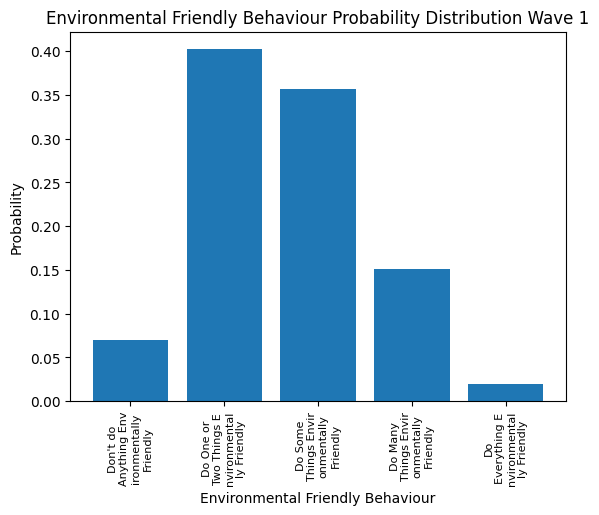

In [164]:
first_wave_scenv_clf_probability_distribution = visualise_scenv_crlf(first_wave_scenv_crlf_distribution, 1)

In [165]:
print(first_wave_scenv_clf_probability_distribution)

{"Don't do Anything Environmentally Friendly": 0.0701202774866497, 'Do One or Two Things Environmentally Friendly': 0.402255826720567, 'Do Some Things Environmentally Friendly': 0.3571143384738234, 'Do Many Things Environmentally Friendly': 0.15079602734940362, 'Do Everything Environmentally Friendly': 0.01971352996955632}


##### Fourth Wave Data

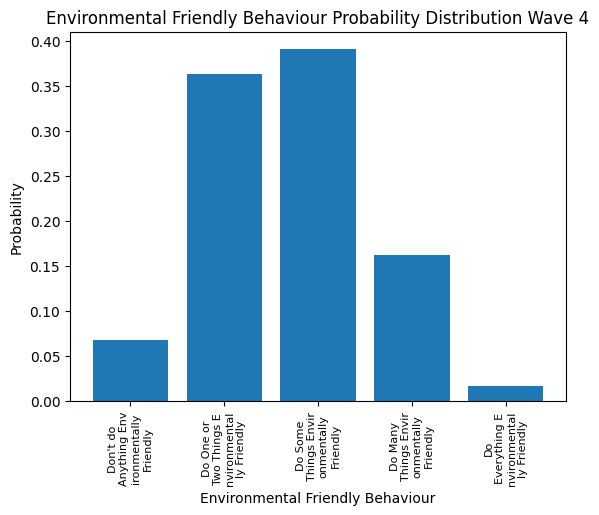

In [166]:
fourth_wave_scenv_clf_probability_distribution = visualise_scenv_crlf(fourth_wave_scenv_crlf_distribution, 4)

In [167]:
print(fourth_wave_scenv_clf_probability_distribution)

{"Don't do Anything Environmentally Friendly": 0.0678617487748259, 'Do One or Two Things Environmentally Friendly': 0.36270312096982205, 'Do Some Things Environmentally Friendly': 0.390714469950993, 'Do Many Things Environmentally Friendly': 0.1622388444673717, 'Do Everything Environmentally Friendly': 0.01648181583698736}


##### Tenth Wave Data

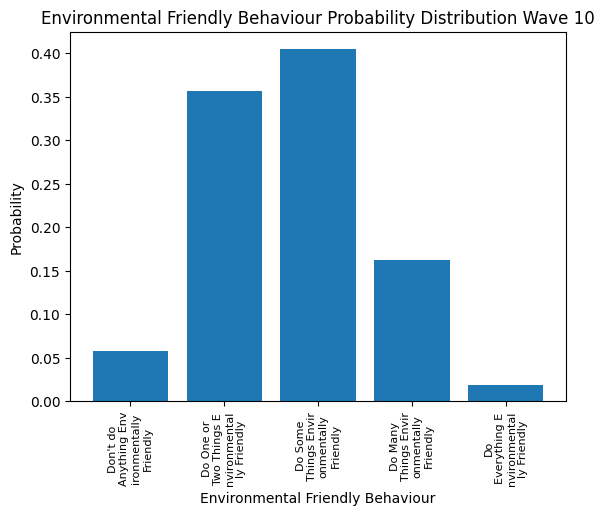

In [168]:
tenth_wave_scenv_clf_probability_distribution = visualise_scenv_crlf(tenth_wave_scenv_crlf_distribution, 10)

In [169]:
print(tenth_wave_scenv_clf_probability_distribution)

{"Don't do Anything Environmentally Friendly": 0.05744607582255893, 'Do One or Two Things Environmentally Friendly': 0.3565726450239489, 'Do Some Things Environmentally Friendly': 0.40453307453902265, 'Do Many Things Environmentally Friendly': 0.1623203831825439, 'Do Everything Environmentally Friendly': 0.019127821431925617}


#### Q1: Overall, how positive or negative do you think the effects of climate change will be?

In [170]:
# given the survey data on the UK population from Steentjes et al. 2017 as 
# 2% Entirely Positive 
# 10% More Positive than Negative
# 26% Neither
# 44% More Negative than Positive
# 13% Entirely Negative
# 4% Don't Know
# initialise a data distribution for q1 
q1_human_distribution = {
    "Entirely Positive": 0.02,
    "More Positive than Negative": 0.10,
    "Neither": 0.26,
    "More Negative than Positive": 0.44,
    "Entirely Negative": 0.13,
    "Don't Know": 0.04
}

# use q1_human_distribution to create a list of responses
q1_human_responses = list(q1_human_distribution.keys())

print(q1_human_responses)

['Entirely Positive', 'More Positive than Negative', 'Neither', 'More Negative than Positive', 'Entirely Negative', "Don't Know"]


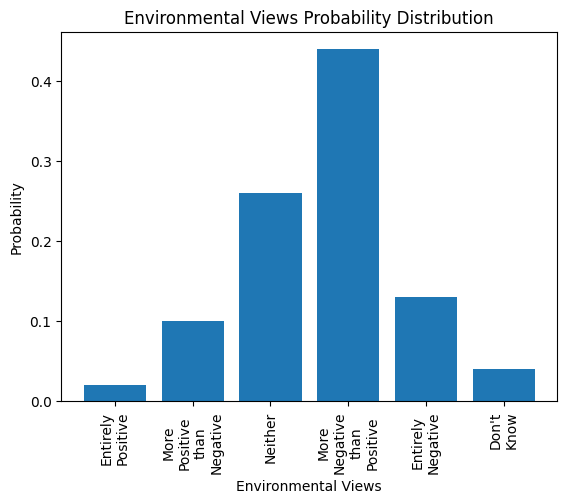

In [171]:
# initialise a list of integers corresponding to q1_human_responses
q1_human_responses_int = [0, 1, 2, 3, 4, 5]


q1_human_responses = ['\n'.join(wrap(l, 8)) for l in q1_human_responses]

# visualise the variable q1_human_distribution as a bar chart
plt.bar(q1_human_distribution.keys(), q1_human_distribution.values())
plt.xlabel('Environmental Views')
plt.ylabel('Probability')
plt.title('Environmental Views Probability Distribution')
plt.xticks(q1_human_responses_int, q1_human_responses, rotation=90)
plt.savefig("Figures/Environmental-Views-Variables/q1_human_distribution.png", bbox_inches='tight')

#### Q2: Please select the extent to which you agree or disagree with the following statement: My behaviour and everyday lifestyle contribute to climate change.

##### Data Loading

In [172]:
fourth_wave_scenv_bccc = fourth_wave_ukhls_indresp["d_scenv_bccc"] # fourth wave scenv_bccc variable
tenth_wave_scenv_bccc = tenth_wave_ukhls_indresp["j_scenv_bccc"] # tenth wave scenv_bccc variable

##### Visualisation Function

In [173]:
def visualise_scenv_bccc(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_bccc variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_bccc variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_bccc_values = data.unique()

    scenv_bccc_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Define a list to store the ordered categories.
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_bccc_dict)

    # Calculate the probability distribution of the scenv_bccc labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_bccc variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Bccc')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Bccc Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_bccc/Scenv Bccc Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Bccc Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_bccc/Scenv Bccc Probability Distribution Wave 10.png", bbox_inches='tight')
    
    plt.show()

    return data_probability_distribution

###### Fourth Wave Data

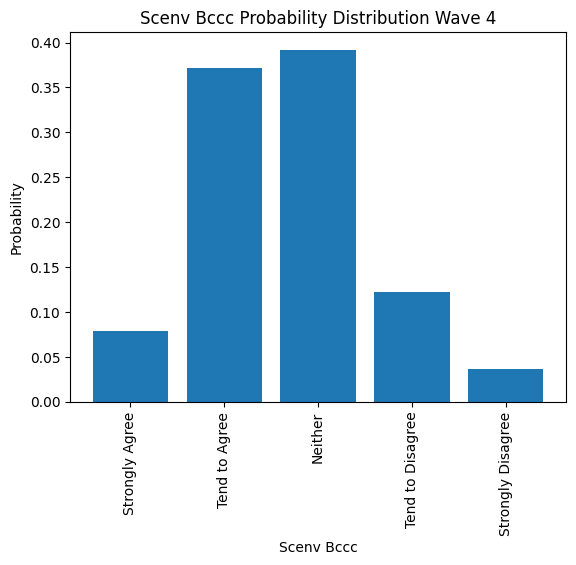

In [174]:
fourth_wave_ukhls_scenv_bccc = visualise_scenv_bccc(fourth_wave_scenv_bccc, 4) # visualise the fourth wave scenv_bccc variable

In [175]:
print(fourth_wave_ukhls_scenv_bccc)

{'Strongly Agree': 0.07863685763080266, 'Tend to Agree': 0.37152616053407855, 'Neither': 0.3922010039848885, 'Tend to Disagree': 0.12184960927392227, 'Strongly Disagree': 0.03578636857630803}


###### Tenth Wave Data

In [176]:
tenth_wave_ukhls_scenv_bccc = visualise_scenv_bccc(fourth_wave_scenv_bccc, 10) # visualise the tenth wave scenv_bccc variable

In [177]:
print(tenth_wave_ukhls_scenv_bccc)

{'Strongly Agree': 0.07863685763080266, 'Tend to Agree': 0.37152616053407855, 'Neither': 0.3922010039848885, 'Tend to Disagree': 0.12184960927392227, 'Strongly Disagree': 0.03578636857630803}


#### Q3: To which extent do you agree or disagree with the following statement: 'I would be prepared to pay more for environmentally friendly products.'? Please select one of the following options: 'Strongly Agree', 'Tend to Agree', 'Neither Agree nor Disagree', 'Tend to Disagree', 'Strongly Disagree'.

##### Data Loading

In [178]:
fourth_wave_pmep = fourth_wave_ukhls_indresp["d_scenv_pmep"] # fourth wave pmep variable
tenth_wave_pmep = tenth_wave_ukhls_indresp["j_scenv_pmep"] # tenth wave pmep variable

##### Visualisation Function

In [179]:
def visualise_scenv_pmep(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_pmep variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_pmep variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_pmep_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    scenv_pmep_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_pmep_dict)

    # Calculate the probability distribution of the scenv_pmep labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_pmep variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Pmep')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Pmep Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_pmep/Scenv Pmep Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Pmep Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_pmep/Scenv Pmep Probability Distribution Wave 10.png", bbox_inches='tight')
    
    plt.show()

    return data_probability_distribution

###### Fourth Wave Data

In [180]:
fourth_wave_scenv_pmep_probability_distribution = visualise_scenv_pmep(fourth_wave_pmep, 4) # visualise the fourth wave scenv_pmep variable

###### Tenth Wave Data

In [181]:
tenth_wave_scenv_pmep_probability_distribution = visualise_scenv_pmep(tenth_wave_pmep, 10) # visualise the tenth wave scenv_pmep variable

#### Q4: Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?

##### Data Loading

In [182]:
br_openvb_distribution = {
    "Strongly Agree": 0.05,
    "Agree": 0.45,
    "Disagree": 0.28,
    "Strongly Disagree": 0.02,
    "Already Changed": 0.20 
} # initialise a dictionary to store the attitudes about whether personal changes are needed to protect the environment

##### Visualisation Function

In [183]:
def visualise_br_openvb(data_probability_distribution):
    """
    Visualizes the probability distribution of the scenv_pmep variable.

    Parameters:
    - data_probability_distribution (dict): A dictionary representing the probability distribution of the open_vb variable.

    Returns:
    None
    """

    # initialise a variable of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Already Changed"]

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_pmep variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Open VB')
    plt.ylabel('Probability')

    plt.title('Open Vb Probability Distribution Wave 18')

    plt.savefig("Figures/Environmental-Views-Variables/Open_VB/Open VB Probability Distribution Wave 18.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Q4 Visualisations

In [184]:
visualise_br_openvb(br_openvb_distribution)

{'Strongly Agree': 0.05,
 'Agree': 0.45,
 'Disagree': 0.28,
 'Strongly Disagree': 0.02,
 'Already Changed': 0.2}

#### Q5: If things continue their current course, will there be an environmental disaster?

##### Data Loading

In [185]:
fourth_wave_meds = fourth_wave_ukhls_indresp["d_scenv_meds"] # fourth wave meds variable
tenth_wave_meds = tenth_wave_ukhls_indresp["j_scenv_meds"] # tenth wave meds variable

##### Visualisation Function

In [186]:
def visualise_scenv_meds(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_meds variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_meds variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_meds_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    scenv_meds_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_meds_dict)

    # Calculate the probability distribution of the scenv_meds labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_meds variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Meds')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Meds Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_meds/Scenv Meds Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Meds Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_meds/Scenv Meds Probability Distribution Wave 10.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Fourth Wave Data

In [187]:
fourth_wave_scenv_meds_probability_distribution = visualise_scenv_meds(fourth_wave_meds, 4) # visualise the fourth wave scenv_meds variable

##### Tenth Wave Data

In [188]:
tenth_wave_scenv_meds_probability_distribution = visualise_scenv_meds(tenth_wave_meds, 10) # visualise the tenth wave scenv_meds variable

#### Q6: Does your household buy or considering buying electricity on a Green Tariff? By Green Tariff, we mean a payment scheme where your electricity supplier provides electricity from renewable sources such as wind power to the National Grid for the amount you use. 

##### Data Loading

In [189]:
# load the data etariff from hhresp for waves 1, 4, 10, and 13
first_wave_etariff = first_wave_ukhls_hhresp["a_etariff"]
fourth_wave_etariff = fourth_wave_ukhls_hhresp["d_etariff"]
tenth_wave_etariff = tenth_wave_ukhls_hhresp["j_etariff"]
thirteenth_wave_etariff = thirteenth_wave_ukhls_hhresp["m_etariff"]

##### Visualisation Function

In [190]:
def visualise_etariff(data, wave_number):
    """
    Visualizes the probability distribution of the etariff variable.

    Parameters:
    - data (pandas.Series): The data containing the etariff variable.
    - wave_number (int): The wave number of the data.

    Returns:
    - data_probability_distribution (dict): A dictionary representing the probability distribution of the etariff variable.
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    etariff_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Yes - already buy", "Yes - seriously considering", "No", "Considered and rejected"]

    etariff_dict = {
        1: "Yes - already buy",
        2: "Yes - seriously considering",
        3: "No",
        4: "Considered and rejected"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(etariff_dict)

    # Calculate the probability distribution of the etariff labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Low", 2: "Medium", 3: "High"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the etariff variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    ordered_categories_index = [0, 1, 2, 3]

    ordered_categories = ['\n'.join(wrap(l, 11)) for l in ordered_categories]

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(ordered_categories_index, rotation=90, labels=ordered_categories)

    # set title for the x- and y-axis   
    plt.xlabel('Etariff')
    plt.ylabel('Probability')

    if wave_number == 1:
        plt.title('Etariff Probability Distribution Wave 1')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 1.png", bbox_inches='tight')

    elif wave_number == 4:
        plt.title('Etariff Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:
        plt.title('Etariff Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 10.png", bbox_inches='tight')

    elif wave_number == 13:

        plt.title('Etariff Probability Distribution Wave 13')

        plt.savefig("Figures/Environmental-Views-Variables/etariff/Etariff Probability Distribution Wave 13.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution # return the probability distribution of the etariff variable

##### First Wave Data

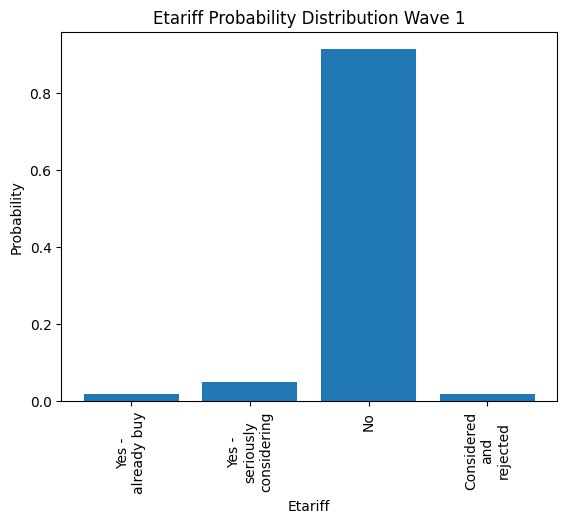

In [191]:
first_wave_etariff_probability_distribution = visualise_etariff(first_wave_etariff, 1) # visualise the first wave etariff variable

##### Fourth Wave Data

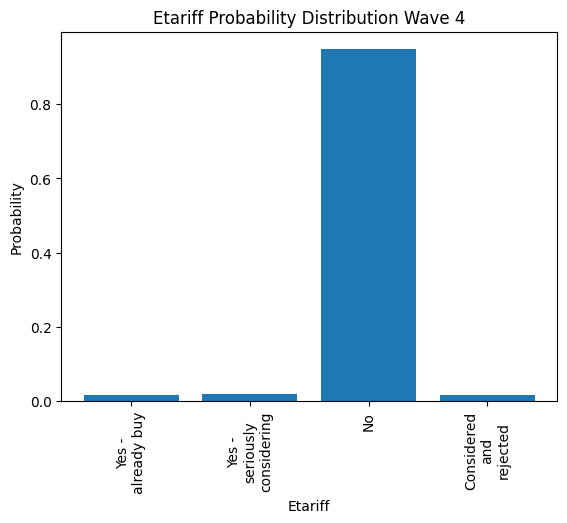

In [192]:
fourth_wave_etariff_probability_distribution = visualise_etariff(fourth_wave_etariff, 4) # visualise the fourth wave etariff variable

##### Tenth Wave Data

In [193]:
tenth_wave_etariff_probability_distribution = visualise_etariff(tenth_wave_etariff, 10) # visualise the tenth wave etariff variable

##### Thirteenth Wave Data

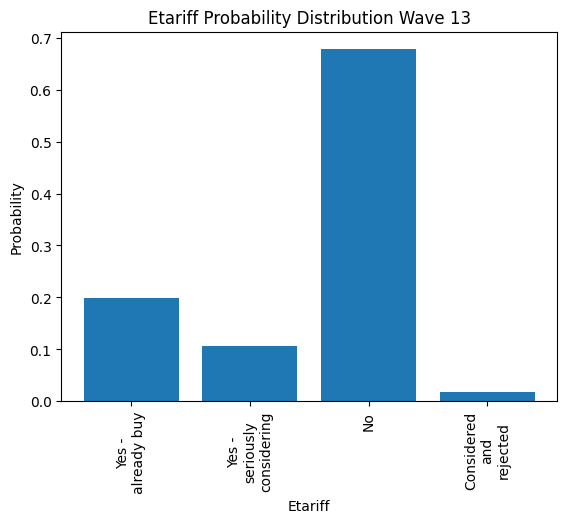

In [194]:
thirteenth_wave_etariff_probability_distribution = visualise_etariff(thirteenth_wave_etariff, 13) # visualise the thirteenth wave etariff variable

#### Q7: Does your accommodation experience pollution cause by traffic or industry?

##### Data Loading

In [195]:
# load the variable grimyn from the 3rd, 6th, 9th, and 12th wave of the hhresp data
third_wave_grimyn = third_wave_ukhls_hhresp["c_grimyn"]
sixth_wave_grimyn = sixth_wave_ukhls_hhresp["f_grimyn"]
ninth_wave_grimyn = ninth_wave_ukhls_hhresp["i_grimyn"]
twelfth_wave_grimyn = twelfth_wave_ukhls_hhresp["l_grimyn"]

##### Visualisation Function

In [196]:
def visualise_grimyn(data, wave_number):
    """
    Visualizes the probability distribution of the grimyn variable.

    Parameters:
    - data (pandas.Series): The data containing the grimyn variable.
    - wave_number (int): The wave number of the data.

    Returns:
    None
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    grimyn_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Yes", "No"]

    grimyn_dict = {
        1: "Yes",
        2: "No"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(grimyn_dict)

    # Calculate the probability distribution of the grimyn labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the grimyn variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Grimyn')
    plt.ylabel('Probability')

    if wave_number == 3:
        plt.title('Grimyn Probability Distribution Wave 3')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 3.png", bbox_inches='tight')

    elif wave_number == 6:
        plt.title('Grimyn Probability Distribution Wave 6')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 6.png", bbox_inches='tight')

    elif wave_number == 9:

        plt.title('Grimyn Probability Distribution Wave 9')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 9.png", bbox_inches='tight')

    elif wave_number == 12:

        plt.title('Grimyn Probability Distribution Wave 12')

        plt.savefig("Figures/Environmental-Views-Variables/grimyn/Grimyn Probability Distribution Wave 12.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Third Wave Data

In [197]:
third_wave_grimyn_probability_distribution = visualise_grimyn(third_wave_grimyn, 3) # visualise the third wave grimyn variable

##### Sixth Wave Data

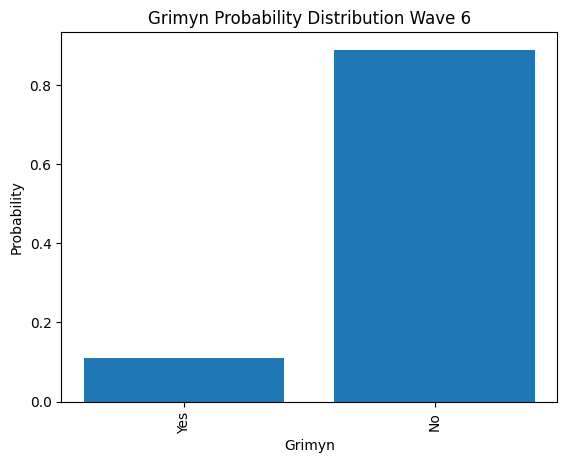

In [198]:
sixth_wave_grimyn_probability_distribution = visualise_grimyn(sixth_wave_grimyn, 6) # visualise the sixth wave grimyn variable

##### Ninth Wave Data

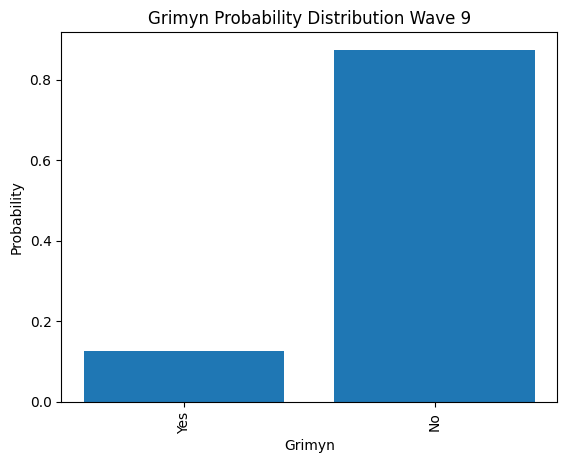

In [199]:
ninth_wave_grimyn_probability_distribution = visualise_grimyn(ninth_wave_grimyn, 9) # visualise the ninth wave grimyn variable

##### Twelfth Wave Data

In [200]:
twelfth_wave_grimyn_probability_distribution = visualise_grimyn(twelfth_wave_grimyn, 12) # visualise the twelfth wave grimyn variable

#### Q8: Based on your profile, please state your opinion about joining environmental organisations.

In [201]:
third_wave_orga3 = third_wave_ukhls_indresp["c_orga3"]
sixth_wave_orga3 = sixth_wave_ukhls_indresp["f_orga3"]
ninth_wave_orga3 = ninth_wave_ukhls_indresp["i_orga3"]
twelfth_wave_orga3 = twelfth_wave_ukhls_indresp["l_orga3"]

##### Visualisation Function

In [202]:
def visualise_orga_3(data, wave_number):
    '''
    Visualises the probability distribution of the orga3 variable.

    Parameters:
    - data (pandas.Series): The data containing the orga3 variable.
    - wave_number (int): The wave number of the data.

    Returns:
    - data_probability_distribution (dict): A dictionary representing the probability distribution of the orga3 variable.
    '''
    # remove data values less than 0.
    data = data[data >= 0]

    orga3_unique = data.unique()

    print(orga3_unique)

    ordered_categories = ["Mentioned", "Not Mentioned"]

    orga3_dict = {
        1: "Mentioned",
        0: "Not Mentioned"
    }

    data_labels = data.map(orga3_dict)

    data_probability_distribution = data_labels.value_counts(normalize=True)

    data_probability_distribution = data_probability_distribution.to_dict()

    print(data_probability_distribution)

    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    plt.xticks(rotation=90)

    plt.xlabel('Orga3')

    plt.ylabel('Probability')

    plt.title('Orga3 Probability Distribution Wave ' + str(wave_number))

    plt.savefig("Figures/Environmental-Views-Variables/orga3/Orga3 Probability Distribution Wave " + str(wave_number) + ".png", bbox_inches='tight')

    return data_probability_distribution

##### Third Wave Data

[0 1]
{'Not Mentioned': 0.9825230660042583, 'Mentioned': 0.01747693399574166}


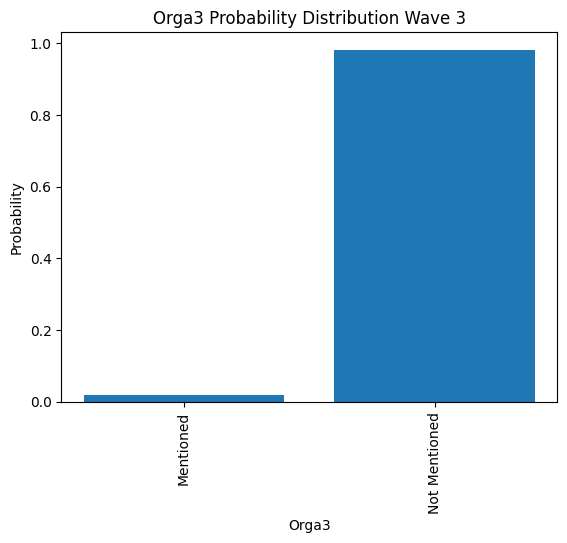

In [203]:
third_wave_orga3_probability_distribution = visualise_orga_3(third_wave_orga3, 3)

##### Sixth Wave Data

[0 1]
{'Not Mentioned': 0.9824015422748554, 'Mentioned': 0.017598457725144588}


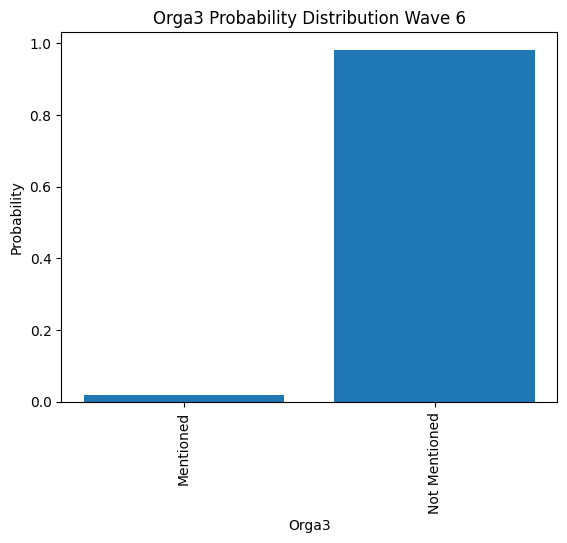

In [204]:
sixth_wave_orga3_probability_distribution = visualise_orga_3(sixth_wave_orga3, 6)

##### Ninth Wave Data

[0 1]
{'Not Mentioned': 0.9822133240482822, 'Mentioned': 0.017786675951717734}


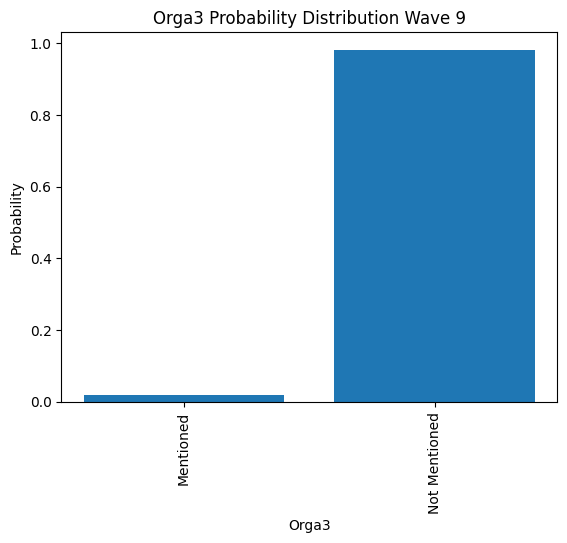

In [205]:
ninth_wave_orga3_probability_distribution = visualise_orga_3(ninth_wave_orga3, 9)

##### Twelfth Wave Data

[0 1]
{'Not Mentioned': 0.9793366405641425, 'Mentioned': 0.020663359435857488}


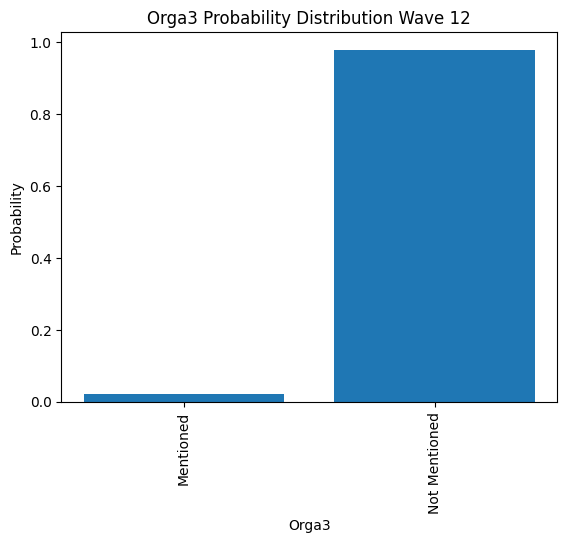

In [206]:
twelfth_wave_orga3_probability_distribution = visualise_orga_3(twelfth_wave_orga3, 12)

#### Q9: To which extent do you believe that climate change is controllable?

##### Data Loading

In [207]:
# load the scenv_tlat variable from fourth and tenth wave of indresp data
fourth_wave_scenv_tlat = fourth_wave_ukhls_indresp["d_scenv_tlat"]
tenth_wave_scenv_tlat = tenth_wave_ukhls_indresp["j_scenv_tlat"]

##### Visualisation Function

In [208]:
def visualise_tlat(data, wave_number):
    """
    Visualizes the probability distribution of the scenv_tlat variable.

    Parameters:
    - data (pandas.Series): The data containing the scenv_tlat variable.
    - wave_number (int): The wave number of the data.

    Returns:
    - data probability distribution (dict): A dictionary representing the probability distribution of the scenv_tlat variable.
    """

    # remove data values less than 0.
    data = data[data > 0]

    # check for the potential data values
    scenv_tlat_values = data.unique()

    # define a set of ordered categories to format the graph labels on the x-axis in a specific order
    ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]

    scenv_tlat_dict = {
        1: "Strongly Agree",
        2: "Tend to Agree",
        3: "Neither",
        4: "Tend to Disagree",
        5: "Strongly Disagree"
    }

    # Map the numeric codes to descriptive labels using the dictionary
    data_labels = data.map(scenv_tlat_dict)

    # Calculate the probability distribution of the scenv_tlat labels
    data_probability_distribution = data_labels.value_counts(normalize=True)

    # Convert the probability distribution to a dictionary
    data_probability_distribution = data_probability_distribution.to_dict()

    # sort the dictionary in the order {1: "Strong Agree", 2: "Tend to Agree", 3: "Neither", 4: "Tend to Disagree", 5: "Strongly Disagree"}
    data_probability_distribution = {k: data_probability_distribution[k] for k in ordered_categories}

    # use matplotlib to plot the probability distribution of the scenv_tlat variable
    plt.bar(data_probability_distribution.keys(), data_probability_distribution.values())

    # rotate the x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)

    # set title for the x- and y-axis   
    plt.xlabel('Scenv Tlat')
    plt.ylabel('Probability')

    if wave_number == 4:
        plt.title('Scenv Tlat Probability Distribution Wave 4')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_tlat/Scenv Tlat Probability Distribution Wave 4.png", bbox_inches='tight')

    elif wave_number == 10:

        plt.title('Scenv Tlat Probability Distribution Wave 10')

        plt.savefig("Figures/Environmental-Views-Variables/scenv_tlat/Scenv Tlat Probability Distribution Wave 10.png", bbox_inches='tight')

    plt.show()

    return data_probability_distribution

##### Fourth Wave Data

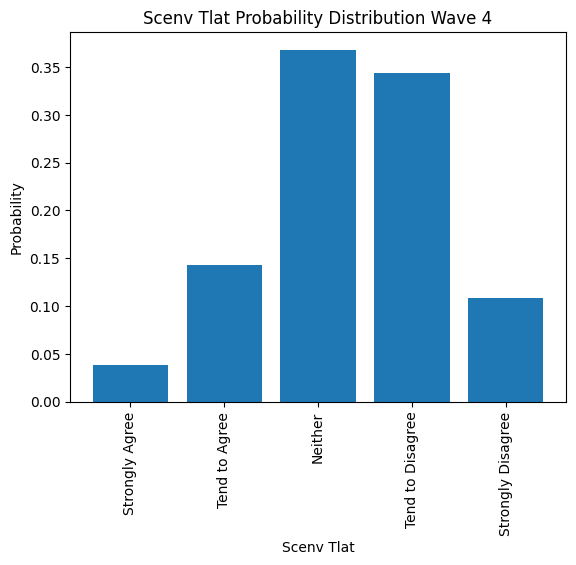

In [209]:
fourth_wave_scenv_tlat_probability_distribution = visualise_tlat(fourth_wave_scenv_tlat, 4) # visualise the fourth wave scenv_tlat variable

##### Tenth Wave Data

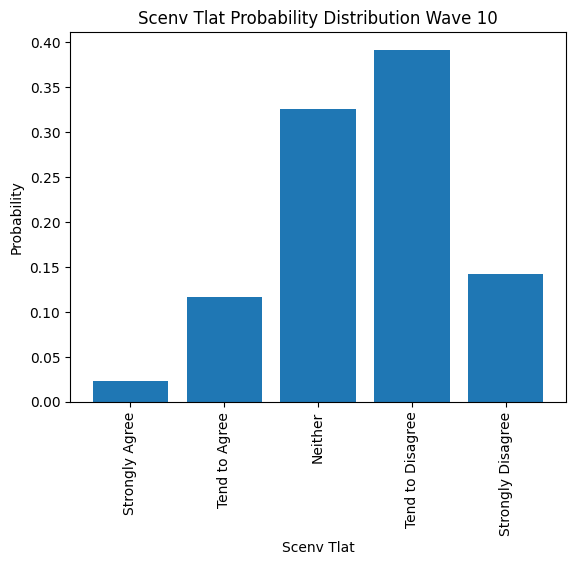

In [210]:
tenth_wave_scenv_tlat_probability_distribution = visualise_tlat(tenth_wave_scenv_tlat, 10) # visualise the tenth wave scenv_tlat variable

## Synthetic Response Generation Functions

### Generate Prompt

#### Profiling Subprompt

In [211]:
print(len(gender_probability_distribution_dicts))

12


In [212]:
def generate_profiling_subprompts(wave_number):
    """
    Description: A function to generate the subprompts for the synthetic individual's profile.
    The function is dynamically adjustable to the wave number of the UKHLS study to help identifying how views on the environment have changed over time.

    Parameters:
    •	wave_number (int): The wave number of the UKHLS study.

    Returns:
    •	A list of subprompts for the synthetic individual's profile.
    """
    # generate the profile of the synthetic individual's age group
    age_group_prompt = generate_age_group_prompt(age_group_probability_dicts[wave_number - 1]) 

    # generate the profile of the synthetic individual's highest qualification
    highest_qualification_prompt = generate_highest_qualification_prompt(education_waves[wave_number - 1]) 

    # generate the profile of the synthetic ethnic groups. 
    ethnic_group_prompt = generate_ethnic_group_prompt(ethnicity_waves[wave_number - 1])

    # generate the profile of the synthetic individual's current job
    current_job_prompt = generate_current_job_prompt(current_job_probability_distribution_dicts[wave_number - 1])

    # generate the profile of the synthetic individual's gross monthly income
    income_prompt = generate_income_prompt(current_job_prompt)

    if wave_number == 13:
        # generate the profile of the synthetic gender group.
        gender_prompt = generate_gender_prompt(gender_probability_distribution_dicts[11])
    else:
        gender_prompt = generate_gender_prompt(gender_probability_distribution_dicts[wave_number - 1])

    if wave_number == 13:
        # generate the profile of the synthetic marital status group.
        marital_status_prompt = generate_marital_status_prompt(marital_probability_dicts[11])
    else:
        # generate the profile of the synthetic marital status group.
        marital_status_prompt = generate_marital_status_prompt(marital_probability_dicts[wave_number - 1])

    if wave_number == 13:
        # generate the profile of the synthetic residence group.
        residence_prompt = generate_residence_prompt(residence_probability_distribution_dicts[11])
    else:
        # generate the profile of the synthetic residence group.
        residence_prompt = generate_residence_prompt(residence_probability_distribution_dicts[wave_number - 1])

    if wave_number == 13:
        # generate the profile of the synthetic number of children group.
        number_of_children_prompt = generate_number_of_children_prompt(number_of_children_probability_distribution_dicts[11])
    else:
        # generate the profile of the synthetic number of children group.
        number_of_children_prompt = generate_number_of_children_prompt(number_of_children_probability_distribution_dicts[wave_number - 1])

    voting_distribution_indexes = [1, 2, 3, 4, 5, 6, 7, 9, 10]

    if wave_number in voting_distribution_indexes:
        # generate the subprompt for the synthetic individual's voting intention
        voting_intention_prompt = generate_voting_intention_prompt(voting_intention_probability_distribution_dicts[wave_number - 1])
    else:
        # generate the subprompt for the synthetic individual's voting intention
        voting_intention_prompt = generate_voting_intention_prompt(voting_intention_probability_distribution_dicts[9])

    return income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt

In [213]:
for i in range(1, 14): # test the function for 13 waves of UKHLS data. 
    print(generate_profiling_subprompts(i)) # run a test to generate the subprompts for the synthetic individual's profile for the first wave of the UKHLS study

('Financially, my monthly income is £7874.', 'In terms of my age, my age group is 40 - 49.', 'In terms of my qualifications, My highest qualification is GCSE.', 'Racially, I am British.', 'My profession is Lower Professional and Technical.', 'I am Female.', 'My marital status is Married.', 'I live in a rural area.', 'I have 1 child.', 'Ideologically, I describe myself as a Labour Party supporter.')
('Financially, my monthly income is £8251.', 'In terms of my age, my age group is 60 - 69.', 'In terms of my qualifications, My highest qualification is GCSE.', 'Racially, I am British.', 'My profession is Lower Managerial and Supervisory.', 'I am Female.', 'My marital status is Separated.', 'I live in an urban area.', 'I have 1 child.', 'Ideologically, I describe myself as a Lib Dem Party supporter.')
('Financially, my monthly income is £6794.', 'In terms of my age, my age group is 50 - 59.', 'In terms of my qualifications, My highest qualification is foundation.', 'Racially, I am British.'

#### Profile Conditioning

##### User Subprompts

In [214]:
def get_response_option_prompt(question, potential_answers):
    """
    Generates a prompt with response options for the user.

    Parameters:
    potential_answers (list): A list of potential answers that the user can choose from.

    Returns:
    str: The base prompt before the response options are added. 
    str: A prompt with the response options.

    Example:
    >>> get_response_option_prompt(['Yes', 'No', 'Maybe'])
    'You can respond with one of the following options: Yes, No, Maybe'
    """
    response_options_base = f"Given your profile as a UKHLS survey respondent, answer this question or statement \"{question}\" using only one of the following options: "

    # initialise a subprompt to store the response options
    response_options = response_options_base

    # add the potential answers to the response options as a bullet point list
    for i, potential_answer in enumerate(potential_answers):
        response_options += f"\n{i+1}. {potential_answer}"

    return response_options_base, response_options

In [215]:
test_question = "To what extent do you agree with the statement: I think of myself as an environmentally friendly consumer?"
test_potential_answers = ["Strongly agree", "Tend to agree", "Neither agree nor disagree", "Tend to disagree", "Strongly disagree"]

In [216]:
get_response_option_prompt(test_question, test_potential_answers)

('Given your profile as a UKHLS survey respondent, answer this question or statement "To what extent do you agree with the statement: I think of myself as an environmentally friendly consumer?" using only one of the following options: ',
 'Given your profile as a UKHLS survey respondent, answer this question or statement "To what extent do you agree with the statement: I think of myself as an environmentally friendly consumer?" using only one of the following options: \n1. Strongly agree\n2. Tend to agree\n3. Neither agree nor disagree\n4. Tend to disagree\n5. Strongly disagree')

##### Profile Conditioning

In [217]:
def profile_conditioning(question, potential_answers, wave_number):
    """
    Generates synthetic individual's profile and prepares prompts for model interaction.

    Parameters:
    • question (str): the question to be asked.
    • potential_answers (list of str): potential responses to the question.
    • wave_number (int): the wave number of the UKHLS study.

    Returns:
    • tuple: system and user prompts for interaction with a model.
    """
    # Simulate generating subprompts (placeholders used for demonstration)

    income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt = generate_profiling_subprompts(wave_number)

    # initialise a list to store the system prompts
    system_prompts = []

    # initialise a profiling subprompt to store the demographic profile variables
    profiling_prompt = "You are a respondent to the UKHLS survey with the following profile \""

    # initialise the demographic profile variables as a list. 
    demographic_profiles = [income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt]

    for profile in demographic_profiles:
        profiling_prompt += profile + " " # add the subprompt to the system prompt

    profiling_prompt += "\"" # close the profiling subprompt

    system_prompts.append(profiling_prompt) # add the profiling subprompt to the system prompts as the first instruction to set the role of the system.

    system_question_context_prompt = "Use your identities and socio-economic background to understand your preferences toward green policies by answering questions about attitudes to environmental policies. "

    system_prompts.append(system_question_context_prompt) # add the survey question prompt to the system prompts

    # initialise a list to store user prompts
    user_prompts = []

    responses_options_base, response_options = get_response_option_prompt(question, potential_answers)

    # add the response options to the system prompts
    user_prompts.append(response_options)

    # User prompt creation
    # user_prompt = f"Response format - your response should be in the format where you give one of the following options: {', '.join(potential_answers)}"

    return system_prompts, user_prompts

In [218]:
q4 = "How strongly do you agree or disagree with the following statement: 'I would be prepared to pay more for environmentally friendly products.'?"
a4 = ['Strongly Agree', 'Tend to Agree', 'Neither Agree nor Disagree', 'Tend to Disagree', 'Strongly Disagree']

for i in range(1, 14): # test the function for 13 waves of UKHLS data. 
    print(profile_conditioning(q4, a4, i)) # run a test to generate the subprompts for the synthetic individual's profile for the first wave of the UKHLS study

(['You are a respondent to the UKHLS survey with the following profile "Financially, my monthly income is £7990. In terms of my age, my age group is 40 - 49. In terms of my qualifications, My highest qualification is GCSE. Racially, I am British. My profession is Lower Managerial and Supervisory. I am Female. My marital status is Widowed. I live in an urban area. I have 1 child. Ideologically, I describe myself as a Conservative Party supporter. "', 'Use your identities and socio-economic background to understand your preferences toward green policies by answering questions about attitudes to environmental policies. '], ['Given your profile as a UKHLS survey respondent, answer this question or statement "How strongly do you agree or disagree with the following statement: \'I would be prepared to pay more for environmentally friendly products.\'?" using only one of the following options: \n1. Strongly Agree\n2. Tend to Agree\n3. Neither Agree nor Disagree\n4. Tend to Disagree\n5. Strong

#### LLM Simulation

In [219]:
@backoff.on_exception(backoff.expo, openai.RateLimitError)
def send_prompt_to_model(question, potential_answers, wave_number):
    """
    Sends generated prompts to a language model and handles the model's response.

    Args:
        question (str): The question to be sent to the language model.
        potential_answers (list): A list of potential answers to the question.
        wave_number (int): The wave number of the UKHLS study.

    Returns:
        response (openai.ChatCompletion): The response from the language model.
        system_prompt (str): The system prompt used for the interaction containing detail about the synthetic individual's profile.

    Raises:
        openai.error.RateLimitError: If the API rate limit is exceeded.
        openai.error.OpenAIError: If there is an error with the OpenAI API.
    """
    system_prompts, user_prompts = profile_conditioning(question, potential_answers, wave_number)

    # define the max_tokens as the maximum length of answers from potential_answers
    max_tokens = max(len(answer) for answer in potential_answers)
    
    # Implement exception handling to process OpenAI API errors. 
    try:
        # Create a chat completion request to the OpenAI API
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": system_prompts[0]},
                {"role": "user", "content": user_prompts[0]},
                {"role": "system", "content": system_prompts[1]}
            ],
            temperature=0.7, # change the temperature back to 0.7 following argyle 2022 response
            max_tokens=max_tokens  # Adjust max_tokens as needed
        )

        time.sleep(1) # sleep for 1 second to avoid rate limit errors

        # returns the response from the language model and the system prompt containing the synthetic individual's profile
        return response.choices[0].message.content, user_prompts[0]

    except openai.RateLimitError as e:
        # Handle rate limit errors specifically
        print(f"Rate limit error: {e}")
        raise
    except openai.OpenAIError as e:
        # Handle other OpenAI API errors
        print(f"OpenAI API error: {e}")
        return None, None

#### Prompt Generation and LLM Simulation Tests

In [220]:
question = "To what extent do you agree with the statement: I think of myself as an environmentally friendly consumer?"
potential_answers = ["Strongly agree", "Tend to agree", "Neither agree nor disagree", "Tend to disagree", "Strongly disagree"]

# system and user prompt test
system_prompt = profile_conditioning(question, potential_answers, 1)

print(system_prompt) # checks the content of the system prompt

(['You are a respondent to the UKHLS survey with the following profile "Financially, my monthly income is £7834. In terms of my age, my age group is 20 - 29. In terms of my qualifications, My highest qualification is university. Racially, I am British. My profession is Lower Professional and Technical. I am Male. My marital status is Married. I live in an urban area. I have 2 children. Ideologically, I describe myself as a Labour Party supporter. "', 'Use your identities and socio-economic background to understand your preferences toward green policies by answering questions about attitudes to environmental policies. '], ['Given your profile as a UKHLS survey respondent, answer this question or statement "To what extent do you agree with the statement: I think of myself as an environmentally friendly consumer?" using only one of the following options: \n1. Strongly agree\n2. Tend to agree\n3. Neither agree nor disagree\n4. Tend to disagree\n5. Strongly disagree'])


In [221]:
# Example usage 1
question = "And which of these would you say best describes your current lifestyle?"
potential_answers = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]

response, user_prompt = send_prompt_to_model(question, potential_answers, 1)
print(response)
print(user_prompt)

4. Do Many Things Environmentally Friendly
Given your profile as a UKHLS survey respondent, answer this question or statement "And which of these would you say best describes your current lifestyle?" using only one of the following options: 
1. Don't do Anything Environmentally Friendly
2. Do One or Two Things Environmentally Friendly
3. Do Some Things Environmentally Friendly
4. Do Many Things Environmentally Friendly
5. Do Everything Environmentally Friendly


In [222]:
# Example usage 2
question = "And which of these would you say best describes your current lifestyle?"
potential_answers = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]

response, user_prompt = send_prompt_to_model(question, potential_answers, 2)
print(response)
print(user_prompt)

As a respondent with a higher income and managerial/administrative profession, you are likely to have a greater awareness of environmental issues and potentially more resources to invest in environmentally friendly practices. Additionally, being a Labour Party supporter may indicate
Given your profile as a UKHLS survey respondent, answer this question or statement "And which of these would you say best describes your current lifestyle?" using only one of the following options: 
1. Don't do Anything Environmentally Friendly
2. Do One or Two Things Environmentally Friendly
3. Do Some Things Environmentally Friendly
4. Do Many Things Environmentally Friendly
5. Do Everything Environmentally Friendly


#### Simulate Synthetic Responses

In [223]:
def simulate_synthetic_responses(question, pot_responses, wave_number, n_samples = 10):
    """
    Description: A function to simulate synthetic responses to the question "Is climate change beyond control" based on the user's profile.

    Parameters:
    •	‘question’ (string): the question to be answered by the LLM.
    •	‘pot_responses’ (list): a list of potential responses for the question.
    •	‘wave_number’ (int): the wave number of the UKHLS study.
    •	‘n_samples’ (int): the number of synthetic responses to be generated.

    Returns:
    •	A list of synthetic responses to the question "Is climate change beyond control" based on the user's profile.
    """

    # initialise a variable to store the synthetic responses
    synthetic_responses = []

    for i in range(n_samples):
        
        response, user_prompt = send_prompt_to_model(question, pot_responses, wave_number)

        synthetic_responses.append((user_prompt, response)) # append the synthetic response to the list of synthetic responses

    return synthetic_responses

#### Display Synthetic Profiles and Responses

In [224]:
def display_synthetic_profiles_and_responses(synthetic_responses, question, potential_answers):
    responses = []

    for index, (user_prompt, response) in enumerate(synthetic_responses):
        # print(f"Synthetic Response {index + 1}:\n")
        # print(f"System Prompt: {user_prompt}")

        response_options_base, response_options = get_response_option_prompt(question, potential_answers)
        
        # Extract synthetic profile from user prompt
        synthetic_profile = user_prompt.split(response_options_base)[1]
        
        responses.append(response)
        
        # print(f"Synthetic Profile: {synthetic_profile}")
        # print(f"Response: {response}\n")
    
    return responses

#### Extract Synthetic Responses

In [225]:
def extract_synthetic_responses(synthetic_responses, potential_responses):
    """

    Description: A function to extract synthetic responses from the potential responses.

    Parameters:
    •	‘synthetic_responses’ (list): a list of synthetic responses.
    •	‘potential_responses’ (list): a list of potential responses.

    Returns:
    •	A dictionary containing the synthetic responses and their frequency count.
    """
    sythetic_response_tally = {}

    # convert both synthetic responses and potential responses to lowercase to standardize the comparison
    synthetic_responses = [response.lower() for response in synthetic_responses]
    potential_responses = [response.lower() for response in potential_responses]

    # remove punctuations from the synthetic responses
    punctuations = r'[^\w\s]'  # This pattern matches anything that is not a word character or whitespace

    synthetic_responses = [re.sub(punctuations, '', response) for response in synthetic_responses]

    for response in synthetic_responses:
        if response in potential_responses: # if the response is present in the potential responses
            # check if the response is in the potential responses
            if response in sythetic_response_tally:
                sythetic_response_tally[response] += 1
            else:
                sythetic_response_tally[response] = 1
        else:
            # check if a substring of the response is in the potential responses
            # print("Response: ", response)

            vectorizer = TfidfVectorizer()

            # fit the vectorizer on the variable "response"
            response_vector = vectorizer.fit_transform([response])

            # fit the vectorizer on the potential responses
            potential_responses_vector = vectorizer.transform(potential_responses)

            # calculate the cosine similarity between the response and the potential responses
            similarity_scores = cosine_similarity(response_vector, potential_responses_vector)

            # get the index of the potential response with the highest similarity score
            most_similar_index = np.argmax(similarity_scores)

            # get the most similar potential response
            most_similar_response = potential_responses[most_similar_index]

            # print("Most Similar Response: ", most_similar_response)

            if most_similar_response in sythetic_response_tally:
                sythetic_response_tally[most_similar_response] += 1
            else:
                sythetic_response_tally[most_similar_response] = 1

    # print("Synthetic Response Tally: ", sythetic_response_tally)

    return sythetic_response_tally

#### Visualise Responses

In [226]:
def visualise_synthetic_and_ukhls_distributions(file_name, question, question_number, distribution, wave_number):
    '''
    Description: A function to visualise the synthetic and UKHLS distributions of the responses to a question.

    Parameters:
    • 'file_name' (str): The name of the JSON file containing the synthetic responses.
    • 'question' (str): The question to which the responses belong.
    • 'question_number' (int): The question number.
    • 'distribution' (dict): The distribution of responses to the question in the UKHLS data in a numpy array format. 
    • 'wave_number' (int): The wave number of the UKHLS data.

    Returns:
    None - this function plots the synthetic and UKHLS distributions in the same plot using different colours. 
    '''
    if question_number == 1:
        # initialise the ordered response categories for question 0: demo question 
        ordered_categories = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]
    elif question_number == 2:
        ordered_categories = ['Entirely Positive', 'More Positive than Negative', 'Neither', 'More Negative than Positive', 'Entirely Negative']
    elif question_number == 3 or question_number == 4 or question_number == 6 or question_number == 10:
        ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
    elif question_number == 5: 
        ordered_categories = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Already Changed"]
    elif question_number == 7:
        ordered_categories = ["Yes - already buy", "Yes - seriously considering", "No", "Considered and rejected"]
    elif question_number == 8:
        ordered_categories = ["Yes", "No"]
    elif question_number == 9:
        ordered_categories = ["Mentioned", "Not Mentioned"]
    else:
        ordered_categories = [] # exception handling for unknown questions. 

    # convert ordered_categories to lower case
    ordered_categories = [category.lower() for category in ordered_categories]
            
    # Load the synthetic responses from the JSON file
    with open(file_name, "r") as file:
        synthetic_responses = json.load(file)

    # extract the synthetic responses into a dictionary
    aggregated_synthetic_responses = {}

    # iterate through the synthetic responses
    for entry in synthetic_responses:
        if entry["Question"] == question:
            
            for response, count in entry["Synthetic Responses"].items():

                # convert response to lower case
                response = response.lower()

                if response in aggregated_synthetic_responses:
                    aggregated_synthetic_responses[response] += count
                else:
                    aggregated_synthetic_responses[response] = count

    # implement a code to iterate through the ordered categories to check if they are in the synthetic responses
    for category in ordered_categories:

        if category not in aggregated_synthetic_responses:
            aggregated_synthetic_responses[category] = 0

    # sort the synthetic responses in the order of the ordered categories
    aggregated_synthetic_responses = {key: aggregated_synthetic_responses[key] for key in ordered_categories} 

    # convert distribution to a dictionary structure format
    distribution_dict = {str(key): value for key, value in distribution.items()}

    # convert every key in distribution variable to lower-case
    distribution_dict = {key.lower(): value for key, value in distribution_dict.items()}

    # sort distribution dictionary in the order of the ordered categories
    distribution_dict = {key: distribution_dict[key] for key in ordered_categories}

    # check distributions of aggregated synthetic responses and distribution_dict
    # print("Aggregated Synthetic Responses: ", aggregated_synthetic_responses)
    # print("Distribution Dictionary: ", distribution_dict)

    x = range(len(ordered_categories))  # label locations
    width = 0.35  # width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, aggregated_synthetic_responses.values(), width, label='Synthetic', color='blue')
    rects2 = ax.bar([p + width for p in x], distribution_dict.values(), width, label='UKHLS', color='red')

    ax.set_ylabel('Frequency') # set the y-axis label

    if question_number == 2:
        ax.set_title(f'Responses to Question {question_number}') # set the title of the plot
    else:
        ax.set_title(f'Responses to Question {question_number} in Wave {wave_number}') # set the title of the plot
    ax.set_xticks([p + width / 2 for p in x]) # set the x-axis ticks

    # format the ordered_categories to be in title case
    ordered_categories = ['\n'.join(wrap(l, 12)) for l in ordered_categories]

    ax.set_xticklabels(ordered_categories, rotation=90, fontsize=8) # set the x-axis labels
    ax.legend() # display the legend

    # save the figure as a png file
    plt.savefig(f"Figures/Synthetic-UKHLS-Comparisons/Question {question_number} Wave {wave_number}.png", bbox_inches='tight')

    plt.show() # display the plot

#### Check Total Number of Responses so far

In [227]:
def count_responses(filename):
    """
    Count the total number of responses in a JSON file.

    Parameters:
    filename (str): The path to the JSON file.

    Returns:
    int: The total number of responses.
    """
    # Load the JSON data from the file
    with open(filename, 'r') as file:
        data = json.load(file)
    
    total_responses = 0
    # Iterate through each question's responses
    for item in data:
        # Iterate through the synthetic responses dictionary and sum the values
        responses = item['Synthetic Responses']
        total_responses += sum(responses.values())
    
    return total_responses

##### Save Responses to JSON

In [228]:
def write_responses_to_json(question, new_responses, filename):
    """
    Description: A function to append synthetic responses related to a question to a JSON file without overwriting existing content, 
    using a list to support multiple entries including potentially identical questions.

    Parameters:
    • 'question' (str): The question to which the responses belong.
    • 'new_responses' (dict): A dictionary of synthetic responses.
    • 'filename' (string): The name of the JSON file to write the responses to.

    Returns:
    • A JSON file containing the updated responses.
    """

    # Load existing data or initialize an empty list if the file doesn't exist or is empty
    try:
        with open(filename, "r") as file:
            existing_responses = json.load(file)
            if not isinstance(existing_responses, list):
                raise ValueError("The existing JSON content is not a list.")
    except (FileNotFoundError, json.JSONDecodeError):
        existing_responses = []

    # Create a new entry for the response
    response_entry = {
        "Question": question,
        "Synthetic Responses": new_responses
    }

    # Append the new entry to the list
    existing_responses.append(response_entry)

    # Write the updated list back to the JSON file
    with open(filename, "w") as file:
        json.dump(existing_responses, file, indent=4)

#### Demo Question: And which of these would you say best describes your current lifestyle?

In [229]:
import re # import the regular expression module
from sklearn.feature_extraction.text import TfidfVectorizer # import the TfidfVectorizer from sklearn
from sklearn.metrics.pairwise import cosine_similarity # import the cosine_similarity function from sklearn
import numpy as np # import the numpy library

In [230]:
demo_question = "And which of these would you say best describes your current lifestyle?"
question_number = 1
potential_answers = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/synthetic_responses_demo.json"
distributions = [first_wave_scenv_clf_probability_distribution, fourth_wave_scenv_clf_probability_distribution, tenth_wave_scenv_clf_probability_distribution]
wave_numbers = [1, 4, 10]
is_simulate = False

In [231]:
def simulate_environmental_responses(question, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, wave_number, is_simulate):

    '''
    Description: A function to simulate synthetic responses to specific questions about environmental issues.

    Parameters:
    • question (str): the question to be answered by the LLM.
    • potential_answers (list): a list of potential responses for the question.
    • n_samples (int): the number of synthetic responses to be generated.
    • json_filepath (str): the path to the JSON file containing the synthetic responses.
    • distributions (dict): a dictionary containing the probability distributions of the UKHLS environmental views context.
    • is_simulate (bool): a boolean value to determine if the function should simulate synthetic responses or not. (default is True

    Returns:
    None
    '''
    sample_size = count_responses(json_filepath) # get the total number of responses in the JSON file

    print(f"Sample size: {sample_size}")

    if is_simulate:

        responses = simulate_synthetic_responses(question, potential_answers, wave_number, n_samples) # simulate synthetic responses

        sample_size += n_samples # update the sample size with the new responses

        responses = display_synthetic_profiles_and_responses(responses, question, potential_answers) # display the synthetic profiles and responses

        responses_tally = extract_synthetic_responses(responses, potential_answers) # extract the synthetic responses

        write_responses_to_json(question, responses_tally, json_filepath) # write the synthetic responses to the JSON file

    for distribution, wave_number in zip(distributions, wave_numbers):
        # iterate through each ukhls distribution for comparing with the synthetic responses. 
        
        distribution = {key: round(value * sample_size) for key, value in distribution.items()}

        # test display the distribution data to check if the values are correct
        # print(f"Wave {wave_number} Distribution: {distribution}")

        visualise_synthetic_and_ukhls_distributions(json_filepath, question, question_number, distribution, wave_number)

Sample size: 100


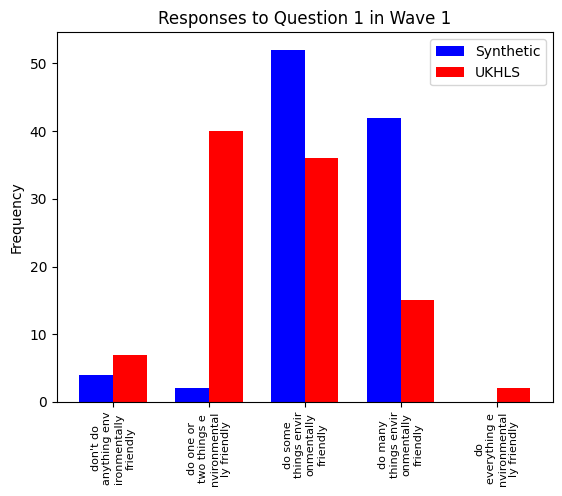

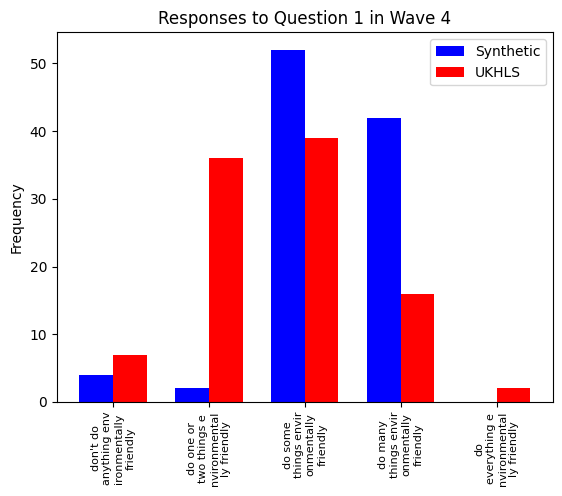

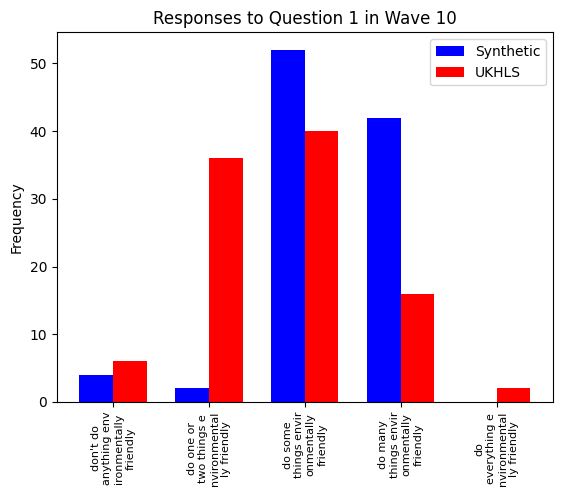

In [232]:
simulate_environmental_responses(demo_question, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

## Questions

### Question 1: Overall, how positive or negative do you think the effects of climate change will be?

In [233]:
question_one = "Overall, how positive or negative do you think the effects of climate change will be?"
question_number = 2
potential_answers = ["Entirely negative", "More negative than positive", "Neither positive nor negative", "More positive than negative", "Entirely positive"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q1_synthetic_responses.json"
distributions = [q1_human_distribution]
wave_numbers = [1]
is_simulate = False

In [234]:
simulate_environmental_responses(question_one, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

Sample size: 100


### Question 2: Please select the extent to which you agree or disagree with the following statement: My behaviour and everyday lifestyle contribute to climate change. 

In [235]:
question_two = "Please select the extent to which you agree or disagree with the following statement \"My behaviour and everyday lifestyle contribute to climate change.\""
question_number = 3
potential_answers = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q2_synthetic_responses.json"
distributions = [fourth_wave_ukhls_scenv_bccc, tenth_wave_ukhls_scenv_bccc]
wave_numbers = [4, 10]
is_simulate = False

In [236]:
simulate_environmental_responses(question_two, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

Sample size: 100


### Question 3: To which extent strongly do you agree or disagree with the following statement: 'I would be prepared to pay more for environmentally-friendly products.'? Please select one of the following options: 'Strongly Agree', 'Tend to Agree', 'Neither Agree nor Disagree', 'Tend to Disagree', 'Strongly Disagree'. 

In [237]:
question_three = "To which extent strongly do you agree or disagree with the following statement: 'I would be prepared to pay more for environmentally-friendly products.'? Please select one of the following options: 'Strongly Agree', 'Tend to Agree', 'Neither Agree nor Disagree', 'Tend to Disagree', 'Strongly Disagree'."
question_number = 4
potential_answers = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q3_synthetic_responses.json"
distributions = [fourth_wave_scenv_pmep_probability_distribution, tenth_wave_scenv_pmep_probability_distribution]
wave_numbers = [4, 10]
is_simulate = False

Sample size: 100


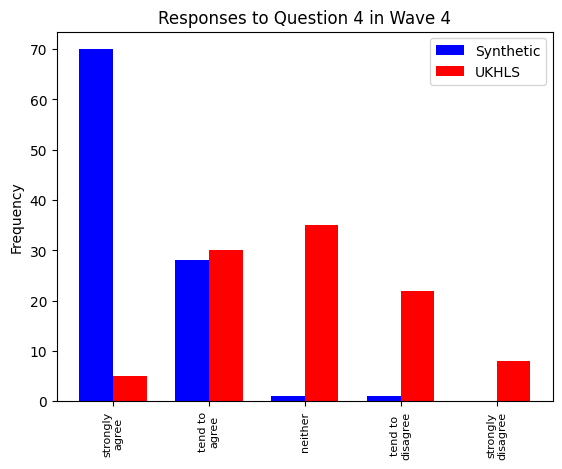

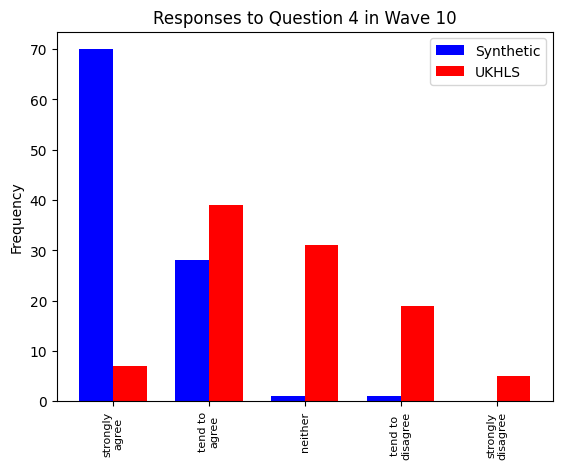

In [238]:
simulate_environmental_responses(question_three, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

### Question 4: Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?

In [239]:
question_four = "Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?"
question_number = 5
potential_answers = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Already Changed"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q4_synthetic_responses.json"
distributions = [br_openvb_distribution]
wave_numbers = [18]
is_simulate = False

Sample size: 100


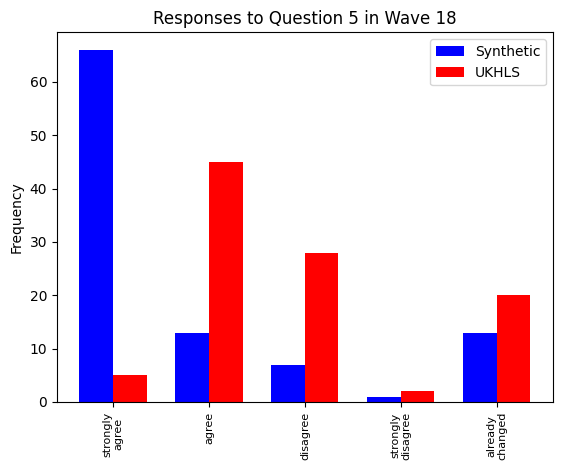

In [240]:
simulate_environmental_responses(question_four, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

### Question 5: If things continue on their current course, will there be an environmental disaster? 

In [241]:
question_five = "If things continue on their current course, will there be an environmental disaster?"
question_number = 6
potential_answers = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q5_synthetic_responses.json"
distributions = [fourth_wave_scenv_meds_probability_distribution, tenth_wave_scenv_meds_probability_distribution]
wave_numbers = [4, 10]
is_simulate = False # set the is_simulate flag to determine whether to simulate responses or only to view the distributions

Sample size: 100


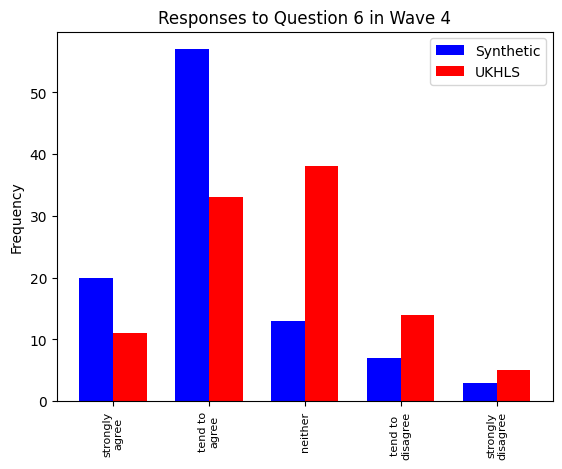

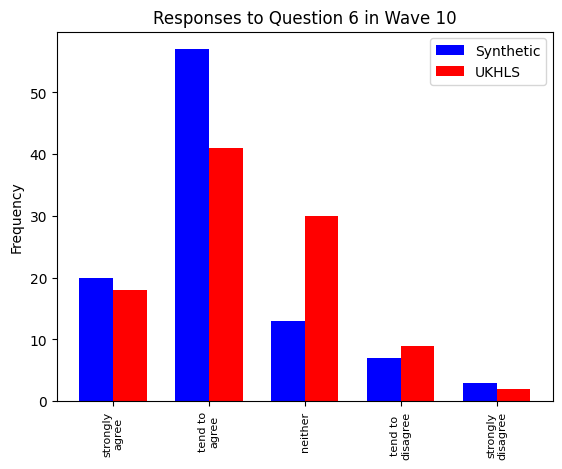

In [242]:
simulate_environmental_responses(question_five, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

### Question 6: Does your household buy or considering buying electricity on a Green Tariff? By Green Tariff, we mean a payment scheme where your electricity supplier provides electricity from renewable sources such as wind power to the National Grid for the amount you use. 

In [243]:
question_six = "Does your household buy or considering buying electricity on a Green Tariff? By Green Tariff, we mean a payment scheme where your electricity supplier provides electricity from renewable sources such as wind power to the National Grid for the amount you use. "
question_number = 7
potential_answers = ["Yes - already buy", "Yes - seriously considering", "No", "Considered and rejected"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q6_synthetic_responses.json"
distributions = [first_wave_etariff_probability_distribution, fourth_wave_etariff_probability_distribution, tenth_wave_etariff_probability_distribution, thirteenth_wave_etariff_probability_distribution]
wave_numbers = [1, 4, 10, 13]
is_simulate = False

Sample size: 100


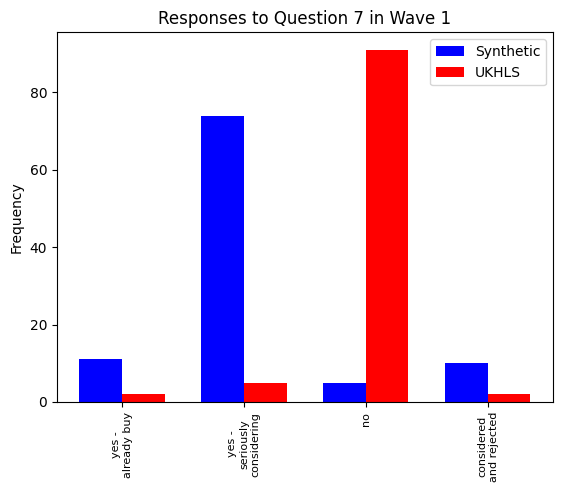

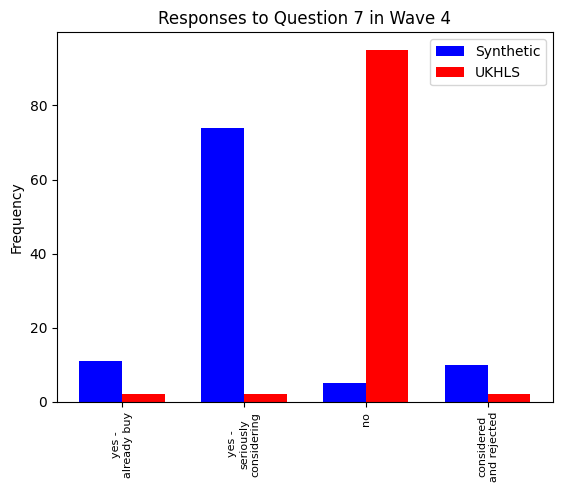

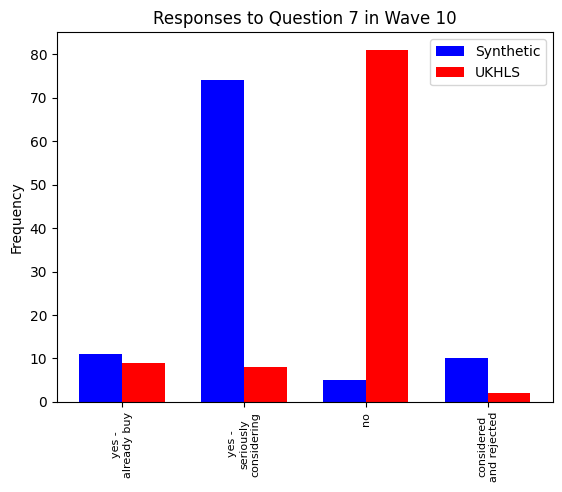

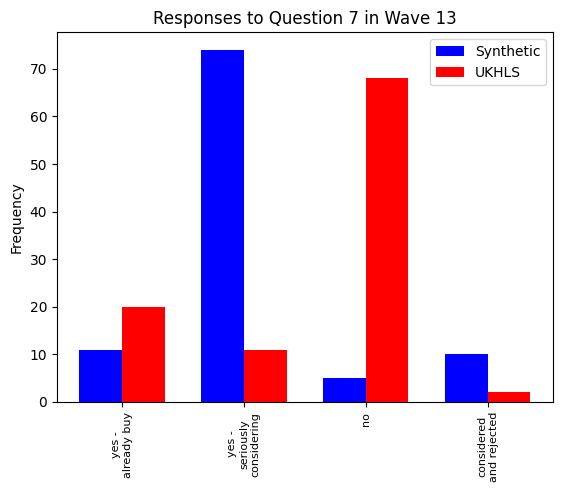

In [244]:
simulate_environmental_responses(question_six, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

### Question 7: Does your accommodation experience pollution cause by traffic or industry?

In [245]:
question_seven = "Does your accommodation experience pollution cause by traffic or industry?"
question_number = 8
potential_answers = ["Yes", "No"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q7_synthetic_responses.json"
distributions = [third_wave_grimyn_probability_distribution, sixth_wave_grimyn_probability_distribution, ninth_wave_grimyn_probability_distribution, twelfth_wave_grimyn_probability_distribution]
wave_numbers = [3, 6, 9, 12]
is_simulate = False

Sample size: 100


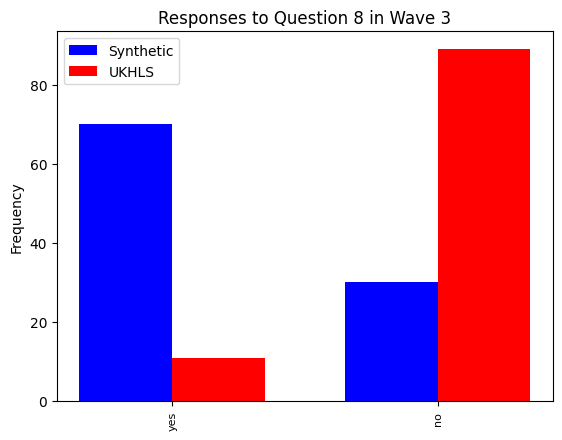

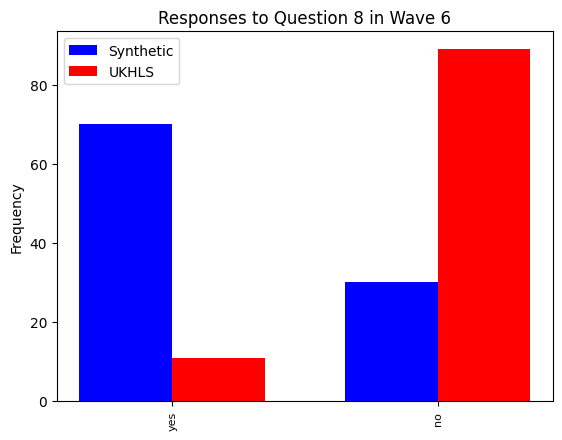

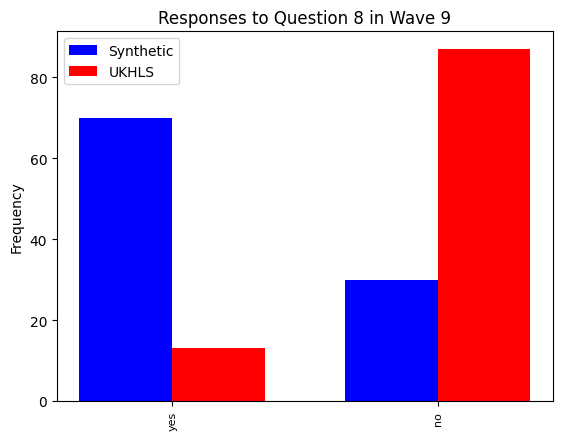

In [246]:
simulate_environmental_responses(question_seven, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

### Question 8: Based on your profile, please state your opinion about joining environmental organisations.

In [247]:
question_eight = "Based on your profile, please state your opinion about joining environmental organisations."
question_number = 9
potential_answers = ["Mentioned", "Not Mentioned"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q8_synthetic_responses.json"
distributions = [third_wave_orga3_probability_distribution, sixth_wave_orga3_probability_distribution, ninth_wave_orga3_probability_distribution, twelfth_wave_orga3_probability_distribution]
wave_numbers = [3, 6, 9, 12]
is_simulate = False

Sample size: 100


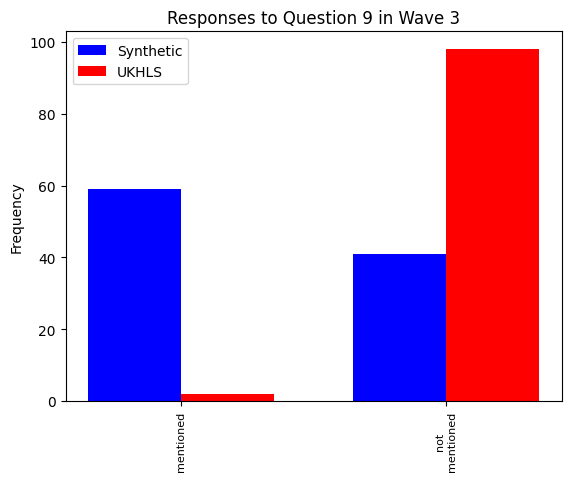

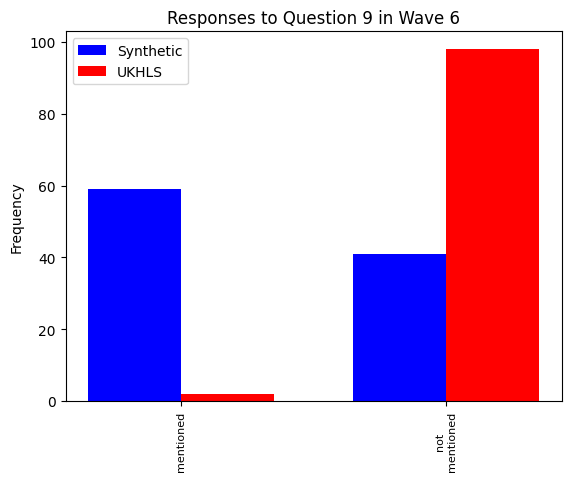

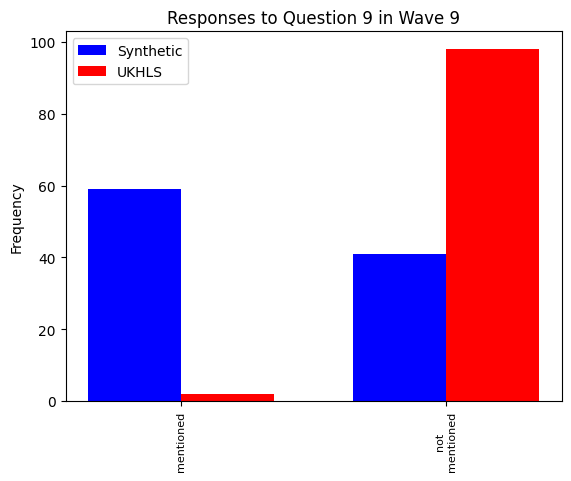

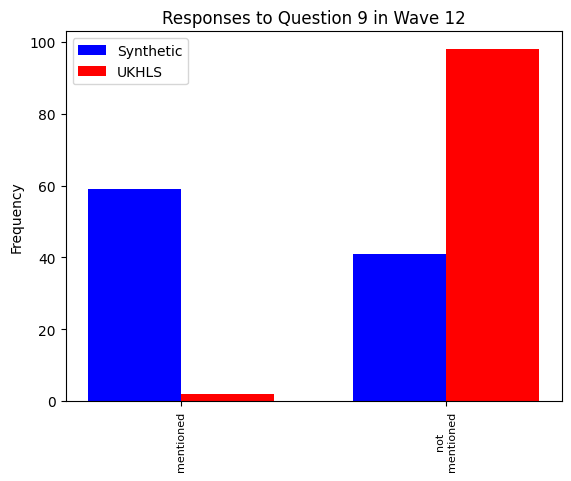

In [248]:
simulate_environmental_responses(question_eight, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

### Question 9: Based on your profile, to which extent do you believe that climate change is controllable? 

In [249]:
question_nine = "Based on your profile, to which extent do you believe that climate change is controllable?"
question_number = 10
potential_answers = ["Strong Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 10
json_filepath = "Synthetic-Responses-JSON/q9_synthetic_responses.json"
distributions = [fourth_wave_scenv_tlat_probability_distribution, tenth_wave_scenv_tlat_probability_distribution, ninth_wave_orga3_probability_distribution, twelfth_wave_orga3_probability_distribution]
wave_numbers = [4, 10]
is_simulate = False

Sample size: 100


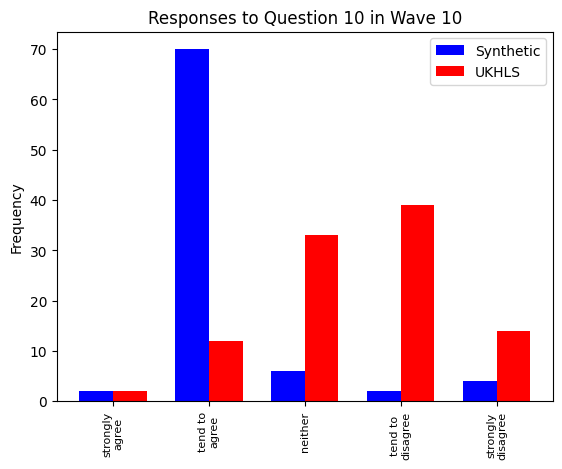

In [250]:
simulate_environmental_responses(question_nine, question_number, potential_answers, n_samples, json_filepath, distributions, wave_numbers, 1, is_simulate) # run a test to simulate synthetic responses to specific questions about environmental issues

## Hypothesis Testing

### Stata Data Loading

In [251]:
def load_stata_file(file_path):

    stata_file = pd.read_stata(file_path)

    return stata_file

#### Demo Question: And which of these would you say best describes your current lifestyle?

In [252]:
demo_question_stata_file_path = "Stata-Results/UKHLS_demo_responses.dta"

stata_demo_question_responses = load_stata_file(demo_question_stata_file_path)

### Stata Data Preprocessing

In [253]:
# lists to map the different education levels to standardise comparison between different education levels. 
no_formal_education_list = ["None of the above"]

secondary_education_list = [
    "GCSE / O Level", "A Level", "AS Level", "Credit Standard Grade / Ordinary (O) Grade (National 5 / Intermediate 2)",
    "CSE", "Other school (inc. school leaving exam certificate or matriculation)", "Higher Grade",
    "General Standard Grade (National 4 / Intermediate 1)", "Foundation Standard Grade (National 3 / Access 3)",
    "Advanced Higher / Scottish Baccalaureate", "Advanced Higher", "International Baccalaureate",
    "Certificate of sixth year studies"
]

post_secondary_education_list = [
    "Diploma in higher education", "Foundation degree", "Access to Higher Education (HE) Diploma",
    "Teaching qualification (excluding PGCE)", "Teach qual prim (excl PGCE)", "Teach qual sec/further ed (excel PGCE)"
]

higher_education_list = [
    "University Higher Degree (e.g. MSc, PhD)", "First degree level qualification including foundation degrees, graduate membership of a professional Institute, PGCE",
    "First degree level qualification (e.g., BA, BSc)", "PGCE or equivalent", "Nursing or other medical qualification not yet mentioned"
]

In [254]:
# split the data by wavename
# check the wavename value counts
wavename_value_counts = stata_demo_question_responses["wavename"].value_counts()

print(wavename_value_counts)

8.0     56608
9.0     52694
10.0    50113
Name: wavename, dtype: int64


In [255]:
# split the data into eighth, ninth, and tenth waves
stata_demo_question_responses_wave_eight, stata_demo_question_responses_wave_nine, stata_demo_question_responses_wave_ten = [stata_demo_question_responses[stata_demo_question_responses["wavename"] == wavename] for wavename in [8.0, 9.0, 10.0]]

#### Removing Redundant Data

In [256]:
def removing_irrelevant_columns(data):

    data = data.drop(columns=["pidp", "hidp", "fihhmnlabgrs_dv"])

    return data

In [257]:
def removing_nan_columns(data):

    nan_columns = data.columns[data.isnull().any()].tolist() # get a list of column names in data with nan values.

    data = data.dropna(subset=nan_columns) # remove nan values from the data

    return data

In [258]:
def count_invalid_values(special_values, column_data):
    count = 0
    
    for value in column_data:
        # if the value is a string and it is in the special values list
        if isinstance(value, str) and value.lower() in special_values:
            count += 1
        elif value in special_values:
            count += 1

#### Imputation

In [259]:
def get_preprocessed_distribution(distribution):

    # remove responses containing "inapplicable" from the data distribution
    distribution = distribution[distribution != "inapplicable"]

    # recalculate the probability distribution of the distribution
    probability_distribution = distribution.value_counts(normalize=True).to_dict()

    # remove probabilities with values of 0
    probability_distribution = {key: value for key, value in probability_distribution.items() if value != 0}

    return probability_distribution

In [260]:
def impute_missing_responses(distribution, prob_distribution):
    # Identify the indices of the "missing", "don't know", and "refusal" responses
    indices_to_impute = distribution[(distribution == "inapplicable")].index

    # List of values and their corresponding probabilities
    values = list(prob_distribution.keys())
    probabilities = list(prob_distribution.values())

    # Randomly assign values based on the probability distribution
    imputed_values = np.random.choice(values, size=len(indices_to_impute), p=probabilities)

    # Ensure that all imputed values are valid categories in the distribution
    all_categories = set(distribution.cat.categories).union(values)
    
    distribution = distribution.cat.set_categories(all_categories)

    for i, index in enumerate(indices_to_impute):
        try:
            distribution.loc[index] = imputed_values[i]
        except Exception as e:
            pass

    return distribution

In [261]:
def remove_invalid_responses(data, column):

    column_data = data[column] # get the column data

    special_values = ["invalid", "refusal", "don't know", "missing"]
    
    count_invalid_values(special_values, column_data)

    # remove the entries with invalid responses
    data = data[~column_data.isin(special_values)]

    column_data = data[column] # get the column data
    
    count_invalid_values(special_values, column_data)

    return data

#### Encoding

In [262]:
def numerical_mapping(data, column):

    if column == "qfhigh":

        data[column] = data[column].replace(19.0, "PGCE or equivalent")

        data[column] = data[column].replace(20.0, "First degree level qualification (e.g., BA, BSc)")

        data[column] = data[column].replace(21.0, "Foundation degree")

        data[column] = data[column].replace(22.0, "Teach qual sec/further ed (excel PGCE)")

        data[column] = data[column].replace(23.0, "Teach qual prim (excl PGCE)")

        data[column] = data[column].replace(24.0, "Access to Higher Education (HE) Diploma")

        data[column] = data[column].replace(25.0, "Advanced Higher")

    if column == "vote3":

        data[column] = data[column].replace(14, "Brexit Party")

        data[column] = data[column].replace(15, "Change UK Party")

    return data

In [263]:
# Define mapping function
def map_qualification(response):
    if response in no_formal_education_list:
        return "No formal education"
    elif response in secondary_education_list:
        return "Secondary education"
    elif response in post_secondary_education_list:
        return "Post-secondary education"
    elif response in higher_education_list:
        return "Higher education"
    else:
        return response

In [264]:
def simplify_qualification(data_column):

    data_column = data_column.apply(map_qualification)

    return data_column
    

In [265]:
def simplify_voting_intention(data_column):

    # print(data_column.unique())

    # initialise a list storing a list of other parties as a list data_column.unique after removing "Conservatives", "Labour", "Scottish National Party" and "Liberal Democrats"
    other_party_list = [party for party in data_column.unique() if party not in ["Conservatives", "Labour", "Liberal Democrat"]]

    # replace the other parties with "Other"
    data_column = data_column.replace(other_party_list, "Other")

    return data_column

In [266]:
def simplify_marital_status(data_column):
    
    marital_status_map = {
        "Single, nvr marr/civ p": "Single",
        "Separated legally marr": "Separated",
        "Sep from Civil Partner ": "Separated",
        "Civil Partner (legal)": "Civil Partner"
    }

    # apply the mapping to the marital status column
    data_column = data_column.replace(marital_status_map)

    return data_column

In [267]:
def ethnicity_simplification(data_column):
    
    data_column = data_column.replace("british/english/scottish/welsh/northern irish (white)", "British")

    data_column = data_column.replace("indian (asian or asian british)", "Indian")

    data_column = data_column.replace("pakistani (asian or asian british)", "Pakistani")

    data_column = data_column.replace("any other white background (white)", "Other Ethnicities")

    data_column = data_column.replace("bangladeshi (asian or asian british)", "Bangladeshi")

    data_column = data_column.replace("chinese (asian or asian british)", "Chinese")

    data_column = data_column.replace("irish (white)", "Irish")

    data_column = data_column.replace("african (black or black britih)", "African")

    data_column = data_column.replace("caribbean (black or black british)", "Caribbean")

    data_column = data_column.replace("any other asian background (asian or asian british)", "Other Ethnicities")

    data_column = data_column.replace("any other black background (black or black britih)", "Other Ethnicities")

    data_column = data_column.replace("white and asian (mixed)", "Mixed")

    data_column = data_column.replace("white and black african (mixed)", "Mixed")

    data_column = data_column.replace("white and black caribbean (mixed)", "Mixed")

    data_column = data_column.replace("arab (other ethnic group)", "Arab")

    data_column = data_column.replace("any other ethnic group (other ethnic group)", "Mixed")

    data_column = data_column.replace("any other mixed background (mixed)", "Mixed")

    return data_column

In [268]:
simplified_series = ethnicity_simplification(stata_demo_question_responses_wave_ten["racel_dv"])
print(simplified_series.value_counts())

British              26319
Indian                1367
Other Ethnicities     1317
Pakistani             1315
Mixed                  770
Bangladeshi            708
Irish                  705
African                702
Caribbean              579
missing                297
Chinese                129
Arab                   111
Name: racel_dv, dtype: int64


In [269]:
def category_simplification(data, column):

    if column == "qfhigh":

        data[column] = simplify_qualification(data[column])

    if column == "vote3":

        data[column] = simplify_voting_intention(data[column])

    if column == "marstat":

        data[column] = simplify_marital_status(data[column])

    if column == "racel_dv":

        data[column] = ethnicity_simplification(data[column])

    return data

#### Preprocessing Pipeline

In [270]:
def preprocess_stata_data(data):

    data = removing_irrelevant_columns(data) # removing irrelevant columns from the data. 

    data = removing_nan_columns(data) # remove nan values from the data

    # get a list of column names for the data
    columns = data.columns

    for column in columns:
        data = remove_invalid_responses(data, column)

        if column == "scenv_crlf":
            # remove responses containing proxy and inapplicable from the data
            data = data[~data[column].isin(["proxy", "inapplicable"])]

    qualification_probability_distribution = get_preprocessed_distribution(data["qfhigh"])

    data["qfhigh"] = impute_missing_responses(data["qfhigh"], qualification_probability_distribution)

    number_of_children_distribution = get_preprocessed_distribution(data["lnprnt"])

    data["lnprnt"] = impute_missing_responses(data["lnprnt"], number_of_children_distribution)

    for column in columns:
        data = numerical_mapping(data, column)

        data = category_simplification(data, column)

    return data

In [271]:
stata_demo_question_responses_wave_ten_demo = preprocess_stata_data(stata_demo_question_responses_wave_ten)

In [272]:
# compare the size of stata_demo_question_responses_wave_ten and stata_demo_question_responses_wave_ten_demo
print(stata_demo_question_responses_wave_ten.shape)
print(stata_demo_question_responses_wave_ten_demo.shape)

(50113, 16)
(11666, 13)


In [273]:
# displaying stata_demo_question_responses_wave_ten_demo columns
print(stata_demo_question_responses_wave_ten_demo.columns)

Index(['sex', 'marstat', 'qfhigh', 'racel_dv', 'lnprnt', 'age_dv', 'gor_dv',
       'urban_dv', 'agegr10_dv', 'jbnssec_dv', 'wavename', 'vote3',
       'scenv_crlf'],
      dtype='object')


In [274]:
print(stata_demo_question_responses_wave_ten_demo['vote3'].value_counts())

Other                     7259
Labour                    1992
Conservatives             1544
Liberal Democrat           871
missing                      0
proxy                        0
refusal                      0
don't know                   0
Ulster Unionist              0
sdlp                         0
Democratic Unionist          0
Sinn Fein                    0
British National Party       0
Name: vote3, dtype: int64


In [275]:
# check the scenv_crlf value counts for the UKHLS data
print(stata_demo_question_responses_wave_ten_demo['scenv_crlf'].value_counts())

I do quite a few things that are environmentally-friendly      4743
I do one or two things that are environmentally-friendly       4045
I'm environmentally-friendly in most things I do               1928
I don't really do anything that is environmentally-friendly     684
I'm environmentally-friendly in everything I do                 266
missing                                                           0
inapplicable                                                      0
proxy                                                             0
refusal                                                           0
don't know                                                        0
Name: scenv_crlf, dtype: int64


In [276]:
print(stata_demo_question_responses_wave_ten_demo['racel_dv'].value_counts())

British              8223
Indian                732
Pakistani             667
Other Ethnicities     624
African               347
Mixed                 328
Caribbean             280
Bangladeshi           253
Irish                  79
Arab                   75
Chinese                58
missing                 0
Name: racel_dv, dtype: int64


### Visualising Responses to Demo Question by Profiling Variables

#### Voting Intentions

In [277]:
# split the data into political party responses to see how different political parties respond to the demo question
conservative_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['vote3'] == "Conservatives"]

labour_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['vote3'] == "Labour"]

lib_dem_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['vote3'] == "Liberal Democrat"]

other_party_responses = stata_demo_question_responses_wave_ten_demo[~stata_demo_question_responses_wave_ten_demo['vote3'].isin(["Conservative", "Labour", "Liberal Democrat"])]

In [278]:
# remove the responses with 0 values from conservative responses, labour responses, lib dem responses, and other party responses
conservative_responses = conservative_responses[conservative_responses['scenv_crlf'] != 0]
labour_responses = labour_responses[labour_responses['scenv_crlf'] != 0]
lib_dem_responses = lib_dem_responses[lib_dem_responses['scenv_crlf'] != 0]
other_party_responses = other_party_responses[other_party_responses['scenv_crlf'] != 0]

In [279]:
# plot visualisation of the responses to the demo question based on political party affiliation
def plot_ukhls_responses_by_group(responses, variable, question):
    """
    Description: A function to plot the responses to the demo question based on political party affiliation.

    Parameters:
    • responses: list of responses 
    • variable: the variable to group the responses by to help determine the image name
    • question: the question to which the responses belong to determine which folder to store the image

    Returns:
    None - this function plots the responses based on political party affiliation.
    """
    if question == "Demo":
        question_name = "Demo Question"
        folder_name = "scenv_crlf"
    else:
        question_name = ""
        folder_name = ""

    # initialise a response type variable to store the type of values produced in the responses as a list
    response_types = []

    # iterate through the conservative responses to get the response types
    for response in responses[0]['scenv_crlf']:

        # if the response is not in the response types list, add it. if the response is proxy or inapplicable, do not add it to the response types list
        if response not in response_types and response not in ["proxy", "inapplicable"]:

            response_types.append(response)

    # remove nan values from the response types list
    response_types = [response for response in response_types if str(response) != 'nan' and str(response) != 'proxy' and str(response) != 'inapplicable']

    # sort the response types in this order:
    response_types = sorted(response_types, key=lambda x: len(x), reverse=True)

    responses_dict = []

    for response in responses:

        response_dict = response['scenv_crlf'].value_counts().to_dict()

        response_dict = {key: value for key, value in response_dict.items() if value != 0}

        responses_dict.append(response_dict)

    if variable == "Party":
        # initialise a list to store the party names
        names = ["Conservatives", "Labour", "Liberal Democrat"]

        # initialise a list to store the party colours
        colours = ["blue", "red", "orange"]

    if variable == "Qualification":

        names = ["No formal education", "Secondary education", "Post-secondary education", "Higher education"]

        colours = ["blue", "red", "orange", "green"]

    if variable == "Number of Children":

        names = ["One child", "Two children", "Three children", "Four children", "Four or more children"]

        colours = ["red", "orange", "green", "purple", "brown"]

    if variable == "Gender":

        names = ["Male", "Female"]

        colours = ["blue", "red"]

    # initialise the titles of the axis
    x_label = "Responses"

    y_label = "Frequency"

    # initialise the title of the plot
    title = f"Responses to the {question} Question by {variable}"

    # initialise the figure and axis
    fig, ax = plt.subplots()

    x = range(len(response_types))

    if variable == "Number of Children":
        width = 0.15
    else:
        width = 0.2

    rects = []

    # remove "inapplicable" and "proxy" from responses_dict[0]
    responses_dict[0].pop("inapplicable", None)
    responses_dict[0].pop("proxy", None)

    rect1 = ax.bar(x, responses_dict[0].values(), width, color=colours[0], label=names[0])
    rects.append(rect1)

    for i in range(1, len(colours)):
        responses_dict[i].pop("inapplicable", None)
        responses_dict[i].pop("proxy", None) # remove "inapplicable" and "proxy" as invalid values from responses_dict[i]
        rect = ax.bar([p + width * i for p in x], responses_dict[i].values(), width, color=colours[i], label=names[i])
        rects.append(rect)

    # set the x-axis label
    ax.set_xlabel(x_label)

    # set the y-axis label
    ax.set_ylabel(y_label)

    # set the title of the plot
    ax.set_title(title)

    response_types = ['\n'.join(wrap(l, 12)) for l in response_types]

    ax.set_xticks([p + width for p in x])

    # set the x-axis ticks
    ax.set_xticklabels(response_types, rotation=90, fontsize=8)

    # display the legend
    ax.legend()

    plt.savefig(f"Figures/Environmental-Views-Variables/{folder_name}/Demo-Question-Responses-by-{variable}.png", bbox_inches='tight')

    plt.show()

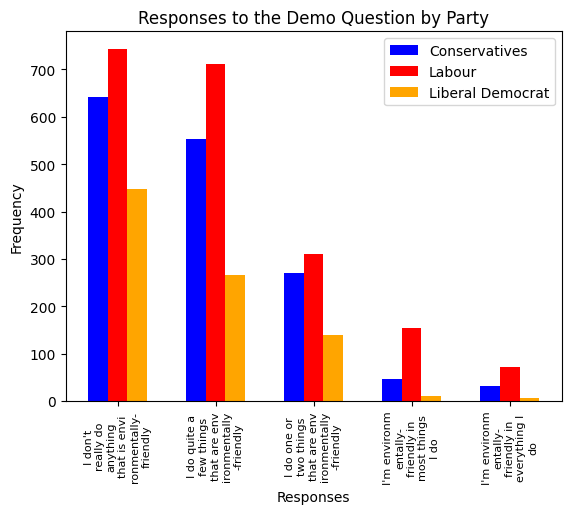

In [280]:
demo_responses_by_party = [conservative_responses, labour_responses, lib_dem_responses]
# Assuming `conservative_responses`, `labour_responses`, `lib_dem_responses`, and `other_party_responses` are defined DataFrames with 'scenv_crlf' column
plot_ukhls_responses_by_group(demo_responses_by_party, "Party", "Demo")

#### Qualifications

In [281]:
no_qualification_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['qfhigh'] == "No formal education"]

secondary_education_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['qfhigh'] == "Secondary education"]

post_secondary_education_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['qfhigh'] == "Post-secondary education"]

higher_education_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['qfhigh'] == "Higher education"]

In [282]:
demo_responses_by_qualifications = [no_qualification_responses, secondary_education_responses, post_secondary_education_responses, higher_education_responses]

In [283]:
plot_ukhls_responses_by_group(demo_responses_by_qualifications, "Qualification", "Demo")

#### Number of Children

In [284]:
# display the response distribution of number of children "lnprnt" in the UKHLS data
print(stata_demo_question_responses_wave_ten_demo['lnprnt'].value_counts())

2.0             3808
1.0             3751
3.0             2317
4.0              774
6.0              743
5.0              273
inapplicable       0
7.0                0
8.0                0
9.0                0
10.0               0
11.0               0
don't know         0
refusal            0
Name: lnprnt, dtype: int64


In [285]:
one_child_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['lnprnt'] == 1]
two_children_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['lnprnt'] == 2]
three_children_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['lnprnt'] == 3]
four_children_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['lnprnt'] == 4]
more_than_four_children_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['lnprnt'] > 4]

In [286]:
demo_responses_by_children = [one_child_responses, two_children_responses, three_children_responses, four_children_responses, more_than_four_children_responses]

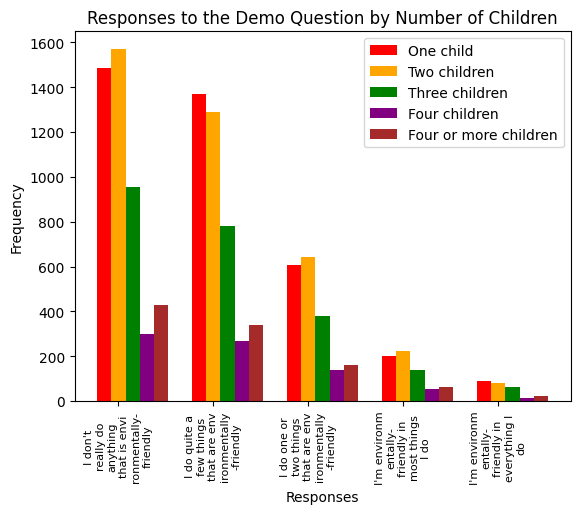

In [287]:
plot_ukhls_responses_by_group(demo_responses_by_children, "Number of Children", "Demo")

#### Gender

In [288]:
male_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo["sex"] == "male"]
female_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo["sex"] == "female"]

In [289]:
demo_responses_by_gender = [male_responses, female_responses]

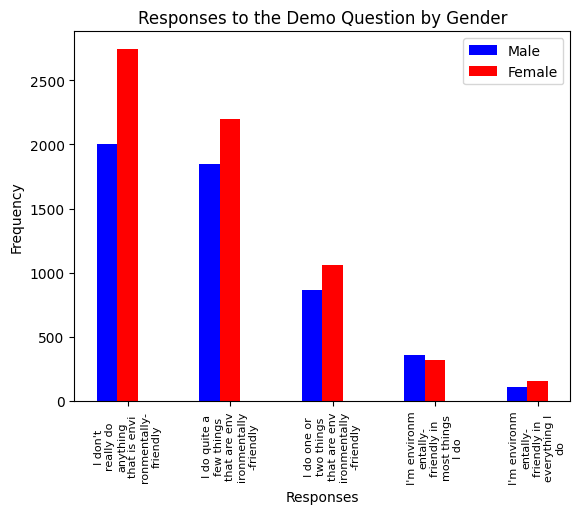

In [290]:
plot_ukhls_responses_by_group(demo_responses_by_gender, "Gender", "Demo")

#### Visualise Demo Profile and Responses

In [291]:
# initialise a random number between 0 and the length of stata_demo_question_responses_wave_ten_demo - 1
random_index = random.randint(0, len(stata_demo_question_responses_wave_ten_demo) - 1)

# get the random row from stata_demo_question_responses_wave_ten_demo
random_row = stata_demo_question_responses_wave_ten_demo.iloc[random_index]

In [292]:
# display random row
print(random_row)

sex                                                        male
marstat                                                 Married
qfhigh                                      Secondary education
racel_dv                                                British
lnprnt                                                      1.0
age_dv                                                     56.0
gor_dv                                            West Midlands
urban_dv                                             rural area
agegr10_dv                                      50-59 years old
jbnssec_dv       4.2 Lower prof./higher techn.: 'new' employees
wavename                                                   10.0
vote3                                             Conservatives
scenv_crlf    I do quite a few things that are environmental...
Name: 156075, dtype: object


In [293]:
def generate_gender_substring(gender):

    return f"I am {gender}."

In [294]:
def generate_marital_status_substring(marital_status):

    return f"My marital status is {marital_status}."

In [295]:
def generate_qualification_substring(highest_qualification):

    highest_qualification_prompt = "In terms of my qualifications, "

    if highest_qualification == "None":
        highest_qualification_prompt += "I do not have any qualifications."
    else: 
        highest_qualification_prompt += f"My highest qualification is {highest_qualification}."

    return highest_qualification_prompt

In [296]:
def generate_ethnicity_substring(ethnic_group):
    ethnic_group_prompt = f"Racially, I am {ethnic_group}."

    return ethnic_group_prompt

In [297]:
def generate_number_of_children_substring(number_of_children):

    if number_of_children == "1":
        number_of_children_prompt = "I have 1 child."
    elif number_of_children == "0":
        number_of_children_prompt = "I do not have any children."
    else:
        number_of_children_prompt = f"I have {number_of_children} children."

    return number_of_children_prompt

In [298]:
def generate_region_substring(region):

    region_prompt = f"I live in the {region}."

    return region_prompt

In [299]:
def generate_urban_rural_substring(urban_rural):

    if urban_rural == "Urban":
        urban_rural_prompt = "I live in an urban area."
    else:
        urban_rural_prompt = "I live in a rural area."

    return urban_rural_prompt

In [300]:
def generate_agegroup_substring(age_group):

    age_group_prompt = f"In terms of my age, my age group is {age_group}."

    return age_group_prompt

In [301]:
def generate_job_substring(current_job):

    return generate_current_job_prompt(current_job_probability_distribution_dicts[len(current_job_probability_distribution_dicts) - 1])

In [302]:
def generate_voting_intention_substring(voting_intention):

    if "Party" in voting_intention:
        voting_intention_prompt = f"Ideologically, I describe myself as a {voting_intention} supporter."
    else:
        voting_intention_prompt = f"Ideologically, I describe myself as a {voting_intention} Party supporter."

    return voting_intention_prompt

In [303]:
def generating_income_substring(role):

    if role == 'Higher Managerial and Administrative':
        random_income = random.randint(10000, 12500)
    elif role == 'Large Establishments':
        random_income = random.randint(9167, 11667)
    elif role == 'Higher Professional':
        random_income = random.randint(8333, 10833)
    elif role == 'Lower Managerial and Supervisory':
        random_income = random.randint(6667, 9167)
    elif role == 'Lower Professional and Technical':
        random_income = random.randint(5833, 8333)
    elif role == 'Intermediate Occupations':
        random_income = random.randint(5000, 7500)
    elif role == 'Lower Supervisory and Technical':
        random_income = random.randint(4167, 6667)
    elif role == 'Small Establishments and Own Account Workers':
        random_income = random.randint(3333, 5833)
    elif role == 'Semi-Routine Occupations':
        random_income = random.randint(2917, 5417)
    elif role == 'Routine Occupations':
        random_income = random.randint(2500, 5000)
    else:
        random_income = random.randint(2500, 5000)

    random_income = round(random_income, 2)

    income_prompt = f"Financially, my monthly income is £{random_income}."

    return income_prompt

In [304]:
def visualise_profile_and_opinion_string(profile, response_variable, opinion):

    gender_substring = generate_gender_substring(profile["sex"])

    marital_status_substring = generate_marital_status_substring(profile["marstat"])

    qualification_substring = generate_qualification_substring(profile["qfhigh"])

    ethnicity_substring = generate_ethnicity_substring(profile["racel_dv"])

    number_of_children_substring = generate_number_of_children_substring(profile["lnprnt"])

    region_substring = generate_region_substring(profile["gor_dv"])

    urban_rural_substring = generate_urban_rural_substring(profile["urban_dv"])

    agegroup_substring = generate_agegroup_substring(profile["agegr10_dv"])

    job_substring = generate_job_substring(profile["jbnssec_dv"])

    voting_intention_substring = generate_voting_intention_substring(profile["vote3"])

    income_substring = generating_income_substring(profile["jbnssec_dv"])

    opinion_substring = opinion

    # concatenate the substrings to form the profile and opinion string
    profile_string = f"{gender_substring} {marital_status_substring} {qualification_substring} {ethnicity_substring} {number_of_children_substring} {region_substring} {urban_rural_substring} {agegroup_substring} {job_substring} {voting_intention_substring} {income_substring}" 

    if response_variable == "scenv_crlf":

        profile_string += "When I asked to write my response to the question, \"And which of these would you say best describes your current lifestyle?\", I respond with: "

    return profile_string, opinion_substring

In [305]:
def visualise_ukhls_profile_and_response(data, response_variable):
    # first initialise profile as data columns except the variable "scenv_crlf"
    profile = data.drop(columns=[response_variable])

    # initialise the response as the variable "scenv_crlf"
    opinion = data[response_variable]

    profile_string, opinion_string = visualise_profile_and_opinion_string(profile, response_variable, opinion)

    return profile_string, opinion_string

In [306]:
visualise_ukhls_profile_and_response(random_row, "scenv_crlf")

('I am male. My marital status is Married. In terms of my qualifications, My highest qualification is Secondary education. Racially, I am British. I have 1.0 children. I live in the West Midlands. I live in a rural area. In terms of my age, my age group is 50-59 years old. My profession is Routine Occupations. Ideologically, I describe myself as a Conservatives Party supporter. Financially, my monthly income is £4111.When I asked to write my response to the question, "And which of these would you say best describes your current lifestyle?", I respond with: ',
 'I do quite a few things that are environmentally-friendly')

In [307]:
print(stata_demo_question_responses_wave_ten_demo['scenv_crlf'].value_counts())

I do quite a few things that are environmentally-friendly      4743
I do one or two things that are environmentally-friendly       4045
I'm environmentally-friendly in most things I do               1928
I don't really do anything that is environmentally-friendly     684
I'm environmentally-friendly in everything I do                 266
missing                                                           0
inapplicable                                                      0
proxy                                                             0
refusal                                                           0
don't know                                                        0
Name: scenv_crlf, dtype: int64


In [308]:
# Define the list of acceptable response options
demo_response_options = [
    "I don't really do anything that is environmentally-friendly",
    "I do one or two things that are environmentally-friendly",
    "I do quite a few things that are environmentally-friendly",
    "I'm environmentally-friendly in most things I do",
    "I'm environmentally-friendly in everything I do"
]

# split the data by responses: "Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"
dont_do_anything_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['scenv_crlf'] == "I don't really do anything that is environmentally-friendly"]

do_one_or_two_things_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['scenv_crlf'] == "I do one or two things that are environmentally-friendly"]

do_some_things_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['scenv_crlf'] == "I do quite a few things that are environmentally-friendly"]

do_many_things_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['scenv_crlf'] == "I'm environmentally-friendly in most things I do"]

do_everything_responses = stata_demo_question_responses_wave_ten_demo[stata_demo_question_responses_wave_ten_demo['scenv_crlf'] == "I'm environmentally-friendly in everything I do"]

In [309]:
def write_balanced_responses_to_json(input_data, variable_name):

    num_rows = input_data.shape[0]

    print(num_rows)
    
    unique_indices = random.sample(range(num_rows), 10)

    # generate 10 random responses for each response type

    for random_index in unique_indices:
        random_row = input_data.iloc[random_index]
        profile_string, opinion_string = visualise_ukhls_profile_and_response(random_row, variable_name)

        if variable_name == "scenv_crlf":

            # write the profile and opinion to a json file
            with open("Stata-Results/stata_demo_question_responses_wave_ten_demo.json", "r") as file:
                output_data = json.load(file)

            output_data["profiles"].append(profile_string)
            output_data["opinions"].append(opinion_string)
            
            with open("Stata-Results/stata_demo_question_responses_wave_ten_demo.json", "w") as file:
                json.dump(output_data, file, indent=4)

In [310]:
write_balanced_responses_to_json(dont_do_anything_responses, "scenv_crlf")
write_balanced_responses_to_json(do_one_or_two_things_responses, "scenv_crlf")
write_balanced_responses_to_json(do_some_things_responses, "scenv_crlf")
write_balanced_responses_to_json(do_many_things_responses, "scenv_crlf")
write_balanced_responses_to_json(do_everything_responses, "scenv_crlf")

684
4045
4743
1928
266


In [414]:
# convert "Stata-Results/stata_demo_question_responses_wave_ten_demo.json" to "Stata-Results/stata_demo_question_responses_wave_ten_demo.jsonl"
def convert_json_to_jsonl(json_file_path, jsonl_file_path):
    # format the responses in this structure "{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, {"role": "user", "content": "What's the capital of France?"}, {"role": "assistant", "content": "Paris, as if everyone doesn't know that already."}]}"
    with open(json_file_path, "r") as file:
        data = json.load(file)

    # {"role": "system", "content": "You are a happy assistant that puts a positive spin on everything."}
    # {"role": "user", "content": "I fell off my bike today."}

    with open(jsonl_file_path, "w") as file:
        for i in range(len(data["profiles"])):
            # Prepare system prompt
            system_prompt = {"role": "system", "content": data["profiles"][i]}
            
            # Prepare assistant response
            assistant_response = {"role": "assistant", "content": data["opinions"][i]}

            # Create a message list and wrap it in a dictionary
            message_dict = {"messages": [system_prompt, assistant_response]}
            
            # Dump the dictionary as a JSON formatted string to the JSONL file
            json.dump(message_dict, file)
            file.write("\n")

In [415]:
convert_json_to_jsonl("Stata-Results/stata_demo_question_responses_wave_ten_demo.json", "Stata-Results/stata_demo_question_responses_wave_ten_demo.jsonl")

### Demo Decision Tree

In [390]:
# initialise the features and variables as X and y to prepare the data for training
y = stata_demo_question_responses_wave_ten_demo["scenv_crlf"]
X = stata_demo_question_responses_wave_ten_demo.drop(columns=["scenv_crlf"]) 

In [391]:
from sklearn.model_selection import train_test_split

# split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [392]:
# check the value type in every X_train column
print(X_train.dtypes)

sex           category
marstat       category
qfhigh          object
racel_dv      category
lnprnt        category
age_dv        category
gor_dv        category
urban_dv      category
agegr10_dv    category
jbnssec_dv    category
wavename       float32
vote3         category
dtype: object


In [393]:
# introduce preprocessing stage to preprocess the data
from sklearn.preprocessing import OneHotEncoder

# initialise the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# fit the encoder to the categorical columns (object and category types) in the training data
encoder.fit(X_train.select_dtypes(include=['object', 'category']))

# transform the training and validation data
X_train_encoded = encoder.transform(X_train.select_dtypes(include=['object', 'category']))

In [394]:
# import the RandomForestClassifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# initialise the model as a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# fit the model to the training data
model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [396]:
# encode the validation data 
X_val_encoded = encoder.transform(X_val.select_dtypes(include=['object', 'category']))

In [397]:
# test the predict method on the validation data
y_val_pred = model.predict(X_val_encoded)

In [399]:
# display a random prediction feature and label
random_indice = random.randint(0, len(y_val) - 1)

print(f"Random profile: {X_val.iloc[random_indice]}")
print(f"Predicted: {y_val_pred[random_indice]}")
print(f"Actual: {y_val.iloc[random_indice]}")

Random profile: sex                             female
marstat                       Divorced
qfhigh        Post-secondary education
racel_dv                       British
lnprnt                             2.0
age_dv                            87.0
gor_dv                      North West
urban_dv                    urban area
agegr10_dv           70 years or older
jbnssec_dv                inapplicable
wavename                          10.0
vote3                            Other
Name: 147003, dtype: object
Predicted: I do one or two things that are environmentally-friendly
Actual: I do one or two things that are environmentally-friendly


In [400]:
# display a random prediction feature and label
random_indice = random.randint(0, len(y_val) - 1)

print(f"Random profile: {X_val.iloc[random_indice]}")
print(f"Predicted: {y_val_pred[random_indice]}")
print(f"Actual: {y_val.iloc[random_indice]}")

Random profile: sex                                         female
marstat                                     Single
qfhigh                         No formal education
racel_dv                                   British
lnprnt                                         1.0
age_dv                                        52.0
gor_dv                               East Midlands
urban_dv                                urban area
agegr10_dv                         50-59 years old
jbnssec_dv    12.2 Semi-routine service operations
wavename                                      10.0
vote3                                        Other
Name: 147177, dtype: object
Predicted: I do quite a few things that are environmentally-friendly
Actual: I don't really do anything that is environmentally-friendly


In [403]:
# display the type of values of y_val
print(y_val.value_counts())

I do quite a few things that are environmentally-friendly      947
I do one or two things that are environmentally-friendly       818
I'm environmentally-friendly in most things I do               370
I don't really do anything that is environmentally-friendly    140
I'm environmentally-friendly in everything I do                 59
missing                                                          0
inapplicable                                                     0
proxy                                                            0
refusal                                                          0
don't know                                                       0
Name: scenv_crlf, dtype: int64


In [404]:
# display the predicted val types
print(pd.Series(y_val_pred).value_counts())

I do quite a few things that are environmentally-friendly      1270
I do one or two things that are environmentally-friendly        905
I'm environmentally-friendly in most things I do                148
I don't really do anything that is environmentally-friendly      10
I'm environmentally-friendly in everything I do                   1
dtype: int64


### Hypothesis 1

#### Fine-tuning

In [416]:
import json
import numpy as np
from collections import defaultdict

#### JSONL File Validation

In [417]:
demo_profile_and_results_path = "Stata-Results/stata_demo_question_responses_wave_ten_demo.jsonl"

# Load the dataset
with open(demo_profile_and_results_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 100
First example:
{'role': 'system', 'content': 'I am male. My marital status is Single. In terms of my qualifications, My highest qualification is Secondary education. Racially, I am British. I have 1.0 children. I live in the South West. I live in a rural area. In terms of my age, my age group is 20-29 years old. My profession is Semi-Routine Occupations. Ideologically, I describe myself as a Other Party supporter. Financially, my monthly income is £2760.When I asked to write my response to the question, "And which of these would you say best describes your current lifestyle?", I respond with: '}
{'role': 'assistant', 'content': "I don't really do anything that is environmentally-friendly"}


In [418]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue
        
    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue
        
    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1
        
        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
            format_errors["message_unrecognized_key"] += 1
        
        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1
            
        content = message.get("content", None)
        function_call = message.get("function_call", None)
        
        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1
    
    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found


##### Model Initialisation

In [419]:
# initialise a model for testing hypothesis 1. 
hypothesis_one_model = OpenAI()

In [420]:
response = client.files.create(
  file=open("Stata-Results/stata_demo_question_responses_wave_ten_demo.jsonl", "rb"),
  purpose='fine-tune'
)
print(response)
response_id = response.id

FileObject(id='file-K96HsyExsaFyXcOGKiTUN7VZ', bytes=71283, created_at=1720890258, filename='stata_demo_question_responses_wave_ten_demo.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)


In [421]:
# fine tune the model with data from "Stata-Results/stata_demo_question_responses_wave_ten_demo.json"
hypothesis_one_model.fine_tuning.jobs.create(training_file = response_id, model="gpt-3.5-turbo")

FineTuningJob(id='ftjob-S5hOpEBVC9Icrsx0IriE8bwY', created_at=1720890262, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-R1LgZnCQUpu5gu3Q38dMBJmf', result_files=[], status='validating_files', trained_tokens=None, training_file='file-K96HsyExsaFyXcOGKiTUN7VZ', validation_file=None, user_provided_suffix=None, seed=1236616962, estimated_finish=None, integrations=[])

#### Profile Conditioning

In [422]:
def generate_profiling_subprompts_h1(has_children, wave_number):
    """
    Description: A function to generate the subprompts for the synthetic individual's profile to test hypothesis 1.
    Hypothesis 1: Prompting GPT with children results in responses with higher concerns for climate change.

    Parameters:
    • has_children (bool): A boolean value indicating whether the synthetic individual has children.
    • wave_number (int): The wave number of the UKHLS study to help selecting the wave of data distribution.

    Returns:
    •	A list of subprompts for the synthetic individual's profile.
    """
    # Control Variables Section

    # generate the profile of the synthetic individual's age group
    # generate the profile of the synthetic individual's age group
    age_group_prompt = generate_age_group_prompt(age_group_probability_dicts[wave_number - 1]) 

    # generate the profile of the synthetic individual's highest qualification
    highest_qualification_prompt = generate_highest_qualification_prompt(education_waves[wave_number - 1]) 

    # generate the profile of the synthetic ethnic groups. 
    ethnic_group_prompt = generate_ethnic_group_prompt(ethnicity_waves[wave_number - 1])

    # generate the profile of the synthetic individual's current job
    current_job_prompt = generate_current_job_prompt(current_job_probability_distribution_dicts[wave_number - 1])

    # generate the profile of the synthetic individual's gross monthly income
    income_prompt = generate_income_prompt(current_job_prompt)

    if wave_number == 13:
        # generate the profile of the synthetic gender group.
        gender_prompt = generate_gender_prompt(gender_probability_distribution_dicts[11])
    else:
        gender_prompt = generate_gender_prompt(gender_probability_distribution_dicts[wave_number - 1])

    if wave_number == 13:
        # generate the profile of the synthetic marital status group.
        marital_status_prompt = generate_marital_status_prompt(marital_probability_dicts[11])
    else:
        # generate the profile of the synthetic marital status group.
        marital_status_prompt = generate_marital_status_prompt(marital_probability_dicts[wave_number - 1])

    if wave_number == 13:
        # generate the profile of the synthetic residence group.
        residence_prompt = generate_residence_prompt(residence_probability_distribution_dicts[11])
    else:
        # generate the profile of the synthetic residence group.
        residence_prompt = generate_residence_prompt(residence_probability_distribution_dicts[wave_number - 1])

    voting_distribution_indexes = [1, 2, 3, 4, 5, 6, 7, 9, 10]

    if wave_number in voting_distribution_indexes:
        # generate the subprompt for the synthetic individual's voting intention
        voting_intention_prompt = generate_voting_intention_prompt(voting_intention_probability_distribution_dicts[wave_number - 1])
    else:
        # generate the subprompt for the synthetic individual's voting intention
        voting_intention_prompt = generate_voting_intention_prompt(voting_intention_probability_distribution_dicts[9])

    # Control Variables Section

    if has_children == False:
        number_of_children_prompt = "I do not have any children."
    elif has_children == True:

        # remove 0 from the number of children probability distribution dictionary
        number_of_children_probability_distribution_dict = {key: value for key, value in number_of_children_probability_distribution_dicts[0].items() if key != 0}

        number_of_children_prompt = generate_number_of_children_prompt(number_of_children_probability_distribution_dict)

    # generate the subprompt for the synthetic individual's voting intention
    voting_intention_prompt = generate_voting_intention_prompt(first_wave_voting_intention_probability_distribution_dict)

    return income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt

In [423]:
generate_profiling_subprompts_h1(False, 4) # run a test to generate the subprompts for the synthetic individual's profile of the 4th wave without children

('Financially, my monthly income is £6907.',
 'In terms of my age, my age group is 40 - 49.',
 'In terms of my qualifications, My highest qualification is university.',
 'Racially, I am British.',
 'My profession is Lower Professional and Technical.',
 'I am Female.',
 'My marital status is Single.',
 'I live in an urban area.',
 'I do not have any children.',
 'Ideologically, I describe myself as a SNP Party supporter.')

In [424]:
def get_conditioning_context():
    '''
    Description: A function to load the conditioning context from a file.

    Returns:
    • A string containing the conditioning context.
    '''

    # load from file "environmental_questions_context.txt" from Contextual-Info folder
    with open("Contextual-Info/environmental_questions_context.txt", "r") as file:
        conditioning_context = file.read()

    return conditioning_context

In [425]:
def profile_conditioning_h1(question, potential_answers, has_children, wave_number):
    """
    Generates synthetic individual's profile and prepares prompts for model interaction.

    Parameters:
    • question (str): the question to be asked.
    • potential_answers (list of str): potential responses to the question.
    • has_children (bool): A boolean value indicating whether the synthetic individual has children.
    • wave_number (int): the wave number of the UKHLS study.

    Returns:
    • tuple: system and user prompts for interaction with a model.
    """
    # Simulate generating subprompts (placeholders used for demonstration)

    if has_children == False:
        income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt = generate_profiling_subprompts_h1(False, wave_number)
    elif has_children == True:
        income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt = generate_profiling_subprompts_h1(True, wave_number)

    # initialise a list to store the system prompts
    system_prompts = []

    # initialise a profiling subprompt to store the demographic profile variables
    profiling_prompt = "You are a respondent to the UKHLS survey with the following profile \""

    # initialise the demographic profile variables as a list. 
    demographic_profiles = [income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt]

    for profile in demographic_profiles:
        profiling_prompt += profile + " " # add the subprompt to the system prompt

    profiling_prompt += "\"" # close the profiling subprompt

    system_prompts.append(profiling_prompt) # add the profiling subprompt to the system prompts as the first instruction to set the role of the system.

    system_question_context_prompt = "Use your identities and socio-economic background to understand your preferences toward green policies by answering questions about attitudes to environmental policies. "

    system_prompts.append(system_question_context_prompt) # add the survey question prompt to the system prompts

    # initialise a list to store user prompts
    user_prompts = []

    responses_options_base, response_options = get_response_option_prompt(question, potential_answers)

    # add the response options to the system prompts
    user_prompts.append(response_options)

    # User prompt creation
    # user_prompt = f"Response format - your response should be in the format where you give one of the following options: {', '.join(potential_answers)}"

    return system_prompts, user_prompts

In [426]:
# test profile conditioning h1 function for the 13th wave with and without children
print(profile_conditioning_h1("Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?", ["Strongly agree", "Tend to agree", "Neither agree nor disagree", "Tend to disagree", "Strongly disagree"], False, 13)) # run a test to generate the subprompts for the synthetic individual's profile of the 13th wave without children

(['You are a respondent to the UKHLS survey with the following profile "Financially, my monthly income is £6953. In terms of my age, my age group is 30 - 39. In terms of my qualifications, My highest qualification is sixth year certificate. Racially, I am British. My profession is Lower Professional and Technical. I am Female. My marital status is Married. I live in an urban area. I do not have any children. Ideologically, I describe myself as a Ulster Unionists Party supporter. "', 'Use your identities and socio-economic background to understand your preferences toward green policies by answering questions about attitudes to environmental policies. '], ['Given your profile as a UKHLS survey respondent, answer this question or statement "Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?" using only one of the following options: \n1. Strongly agree\n2. Tend to agree\n3. Neither agree nor disagree\n4. T

#### Prompt Simulation

In [433]:
@backoff.on_exception(backoff.expo, openai.RateLimitError)
def send_prompt_to_model_h1(question, potential_answers, has_children, wave_number, use_training):
    """
    Sends generated prompts to a language model and handles the model's response.

    Args:
        question (str): The question to be sent to the language model.
        potential_answers (list): A list of potential answers to the question.
        has_children (bool): A boolean value indicating whether the synthetic individual has children.
        wave_number (int): The wave number of the UKHLS study.
        model (openai.ChatCompletion): The language model to interact with.
        use_training (bool): A boolean value indicating whether to use the fine-tuned model.

    Returns:
        response (openai.ChatCompletion): The response from the language model.
        system_prompt (str): The system prompt used for the interaction containing detail about the synthetic individual's profile.

    Raises:
        openai.error.RateLimitError: If the API rate limit is exceeded.
        openai.error.OpenAIError: If there is an error with the OpenAI API.
    """
    system_prompts, user_prompts = profile_conditioning_h1(question, potential_answers, has_children, wave_number)

    messages = []

    for i in range(len(system_prompts)):
        messages.append({"role": "system", "content": system_prompts[i]})

    messages.append({"role": "user", "content": user_prompts[0]})

    # define the max_tokens as the maximum length of answers from potential_answers
    max_tokens = max(len(answer) for answer in potential_answers)

    if use_training:

        # print("Using fine-tuned model for hypothesis 1.")

        model = hypothesis_one_model
    
        # Implement exception handling to process OpenAI API errors. 
        try:

            response = model.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=messages,
                temperature=0.7, # increase temperature to 1.0 to ensure more diverse responses. 
                max_tokens=max_tokens  # Adjust max_tokens as needed
            )

            time.sleep(1) # sleep for 1 second to avoid rate limit errors

            # returns the response from the language model and the system prompt containing the synthetic individual's profile
            return response.choices[0].message.content, system_prompts[0]

        except model.RateLimitError as e:
            # Handle rate limit errors specifically
            print(f"Rate limit error: {e}")
            raise
        except model.OpenAIError as e:
            # Handle other OpenAI API errors
            print(f"OpenAI API error: {e}")
            return None, None

    else:

        # Implement exception handling to process OpenAI API errors. 
        try:
            # Create a chat completion request to the OpenAI API
            response = openai.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": system_prompts[0]},
                    {"role": "user", "content": user_prompts[0]},
                    {"role": "system", "content": system_prompts[1]}
                ],
                temperature=0.7, # change the temperature back to 0.7 following argyle 2022 response
                max_tokens=max_tokens  # Adjust max_tokens as needed
            )

            time.sleep(1) # sleep for 1 second to avoid rate limit errors

            # returns the response from the language model and the system prompt containing the synthetic individual's profile
            return response.choices[0].message.content, user_prompts[0]

        except openai.RateLimitError as e:
            # Handle rate limit errors specifically
            print(f"Rate limit error: {e}")
            raise
        except openai.OpenAIError as e:
            # Handle other OpenAI API errors
            print(f"OpenAI API error: {e}")
            return None, None

In [434]:
# initialise variables storing demo questions and responses
demo_question = "And which of these would you say best describes your current lifestyle?"
demo_responses = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]
wave_number = 13
has_children = False

In [435]:
send_prompt_to_model_h1(demo_question, demo_responses, has_children, wave_number, True)

('I would say that "Do Some Things Environmentally Friendly" best describes my current lifestyle.',
 'You are a respondent to the UKHLS survey with the following profile "Financially, my monthly income is £3040. In terms of my age, my age group is 30 - 39. In terms of my qualifications, I do not have any qualifications. Racially, I am British. My profession is Routine Occupations. I am Male. My marital status is Married. I live in an urban area. I do not have any children. Ideologically, I describe myself as a Lib Dem Party supporter. "')

In [436]:
def simulate_synthetic_responses_h1(question, pot_responses, has_children, wave_number, n_samples = 10):
    """
    Description: A function to simulate synthetic responses to the question "Is climate change beyond control" based on the user's profile.

    Parameters:
    •	‘question’ (string): the question to be answered by the LLM.
    •	‘pot_responses’ (list): a list of potential responses for the question.
    •	‘data_distribution’ (dict): the probability distribution of the UKHLS environmental views context.
    •	‘wave_number’ (int): the wave number of the UKHLS study.
    •   'has_children' (bool): A boolean value indicating whether the synthetic individual has children.
    •	‘n_samples’ (int): the number of synthetic responses to be generated.

    Returns:
    •	A list of synthetic responses to the question "Is climate change beyond control" based on the user's profile.
    """

    # initialise a variable to store the synthetic responses
    synthetic_responses = []

    for i in range(n_samples):
        
        response, system_prompt = send_prompt_to_model_h1(question, pot_responses, has_children, wave_number, True)

        synthetic_responses.append((system_prompt, response)) # append the synthetic response to the list of synthetic responses

    return synthetic_responses

In [437]:
# first hypothesis tests if having children causes higher concerns about climate change
def simulate_environmental_responses_h1(question, question_number, potential_answers, n_samples, wave_number, has_children):

    '''
    Description: A function to simulate synthetic responses to specific questions about environmental issues.

    Parameters:
    • question (str): the question to be answered by the LLM.
    • potential_answers (list): a list of potential responses for the question.
    • n_samples (int): the number of synthetic responses to be generated.
    • wave_number (int): the wave number of the UKHLS study.
    • has_children (bool): A boolean value indicating whether the synthetic individual has children.

    Returns:
    None
    '''

    responses = simulate_synthetic_responses_h1(question, potential_answers, has_children, wave_number, n_samples) # simulate synthetic responses

    return responses

#### Visualise Responses

In [449]:
def visualise_h1_responses(d1, d2, question_number, wave_number, fine_tuned):
    '''
    Description: A function to visualise the synthetic and UKHLS distributions of the responses to a question for distributions with and without children.

    Parameters:
    • 'd1' (dict): The dictionary containing the synthetic responses with children.
    • 'd2' (dict): The dictionary containing the synthetic responses without children.
    • 'question_number' (int): The question number.
    • 'wave_number' (int): The wave number of the UKHLS data.
    • 'fine_tuned' (bool): A boolean value indicating whether the fine-tuned model is used.
    '''
    if question_number == 1:
        # initialise the ordered response categories for question 0: demo question 
        ordered_categories = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]
    elif question_number == 2:
        ordered_categories = ['Entirely Positive', 'More Positive than Negative', 'Neither', 'More Negative than Positive', 'Entirely Negative']
    elif question_number == 3 or question_number == 4 or question_number == 6 or question_number == 10:
        ordered_categories = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
    elif question_number == 5: 
        ordered_categories = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Already Changed"]
    elif question_number == 7:
        ordered_categories = ["Yes - already buy", "Yes - seriously considering", "No", "Considered and rejected"]
    elif question_number == 8:
        ordered_categories = ["Yes", "No"]
    elif question_number == 9:
        ordered_categories = ["Mentioned", "Not Mentioned"]
    else:
        ordered_categories = [] # exception handling for unknown questions. 

    ordered_categories = [category.lower() for category in ordered_categories]

    # convert the dictionary keys to lower case
    d1 = {key.lower(): value for key, value in d1.items()}

    d2 = {key.lower(): value for key, value in d2.items()}

    print(d1.keys())

    # sort d1 and d2 in the order of the ordered categories
    d1 = {key: d1.get(key, 0) for key in ordered_categories}
    d2 = {key: d2.get(key, 0) for key in ordered_categories}

    # plot d1 and d2 in the same plot with different colours
    x = range(len(ordered_categories))  # label locations
    width = 0.35  # width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(x, d1.values(), width, label='With Children', color='blue')
    rects2 = ax.bar([p + width for p in x], d2.values(), width, label='Without Children', color='red')

    ax.set_ylabel('Frequency') # set the y-axis label
    ax.set_xlabel('Responses') # set the x-axis label
    ax.set_xticks([p + width / 2 for p in x]) # set the x-axis ticks

    ordered_categories = ['\n'.join(wrap(l, 12)) for l in ordered_categories]

    ax.set_xticklabels(ordered_categories, rotation=90, fontsize=8) # set the x-axis labels

    if fine_tuned:
        ax.set_title(f'Synthetic Responses to Question {question_number} for wave {wave_number} using Fine-Tuned Model') # set the title of the plot
    else:
        ax.set_title(f'Synthetic Responses to Question {question_number} for wave {wave_number} without Fine-Tuning') # set the title of the plot

    ax.legend() # display the legend

    if fine_tuned:
        plt.savefig(f"Figures/UKHLS-Hypothesis-1/Question {question_number} Wave {wave_number} With and Without Children Fine-Tuned.png", bbox_inches='tight')
    else:
        # save the figure as a png file
        plt.savefig(f"Figures/UKHLS-Hypothesis-1/Question {question_number} Wave {wave_number} With and Without Children.png", bbox_inches='tight')

#### Process Synthetic Data

In [439]:
def process_synthetic_data(probability_distribution, responses_list, profile_replacement_text, output_file):
    '''
    Description: A function to process the synthetic data generated by the LLM to match the UKHLS data.

    Parameters:
    • 'probability_distribution' (list): A list of tuples containing the synthetic profiles and responses.
    • 'responses_list' (list): A list of potential responses for the question.
    • 'profile_replacement_text' (str): The text to replace in the synthetic profiles.
    • 'output_file' (str): The path to the output JSON file.

    Returns:
    • A list of synthetic profiles and processed synthetic responses.
    '''

    synthetic_profiles = []
    synthetic_responses = []

    for responses in probability_distribution:
        synthetic_profiles.append(responses[0])
        synthetic_responses.append(responses[1])

    processed_synthetic_responses = []

    for response in synthetic_responses:
        vectorizer = TfidfVectorizer()

        # Fit the vectorizer on the variable "response"
        response_vector = vectorizer.fit_transform([response])

        # Fit the vectorizer on the potential responses
        potential_responses_vector = vectorizer.transform(responses_list)

        # Calculate the cosine similarity between the response and the potential responses
        similarity_scores = cosine_similarity(response_vector, potential_responses_vector)

        # Get the index of the potential response with the highest similarity score
        most_similar_index = np.argmax(similarity_scores)

        # Get the most similar potential response
        most_similar_response = responses_list[most_similar_index]

        processed_synthetic_responses.append(most_similar_response)

    # Clean synthetic profiles
    synthetic_profiles = [
        profile.replace(profile_replacement_text, "").replace("\"", "")
        for profile in synthetic_profiles
    ]

    # Store the variables "synthetic_profiles" and "processed_synthetic_responses" into a JSON file.
    with open(output_file, "w") as file:
        json.dump(
            [{"Synthetic Profile": profile, "Synthetic Response": response} 
             for profile, response in zip(synthetic_profiles, processed_synthetic_responses)], 
            file, 
            indent=4
        )

    return synthetic_profiles, processed_synthetic_responses

#### Count Frequency Dictionary

In [440]:
def count_responses_frequency(responses_list):
    '''
    Convert a list of responses into a dictionary of response frequencies.

    Parameters:
    • 'responses_list' (list): A list of responses.

    Returns:
    • A dictionary containing the frequency of each response.
    '''
    response_frequency = {}

    for response in responses_list:
        if response in response_frequency:
            response_frequency[response] += 1
        else:
            response_frequency[response] = 1

    return response_frequency

#### Evaluation

In [441]:
from scipy.stats import chi2_contingency

def calculate_chi_square_values(d1, d2):
    '''
    Description: calculates the chi-squared value between any two synthetic or actual distributions

    Parameters:
    • 'd1' (dict): The dictionary containing the synthetic or actual responses from the first group. 
    • 'd2' (dict): The dictionary containing the synthetic or actual responses from the second group.

    Returns:
    • A float representing the chi-squared value.
    '''
    contigency_table = pd.crosstab(pd.Series(d1), pd.Series(d2))

    chi2, p, dof, expected = chi2_contingency(contigency_table)

    return chi2

#### Questions

##### Demo Question

In [442]:
demo_question = "And which of these would you say best describes your current lifestyle?"
question_number = 1
demo_responses = ["Don't do Anything Environmentally Friendly", "Do One or Two Things Environmentally Friendly", "Do Some Things Environmentally Friendly", "Do Many Things Environmentally Friendly", "Do Everything Environmentally Friendly"]
n_samples = 100

In [443]:
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time. 

In [444]:
demo_question_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(demo_question, question_number, demo_responses, n_samples, wave_number, True) # simulate synthetic responses with children
    demo_question_with_children_probability_distributions.append(responses)

In [445]:
demo_question_with_children_response_frequency_dicts = []

for i, responses in enumerate(demo_question_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, demo_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/demo_question_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    demo_question_with_children_response_frequency_dicts.append(response_frequency)

Wave 1 Response Frequency: {'Do Some Things Environmentally Friendly': 73, 'Do Many Things Environmentally Friendly': 25, 'Do One or Two Things Environmentally Friendly': 2}
Wave 5 Response Frequency: {'Do Some Things Environmentally Friendly': 69, 'Do Many Things Environmentally Friendly': 26, "Don't do Anything Environmentally Friendly": 3, 'Do Everything Environmentally Friendly': 2}
Wave 10 Response Frequency: {'Do Many Things Environmentally Friendly': 24, 'Do Some Things Environmentally Friendly': 68, 'Do One or Two Things Environmentally Friendly': 4, 'Do Everything Environmentally Friendly': 2, "Don't do Anything Environmentally Friendly": 2}


In [446]:
demo_question_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(demo_question, question_number, demo_responses, n_samples, wave_number, False) # simulate synthetic responses without children
    demo_question_without_children_probability_distributions.append(responses)

In [447]:
demo_question_without_children_response_frequency_dicts = []

for i, responses in enumerate(demo_question_without_children_probability_distributions):

    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, demo_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/demo_question_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    demo_question_without_children_response_frequency_dicts.append(response_frequency)

Wave 1 Response Frequency: {'Do Many Things Environmentally Friendly': 26, 'Do Some Things Environmentally Friendly': 69, 'Do One or Two Things Environmentally Friendly': 2, 'Do Everything Environmentally Friendly': 2, "Don't do Anything Environmentally Friendly": 1}
Wave 5 Response Frequency: {'Do Some Things Environmentally Friendly': 64, 'Do One or Two Things Environmentally Friendly': 5, 'Do Many Things Environmentally Friendly': 29, 'Do Everything Environmentally Friendly': 2}
Wave 10 Response Frequency: {'Do Some Things Environmentally Friendly': 76, 'Do Many Things Environmentally Friendly': 13, "Don't do Anything Environmentally Friendly": 6, 'Do One or Two Things Environmentally Friendly': 5}


dict_keys(['do some things environmentally friendly', 'do many things environmentally friendly', 'do one or two things environmentally friendly'])
dict_keys(['do some things environmentally friendly', 'do many things environmentally friendly', "don't do anything environmentally friendly", 'do everything environmentally friendly'])
dict_keys(['do many things environmentally friendly', 'do some things environmentally friendly', 'do one or two things environmentally friendly', 'do everything environmentally friendly', "don't do anything environmentally friendly"])


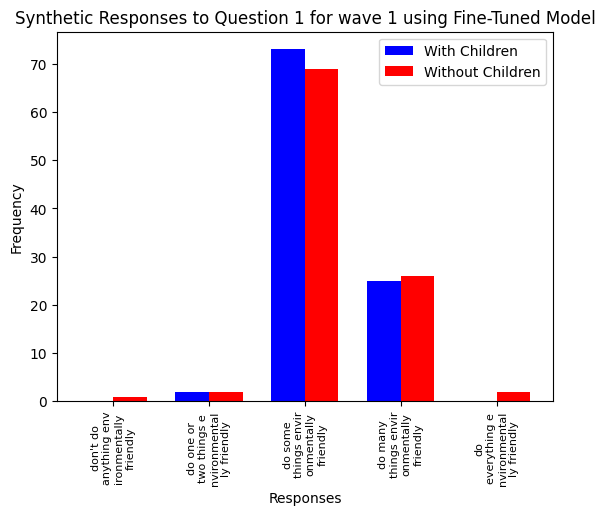

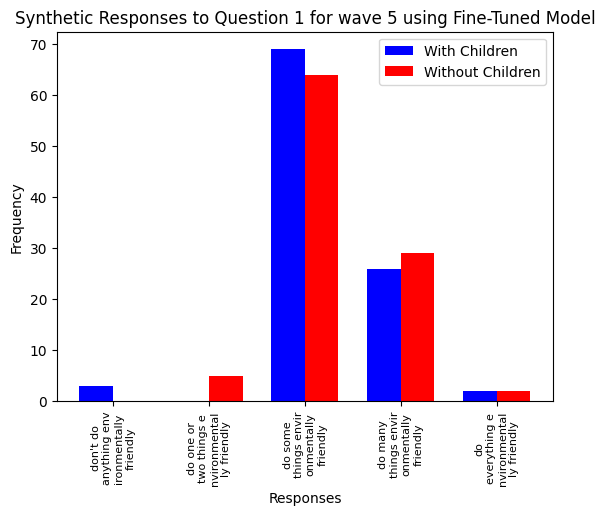

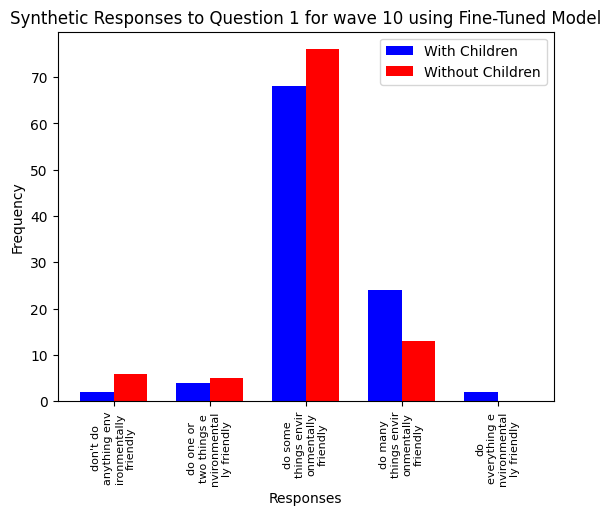

In [450]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(demo_question_with_children_response_frequency_dicts[i], demo_question_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(demo_question_with_children_response_frequency_dicts[i], demo_question_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

In [ ]:
demo_question_response_distributions = [first_wave_scenv_clf_probability_distribution, fourth_wave_scenv_clf_probability_distribution, tenth_wave_scenv_clf_probability_distribution]
question_wave_numbers = [1, 4, 10]

In [ ]:
# initialise a pandas dataframe to store the chi-squared values
demo_question_chi_squared_values = pd.DataFrame(columns=["UKHLS Wave Number", "Question Wave Number", "Chi-Squared Value"])

for i in range(len(wave_numbers)):

    for j in range(len(demo_question_response_distributions)):
        # calculate the chi-squared value between the synthetic and actual responses.
        chi_squared_value = calculate_chi_square_values(demo_question_with_children_response_frequency_dicts[i], demo_question_response_distributions[j]) # calculate the chi-squared value between the synthetic and actual responses

        # append the chi-squared values to the dataframe. 
        demo_question_chi_squared_values = pd.concat([demo_question_chi_squared_values, pd.DataFrame({"UKHLS Wave Number": [wave_numbers[i]], "Question Wave Number": [question_wave_number[j]], "Chi-Squared Value": [chi_squared_value]})], ignore_index=True) # append the chi-squared value to the dataframe

# display the chi-squared values in a beautiful format
demo_question_chi_squared_values
        

In [ ]:
# store demo_question_chi_squared_values into an excel file
demo_question_chi_squared_values.to_excel("Excel-Files/Chi-Squared-Values/demo_question_chi_squared_values.xlsx", index=False)

##### Question 1

In [ ]:
question_one = "Overall, how positive or negative do you think the effects of climate change will be?"
question_number = 2
question_one_responses = ["Entirely negative", "More negative than positive", "Neither positive nor negative", "More positive than negative", "Entirely positive"]
n_samples = 100
wave_number = 1
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time.

In [ ]:
question_one_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_one, question_number, question_one_responses, n_samples, wave_number, True) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_one_with_children_probability_distributions.append(responses)

In [ ]:
question_one_with_children_response_frequency_dicts = []

for i, responses in enumerate(question_one_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_one_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_one_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_one_with_children_response_frequency_dicts.append(response_frequency)

In [ ]:
question_one_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_one, question_number, question_one_responses, n_samples, wave_number, False) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_one_without_children_probability_distributions.append(responses)

In [ ]:
question_one_without_children_response_frequency_dicts = []

for i, responses in enumerate(question_one_without_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_one_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_one_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_one_without_children_response_frequency_dicts.append(response_frequency)

In [ ]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(question_one_with_children_response_frequency_dicts[i], question_one_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(question_one_with_children_response_frequency_dicts[i], question_one_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

##### Question 2

In [ ]:
question_two = "Please select the extent to which you agree or disagree with the following statement \"My behaviour and everyday lifestyle contribute to climate change.\""
question_number = 3
question_two_responses = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 100
wave_number = 1
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time.

In [ ]:
question_two_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_two, question_number, question_two_responses, n_samples, wave_number, True) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_two_with_children_probability_distributions.append(responses)

In [ ]:
question_two_with_children_response_frequency_dicts = []

for i, responses in enumerate(question_two_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_two_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_two_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_two_with_children_response_frequency_dicts.append(response_frequency)

In [ ]:
question_two_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_two, question_number, question_two_responses, n_samples, wave_number, False) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_two_without_children_probability_distributions.append(responses)

In [ ]:
question_two_without_children_response_frequency_dicts = []

for i, responses in enumerate(question_two_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_two_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_two_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_two_without_children_response_frequency_dicts.append(response_frequency)

In [ ]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(question_two_with_children_response_frequency_dicts[i], question_two_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(question_two_with_children_response_frequency_dicts[i], question_two_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

##### Question 3

In [ ]:
question_three = "To which extent strongly do you agree or disagree with the following statement: 'I would be prepared to pay more for environmentally-friendly products.'? Please select one of the following options: 'Strongly Agree', 'Tend to Agree', 'Neither Agree nor Disagree', 'Tend to Disagree', 'Strongly Disagree'."
question_number = 4
question_three_responses = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 100
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time.

In [ ]:
question_three_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_three, question_number, question_three_responses, n_samples, wave_number, True) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_three_with_children_probability_distributions.append(responses)

In [ ]:
question_three_with_children_response_frequency_dicts = []

for i, responses in enumerate(question_three_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_three_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_three_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_three_with_children_response_frequency_dicts.append(response_frequency)

In [ ]:
question_three_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_three, question_number, question_three_responses, n_samples, wave_number, False) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_three_without_children_probability_distributions.append(responses)

In [ ]:
question_three_without_children_response_frequency_dicts = []

for i, responses in enumerate(question_three_without_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_three_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_three_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_three_without_children_response_frequency_dicts.append(response_frequency)

In [ ]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(question_three_with_children_response_frequency_dicts[i], question_three_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(question_three_with_children_response_frequency_dicts[i], question_three_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

##### Question 4

In [351]:
question_four = "Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?"
question_number = 5
question_four_responses = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Already Changed"]
n_samples = 100
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time.

In [352]:
question_four_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_four, question_number, question_four_responses, n_samples, wave_number, True) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_four_with_children_probability_distributions.append(responses)

In [353]:
print(question_four_with_children_probability_distributions)

[[('Given your profile as a UKHLS survey respondent, answer this question or statement "Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?" using only one of the following options: \n1. Strongly Agree\n2. Agree\n3. Disagree\n4. Strongly Disagree\n5. Already Changed', '1. Strongly Agree'), ('Given your profile as a UKHLS survey respondent, answer this question or statement "Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?" using only one of the following options: \n1. Strongly Agree\n2. Agree\n3. Disagree\n4. Strongly Disagree\n5. Already Changed', '2. Agree'), ('Given your profile as a UKHLS survey respondent, answer this question or statement "Could you share your attitude toward environmental policies and whether you believe personal change is necessary to protect the future?" using only one of the following option

In [ ]:
question_four_with_children_response_frequency_dicts = []

for i, responses in enumerate(question_four_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_four_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_four_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_four_with_children_response_frequency_dicts.append(response_frequency)

In [355]:
question_four_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_four, question_number, question_four_responses, n_samples, wave_number, False) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_four_without_children_probability_distributions.append(responses)

In [ ]:
question_four_without_children_response_frequency_dicts = []

for i, responses in enumerate(question_four_without_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_four_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_four_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_four_without_children_response_frequency_dicts.append(response_frequency)

In [ ]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(question_four_with_children_response_frequency_dicts[i], question_four_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(question_four_with_children_response_frequency_dicts[i], question_four_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

##### Question 5

In [366]:
question_five = "If things continue on their current course, will there be an environmental disaster?"
question_number = 6
question_five_responses = ["Strongly Agree", "Tend to Agree", "Neither", "Tend to Disagree", "Strongly Disagree"]
n_samples = 100
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time.

In [ ]:
question_five_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_five, question_number, question_five_responses, n_samples, wave_number, True) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_five_with_children_probability_distributions.append(responses)

In [ ]:
question_five_with_children_response_frequency_dicts = []

for i, responses in enumerate(question_four_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_five_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_five_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_five_with_children_response_frequency_dicts.append(response_frequency)

In [ ]:
question_five_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_five, question_number, question_five_responses, n_samples, wave_number, False) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_five_without_children_probability_distributions.append(responses)

In [ ]:
question_five_without_children_response_frequency_dicts = []

for i, responses in enumerate(question_four_without_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_five_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_five_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_five_without_children_response_frequency_dicts.append(response_frequency)

In [ ]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(question_five_with_children_response_frequency_dicts[i], question_five_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(question_five_with_children_response_frequency_dicts[i], question_five_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

##### Question 6

In [369]:
question_six = "Does your household buy or considering buying electricity on a Green Tariff? By Green Tariff, we mean a payment scheme where your electricity supplier provides electricity from renewable sources such as wind power to the National Grid for the amount you use."
question_number = 7
question_six_responses = ["Yes - already buy", "Yes - seriously considering", "No", "Considered and rejected"]
n_samples = 100
wave_numbers = [1, 5, 10] # simulate from the wave numbers, 1, 5, and 10, to track how the responses change over time.

In [ ]:
question_six_with_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_six, question_number, question_six_responses, n_samples, wave_number, True) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_six_with_children_probability_distributions.append(responses)

In [ ]:
question_six_with_children_response_frequency_dicts = []

for i, responses in enumerate(question_four_with_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_six_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_six_with_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_six_with_children_response_frequency_dicts.append(response_frequency)

In [ ]:
question_six_without_children_probability_distributions = []

for wave_number in wave_numbers:
    responses = simulate_environmental_responses_h1(question_six, question_number, question_six_responses, n_samples, wave_number, False) # run a test to simulate synthetic responses to specific questions about environmental issues
    question_six_without_children_probability_distributions.append(responses)

In [ ]:
question_six_without_children_response_frequency_dicts = []

for i, responses in enumerate(question_four_without_children_probability_distributions):
    synthetic_profiles, synthetic_responses = process_synthetic_data(responses, question_six_responses, "You are a respondent to the UKHLS survey with the following profile", f"Synthetic-Responses-JSON/question_six_without_children_wave_{wave_numbers[i]}.json")

    response_frequency = count_responses_frequency(synthetic_responses)

    print(f"Wave {wave_numbers[i]} Response Frequency: {response_frequency}")

    question_six_without_children_response_frequency_dicts.append(response_frequency)

In [ ]:
fine_tuned = True # initialise a variable determining whether the LLM model has been fine-tuned with training data. 

if fine_tuned:
    for i in range(len(wave_numbers)):
        # visualise the synthetic and UKHLS distributions of the responses to the question for distributions with and without children
        # the LLM model is fine-tuned for hypothesis 1
        visualise_h1_responses(question_six_with_children_response_frequency_dicts[i], question_six_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], True) 
else:
    for i in range(len(wave_numbers)):
        visualise_h1_responses(question_six_with_children_response_frequency_dicts[i], question_six_without_children_response_frequency_dicts[i], question_number, wave_numbers[i], False) 

### Hypothesis 2

#### Load Age Group Data Distributions

In [ ]:
def load_age_group_data(data, variable_name):

    '''
    Description: A function to load the age group data from the UKHLS dataset.

    Parameters:
    • data (pandas.DataFrame): the UKHLS dataset.
    • variable_name (str): the name of the variable containing the age group data.

    Returns:
    • A pandas.Series containing the age group data.
    '''
    age_group_data = data[variable_name] # extract the age group data from the UKHLS dataset

    age_group_dict = {
        2: "10 - 19",
        3: "20 - 29",
        4: "30 - 39",
        5: "40 - 49",
        6: "50 - 59",
        7: "60 - 69",
        8: "70 years or older",
    } # initialise a dictionary to map the ages

    # use the mapping dictionary to convert the numeric codes to descriptive labels
    age_group_data = age_group_data.map(age_group_dict)

    return age_group_data

    

In [ ]:
first_wave_age_group_data = load_age_group_data(first_wave_ukhls_indresp, 'a_agegr10_dv')

print(first_wave_age_group_data)

In [ ]:
# group the age group data into 3 groups 18 - 34, 35 - 54, 55+
first_wave_age_group_data = first_wave_age_group_data.replace({'10 - 19': '18 - 34', '20 - 29': '18 - 34', '30 - 39': '35 - 54', '40 - 49': '35 - 54', '50 - 59': '55+', '60 - 69': '55+', '70 years or older': '55+'})

# print(first_wave_age_group_data)

# display the proportion of the age groups
first_wave_age_group_proportion = first_wave_age_group_data.value_counts(normalize=True)

print(first_wave_age_group_proportion)

#### Profile Conditioning

In [ ]:
def generate_profiling_subprompts_h2(age_group):
    """
    Description: A function to generate the subprompts for the synthetic individual's profile.

    Parameters:
    • age_group (str): The age group of the synthetic individual: 18 - 34, 35 - 54, or 55+

    Returns:
    •	A list of subprompts for the synthetic individual's profile.
    """
    
    if age_group == "18 - 34":
        # then tidy up the age group distribution to only include the age group 18 - 34
        age_group_prompt = "In terms of my age, my age group is 18 - 34."
    elif age_group == "35 - 54":
        # then tidy up the age group distribution to only include the age group 35 - 54
        age_group_prompt = "In terms of my age, my age group is 35 - 54."
    elif age_group == "55+":
        # then tidy up the age group distribution to only include the age group 55+
        age_group_prompt = "In terms of my age, my age group is 55+."
    
    # generate the profile of the synthetic individual's highest qualification
    highest_qualification_prompt = generate_highest_qualification_prompt(thirteenth_wave_education_levels_probability_dict) 

    # generate the profile of the synthetic ethnic groups. 
    ethnic_group_prompt = generate_ethnic_group_prompt(thirteenth_wave_ethnicity_probability_distribution_dict)

    # generate the profile of the synthetic individual's current job
    current_job_prompt = generate_current_job_prompt(current_job_probability_distribution_dict)

    # generate the profile of the synthetic individual's gross monthly income
    income_prompt = generate_income_prompt(current_job_prompt)

    # generate the profile of the synthetic gender group.
    gender_prompt = generate_gender_prompt(gender_probability_distribution_dict)

    # generate the profile of the synthetic marital status group.
    marital_status_prompt = generate_marital_status_prompt(martial_probability_distribution_dict)

    # generate the profile of the synthetic residence group.
    residence_prompt = generate_residence_prompt(residence_probability_distribution_dict)

    # generate the profile of the synthetic number of children group.
    number_of_children_prompt = generate_number_of_children_prompt(number_of_children_probability_distribution_dict)

    # generate the subprompt for the synthetic individual's voting intention
    voting_intention_prompt = generate_voting_intention_prompt(first_wave_voting_intention_probability_distribution_dict)

    return income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt

In [ ]:
generate_profiling_subprompts_h2("18 - 34") # run a test to generate the subprompts for the synthetic individual's profile

In [ ]:
def profile_conditioning_h2(question, potential_answers, age_group):
    """
    Generates synthetic individual's profile and prepares prompts for model interaction.

    Parameters:
    • question (str): the question to be asked.
    • potential_answers (list of str): potential responses to the question.
    • age_group (str): The age group of the synthetic individual: 18 - 34, 35 - 54, or 55+

    Returns:
    • tuple: system and user prompts for interaction with a model.
    """
    # Simulate generating subprompts (placeholders used for demonstration)

    income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt = generate_profiling_subprompts_h2(age_group)

    # initialise a list to store the system prompts
    system_prompts = []

    # initialise a profiling subprompt to store the demographic profile variables
    profiling_prompt = "You are a respondent to the UKHLS survey with the following profile \""

    # initialise the demographic profile variables as a list. 
    demographic_profiles = [income_prompt, age_group_prompt, highest_qualification_prompt, ethnic_group_prompt, current_job_prompt, gender_prompt, marital_status_prompt, residence_prompt, number_of_children_prompt, voting_intention_prompt]

    for profile in demographic_profiles:
        profiling_prompt += profile + " " # add the subprompt to the system prompt

    profiling_prompt += "\"" # close the profiling subprompt

    system_prompts.append(profiling_prompt) # add the profiling subprompt to the system prompts as the first instruction to set the role of the system.

    system_question_context_prompt = "Use your identities and socio-economic background to understand your preferences toward green policies by answering questions about attitudes to environmental policies. "

    system_prompts.append(system_question_context_prompt) # add the survey question prompt to the system prompts

    # initialise a list to store user prompts
    user_prompts = []

    responses_options_base, response_options = get_response_option_prompt(question, potential_answers)

    # add the response options to the system prompts
    user_prompts.append(response_options)

    # User prompt creation
    # user_prompt = f"Response format - your response should be in the format where you give one of the following options: {', '.join(potential_answers)}"

    return system_prompts, user_prompts

#### Prompt Simulation

In [ ]:
@backoff.on_exception(backoff.expo, openai.RateLimitError)
def send_prompt_to_model_h2(question, potential_answers, age_group):
    """
    Sends generated prompts to a language model and handles the model's response.

    Args:
        question (str): The question to be sent to the language model.
        potential_answers (list): A list of potential answers to the question.
        data_distribution (dict): A dictionary representing the probability distribution of the UKHLS environmental views context.
        wave_number (int): The wave number of the UKHLS study.
        age_group (str): The age group of the synthetic individual: 18 - 34, 35 - 54, or 55+.

    Returns:
        response (openai.ChatCompletion): The response from the language model.
        system_prompt (str): The system prompt used for the interaction containing detail about the synthetic individual's profile.

    Raises:
        openai.error.RateLimitError: If the API rate limit is exceeded.
        openai.error.OpenAIError: If there is an error with the OpenAI API.
    """
    system_prompts, user_prompts = profile_conditioning_h2(question, potential_answers, age_group)

    # define the max_tokens as the maximum length of answers from potential_answers
    max_tokens = max(len(answer) for answer in potential_answers)
    
    # Implement exception handling to process OpenAI API errors. 
    try:
        # Create a chat completion request to the OpenAI API
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": system_prompts[0]},
                {"role": "user", "content": user_prompts[0]},
                {"role": "system", "content": system_prompts[1]}
            ],
            temperature=0.7, # change the temperature back to 0.7 following argyle 2022 response
            max_tokens=max_tokens  # Adjust max_tokens as needed
        )

        time.sleep(1) # sleep for 1 second to avoid rate limit errors

        # returns the response from the language model and the system prompt containing the synthetic individual's profile
        return response.choices[0].message.content, user_prompts[0]

    except openai.RateLimitError as e:
        # Handle rate limit errors specifically
        print(f"Rate limit error: {e}")
        raise
    except openai.OpenAIError as e:
        # Handle other OpenAI API errors
        print(f"OpenAI API error: {e}")
        return None, None

In [ ]:
def simulate_synthetic_responses_h2(question, pot_responses, age_group, n_samples = 10):
    """
    Description: A function to simulate synthetic responses to the question "Is climate change beyond control" based on the user's profile.

    Parameters:
    •	‘question’ (string): the question to be answered by the LLM.
    •	‘pot_responses’ (list): a list of potential responses for the question.
    •	‘age_group’ (str): the age group of the synthetic individual: 18 - 34, 35 - 54, or 55+.
    •	‘n_samples’ (int): the number of synthetic responses to be generated.

    Returns:
    •	A list of synthetic responses to the question "Is climate change beyond control" based on the user's profile.
    """

    # initialise a variable to store the synthetic responses
    synthetic_responses = []

    for i in range(n_samples):
        
        response, user_prompt = send_prompt_to_model_h2(question, pot_responses, age_group)

        synthetic_responses.append((user_prompt, response)) # append the synthetic response to the list of synthetic responses

    return synthetic_responses
        

In [ ]:
def simulate_environmental_responses_h2(question, potential_answers, n_samples, age_group):
    '''
    Description: A function to simulate synthetic responses to specific questions about environmental issues.

    Parameters:
    • question (str): the question to be answered by the LLM.
    • potential_answers (list): a list of potential responses for the question.
    • n_samples (int): the number of synthetic responses to be generated.
    • age_group (str): the age group of the synthetic individual: 18 - 34, 35 - 54, or 55+.

    Returns:
    responses_tally (dict): a dictionary containing the synthetic responses.
    '''

    responses = simulate_synthetic_responses_h2(question, potential_answers, age_group, n_samples) # simulate synthetic responses

    responses = display_synthetic_profiles_and_responses(responses, question, potential_answers) # display the synthetic profiles and responses

    responses_tally = extract_synthetic_responses(responses, potential_answers) # extract the synthetic responses

    return responses_tally

#### Visualise Responses

In [ ]:
def visualise_h2_responses(d1, d2, d3):
    '''
    Visualise the responses of age groups, 18 - 34, 35 - 54, and 55+, to a question "Are you concerned about the impacts of climate change?".

    Parameters:
    • d1 (dict): The dictionary containing the synthetic responses of the age group 18 - 34.
    • d2 (dict): The dictionary containing the synthetic responses of the age group 35 - 54.
    • d3 (dict): The dictionary containing the synthetic responses of the age group 55+.
    '''
    # initialise the ordered response categories for question 0: demo question
    ordered_categories = ["Not at all concerned", "Slightly concerned", "Moderately concerned", "Very concerned", "Extremely concerned"]

    ordered_categories = [category.lower() for category in ordered_categories]

    # convert the dictionary keys to lower case
    d1 = {key.lower(): value for key, value in d1.items()}

    d2 = {key.lower(): value for key, value in d2.items()}

    d3 = {key.lower(): value for key, value in d3.items()}

    # sort d1 and d2 in the order of the ordered categories
    d1 = {key: d1.get(key, 0) for key in ordered_categories}

    d2 = {key: d2.get(key, 0) for key in ordered_categories}

    d3 = {key: d3.get(key, 0) for key in ordered_categories}

    # plot d1, d2, and d3 in the same plot with different colours
    x = range(len(ordered_categories))  # label locations

    width = 0.25  # width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(x, d1.values(), width, label='18 - 34', color='blue')

    rects2 = ax.bar([p + width for p in x], d2.values(), width, label='35 - 54', color='red')

    rects3 = ax.bar([p + width * 2 for p in x], d3.values(), width, label='55+', color='green')

    ax.set_ylabel('Frequency') # set the y-axis label

    ax.set_xlabel('Responses') # set the x-axis label

    ax.set_xticks([p + width for p in x]) # set the x-axis ticks

    ordered_categories = ['\n'.join(wrap(l, 12)) for l in ordered_categories]

    ax.set_xticklabels(ordered_categories, rotation=90, fontsize=8) # set the x-axis labels

    ax.set_title('Responses to a question asking whether users are concerned about climate change grouped by age') # set the title of the plot

    ax.legend() # display the legend

    # save the figure as a png file
    plt.savefig("Figures/UKHLS-Hypothesis-2/Question 0 by Age Group.png", bbox_inches='tight')

In [ ]:
question = "Are you concerned about the impacts of climate change?"
question_number = 0
potential_answers = ["Not at all concerned", "Slightly concerned", "Moderately concerned", "Very concerned", "Extremely concerned"]
n_samples = 100

In [ ]:
youth_responses = simulate_environmental_responses_h2(question, potential_answers, n_samples, "18 - 34") # run a test to simulate synthetic responses to specific questions about environmental issues

In [ ]:
print("Youth Responses")
print(youth_responses)

In [ ]:
middle_age_responses = simulate_environmental_responses_h2(question, potential_answers, n_samples, "35 - 54") # run a test to simulate synthetic responses to specific questions about environmental issues

In [ ]:
print("Middle Age Responses")
print(middle_age_responses)

In [ ]:
senior_responses = simulate_environmental_responses_h2(question, potential_answers, n_samples, "55+") # run a test to simulate synthetic responses to specific questions about environmental issues

In [ ]:
print("Senior Responses")
print(senior_responses)

In [ ]:
visualise_h2_responses(youth_responses, middle_age_responses, senior_responses) # run a test to visualise the synthetic and UKHLS distributions of the responses to a question for distributions with and without children